In [1]:
import numpy as np
import pandas as pd
import joblib
import glob
import pickle
import yaml
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool
import os
from functools import partial
import gc

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
def _load_feature(feature, base_dir, logger=None):
    load_filename = base_dir + feature + '.pkl.gz'
    feature = pd.read_pickle(load_filename, compression='gzip')
    # drop index because its very heavy to concat, and already sorted.
    feature.reset_index(drop=True, inplace=True)
    return feature


def load_features(features, base_dir, nthread, logger=None):
    loaded_features = []
    with Pool(nthread) as p:
        iter_func = partial(_load_feature, base_dir=base_dir, logger=logger)
        loaded_features = p.map(iter_func, features)
        p.close()
        p.join()
        gc.collect()
    features_df = pd.concat(loaded_features, axis=1)[features]
    return features_df

## できた features を train vs test で可視化してみる

In [4]:
def plot_train_and_test_hist(trn_feat, tst_feat, col, ax, title, vs_label):
#    plt.figure(figsize=(8, 4))
    trn_feat = trn_feat.replace(np.inf, np.nan).dropna()
    tst_feat = tst_feat.replace(np.inf, np.nan).dropna()
    x_min = min(trn_feat.min(), tst_feat.min())
    x_max = min(trn_feat.max(), tst_feat.max())
    sns.distplot(trn_feat, color='blue', label='train', kde=False, bins=100, norm_hist=True, ax=ax[0])
    sns.distplot(tst_feat, color='orange', label=vs_label, kde=False, bins=100, norm_hist=True, ax=ax[1])
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title('train')
    ax[1].set_title(vs_label)
    ax[0].set_xlabel(f'{col}')
    ax[1].set_xlabel(f'{col}')
    ax[0].set_xlim((x_min, x_max))
    ax[1].set_xlim((x_min, x_max))
#    plt.show()

In [5]:
features = [path.split('/')[-1].split('.')[0] for path in glob.glob('../inputs/features/e020*')]
features.append('MachineIdentifier')
features

['e020_hourly_Census_IsSecureBootEnabled_local_mean_var',
 'e020_daily_Census_HasOpticalDiskDrive_local_mean_mean',
 'e020_hourly_Census_IsWIMBootEnabled_local_mean_var_future',
 'e020_hourly_IsBeta_local_mean_mean',
 'e020_daily_Wdft_IsGamer_local_mean_mean',
 'e020_hourly_HasDetections_local_mean_mean_future',
 'e020_Census_IsFlightsDisabled_local_mean',
 'e020_hourly_Census_IsTouchEnabled_local_mean_mean',
 'e020_daily_Census_IsFlightingInternal_local_mean_var',
 'e020_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean',
 'e020_hourly_Census_IsPenCapable_local_mean_var',
 'e020_daily_Census_IsFlightsDisabled_local_mean_var',
 'e020_hourly_Firewall_local_mean_var_future',
 'e020_hourly_Census_IsSecureBootEnabled_local_mean_mean',
 'e020_hourly_IsSxsPassiveMode_local_mean_var_future',
 'e020_hourly_Census_IsSecureBootEnabled_local_mean_mean_future',
 'e020_daily_Census_IsVirtualDevice_local_mean_mean',
 'e020_daily_Census_IsTouchEnabled_local_mean_var_future',
 'e020_hourly_Census_IsF

In [6]:
df = load_features(features, '../inputs/features/', os.cpu_count())
df.head()

e020_hourly_Census_IsSecureBootEnabled_local_mean_var  \
0                                           0.000570       
1                                           0.002914       
2                                           0.000486       
3                                           0.000597       
4                                           0.000550       

   e020_daily_Census_HasOpticalDiskDrive_local_mean_mean  \
0                                           0.085793       
1                                           0.101634       
2                                           0.086478       
3                                           0.086186       
4                                           0.086292       

   e020_hourly_Census_IsWIMBootEnabled_local_mean_var_future  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   e020_hourly_IsBeta_local_mean_mean  \
0                            0.000004   
1                            0.000000   
2                            0.000002   
3                            0.000004   
4                            0.000005   

   e020_daily_Wdft_IsGamer_local_mean_mean  \
0                                 0.169899   
1                                 0.179044   
2                                 0.157240   
3                                 0.161742   
4                                 0.158239   

   e020_hourly_HasDetections_local_mean_mean_future  \
0                                          0.555475   
1                                          0.406248   
2                                          0.601034   
3                                          0.609921   
4                                          0.612373   

   e020_Census_IsFlightsDisabled_local_mean  \
0                                  0.000000   
1                                  0.000004   
2                                  0.000000   
3                                  0.000048   
4                                  0.000000   

   e020_hourly_Census_IsTouchEnabled_local_mean_mean  \
0                                           0.128900   
1                                           0.122933   
2                                           0.126962   
3                                           0.124524   
4                                           0.126639   

   e020_daily_Census_IsFlightingInternal_local_mean_var  \
0                                       1.710672e-07      
1                                       4.453723e-08      
2                                       1.706411e-07      
3                                       1.706481e-07      
4                                       1.706481e-07      

   e020_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean  \
0                                           0.052705         
1                                           0.022435         
2                                           0.052140         
3                                           0.044206         
4                                           0.056152         

   e020_hourly_Census_IsPenCapable_local_mean_var  \
0                                        0.000014   
1                                        0.000194   
2                                        0.000009   
3                                        0.000014   
4                                        0.000009   

   e020_daily_Census_IsFlightsDisabled_local_mean_var  \
0                                       1.995169e-09    
1                                       1.322968e-14    
2                                       1.441659e-09    
3                                       1.455235e-09    
4                                       1.441659e-09    

   e020_hourly_Firewall_local_m

In [7]:
trn_ids = pd.read_pickle('../inputs/nes_info/trn_MachineIdentifier.pkl.gz')
tst_ids = pd.read_pickle('../inputs/nes_info/tst_MachineIdentifier.pkl.gz')
trn_df = df.set_index('MachineIdentifier').loc[trn_ids]
tst_df = df.set_index('MachineIdentifier').loc[tst_ids]

In [8]:
val_flgs = pd.read_pickle('../inputs/nes_info/val_flg.pkl')
val_trn_df = trn_df[(val_flgs == 0).values]
val_val_df = trn_df[(val_flgs != 0).values]

========== e020_hourly_Census_IsSecureBootEnabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


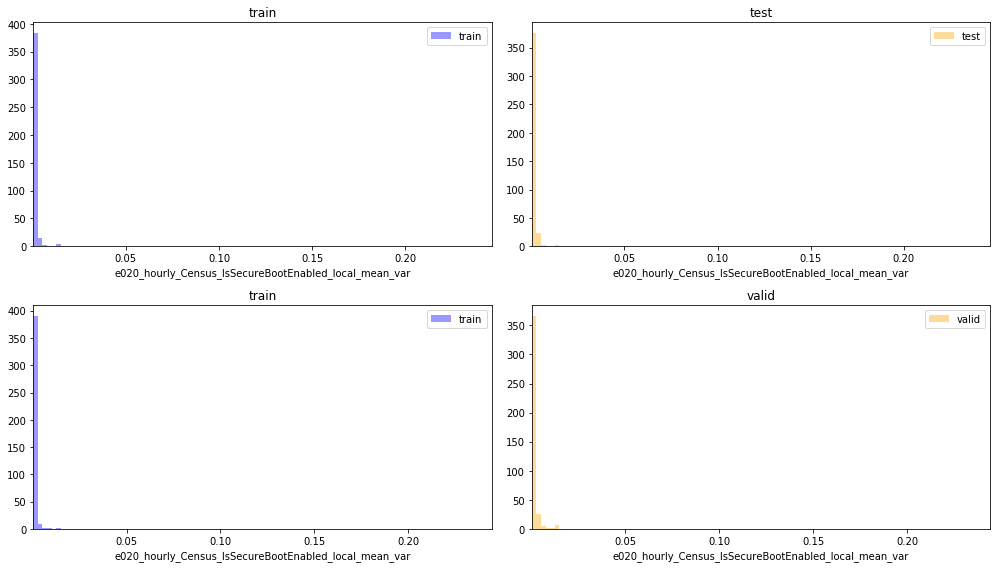

========== e020_daily_Census_HasOpticalDiskDrive_local_mean_mean ===========
(8918336, 180), (1250116, 180)


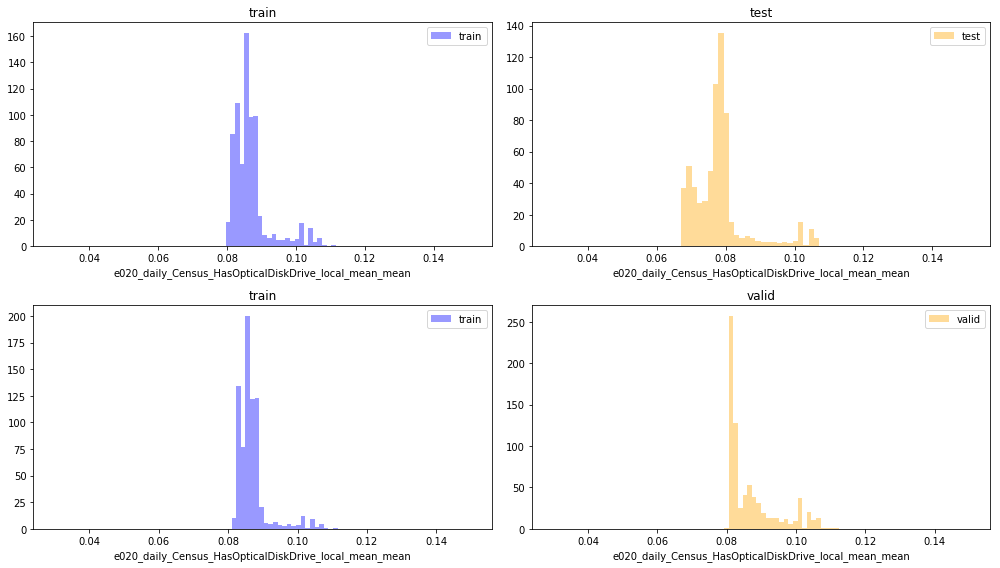

========== e020_hourly_Census_IsWIMBootEnabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


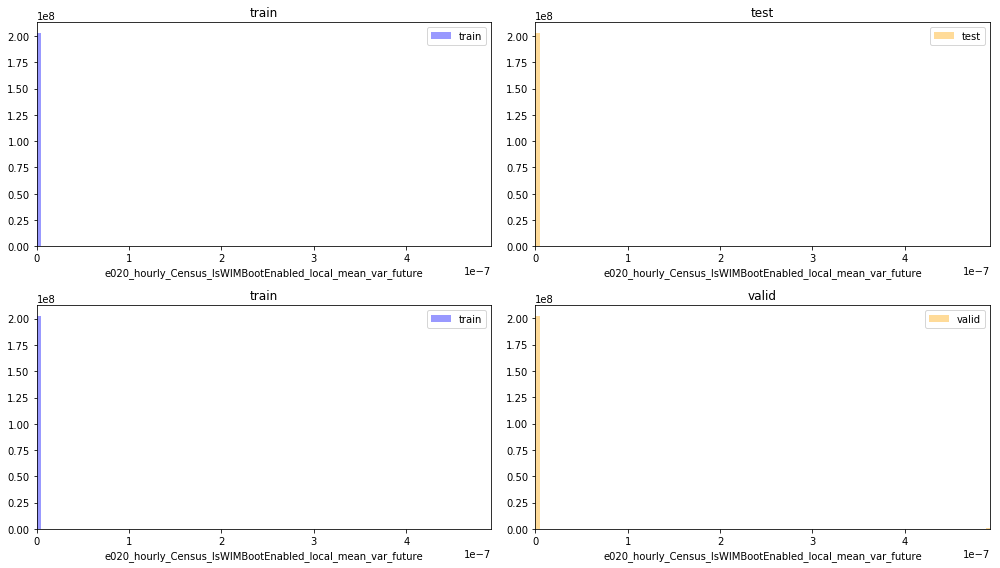

========== e020_hourly_IsBeta_local_mean_mean ===========
(8918336, 180), (1250116, 180)


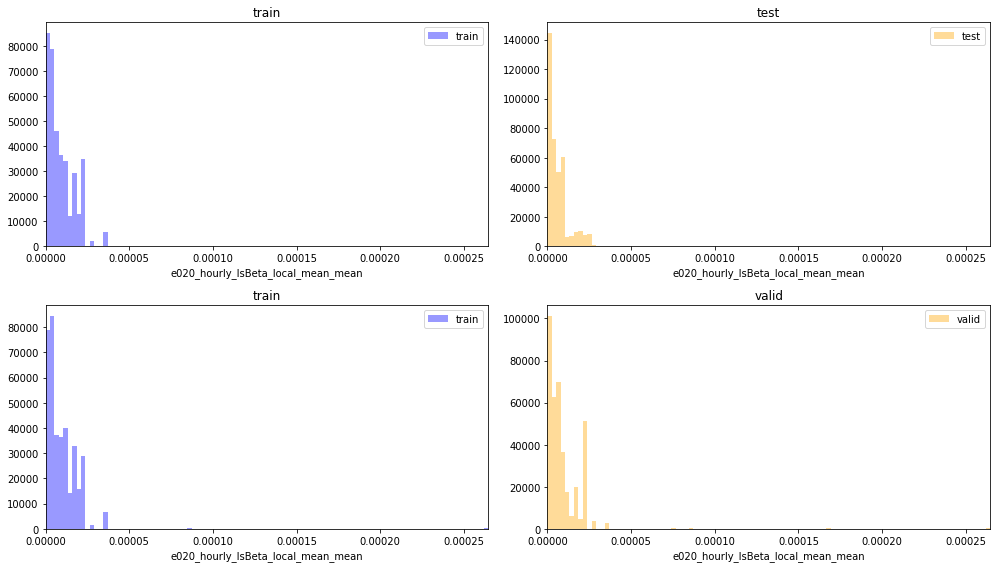

========== e020_daily_Wdft_IsGamer_local_mean_mean ===========
(8918336, 180), (1250116, 180)


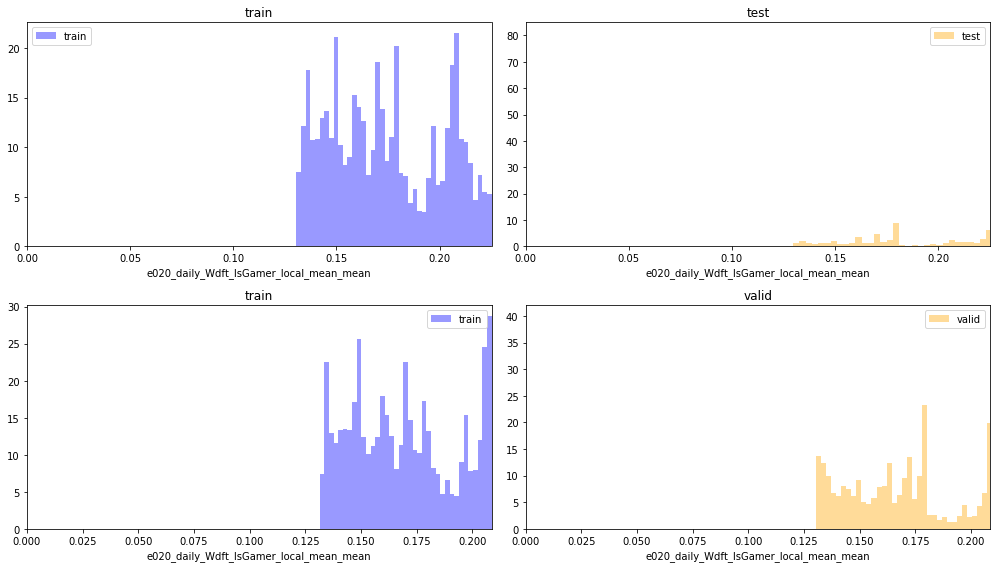

========== e020_hourly_HasDetections_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


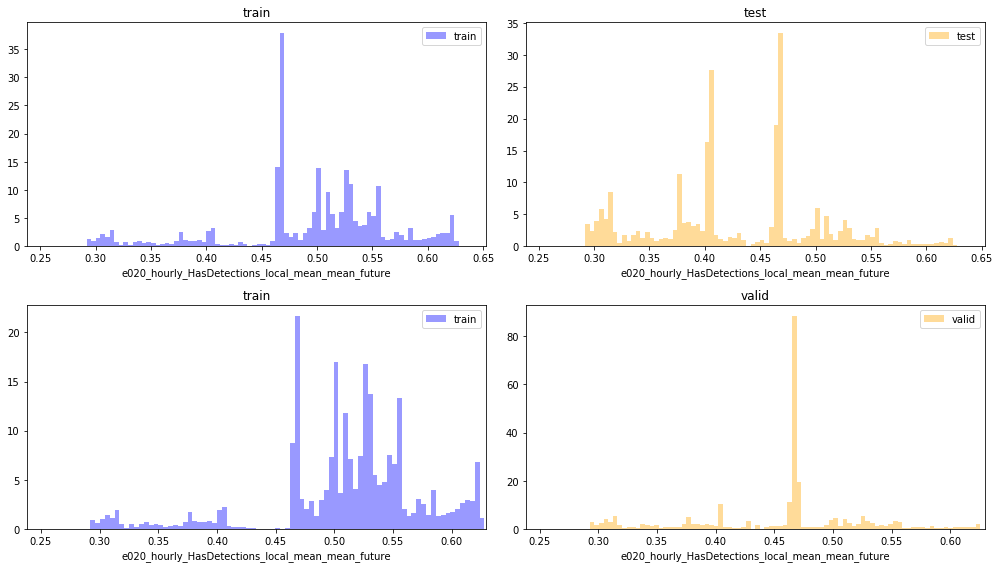

========== e020_Census_IsFlightsDisabled_local_mean ===========
(8918336, 180), (1250116, 180)


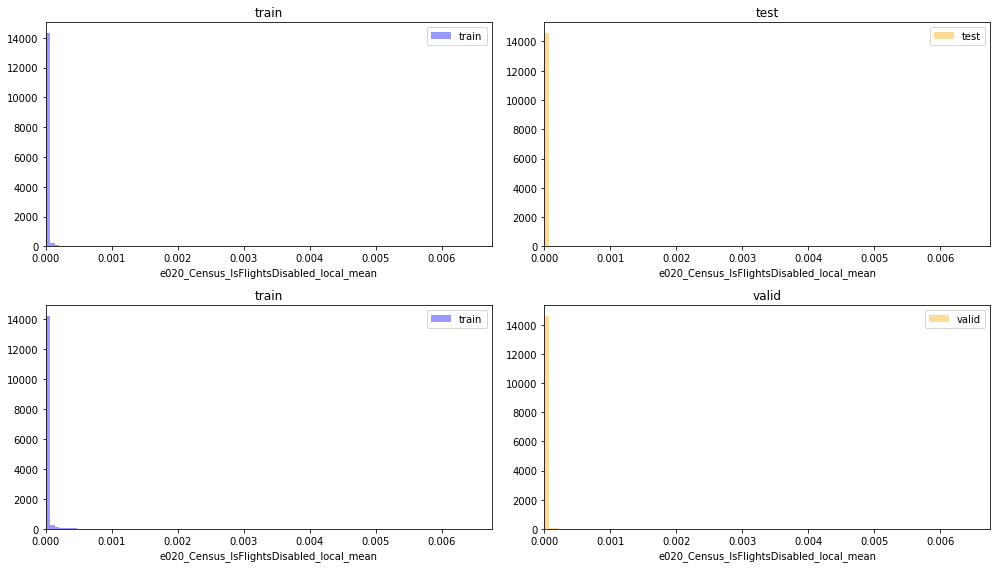

========== e020_hourly_Census_IsTouchEnabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


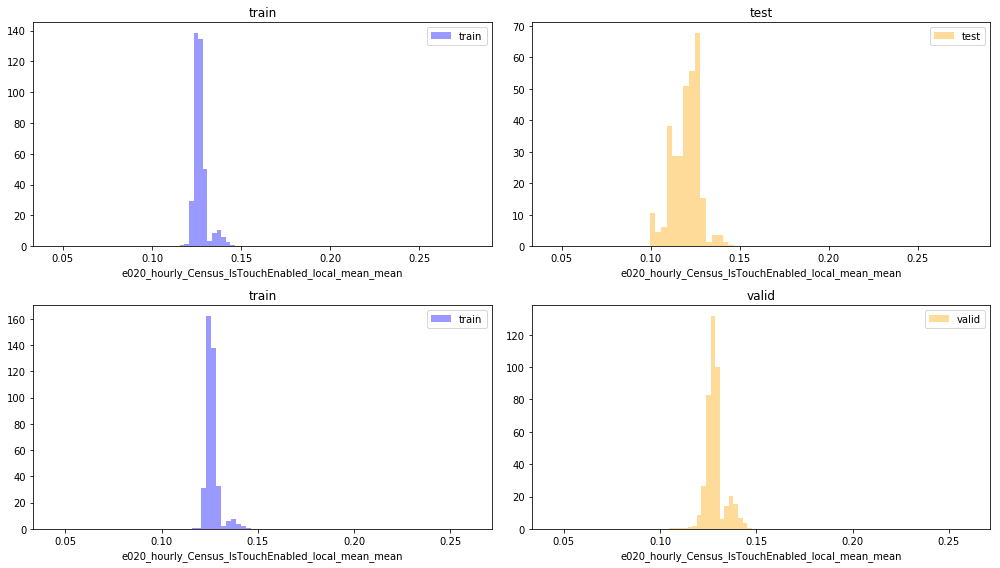

========== e020_daily_Census_IsFlightingInternal_local_mean_var ===========
(8918336, 180), (1250116, 180)


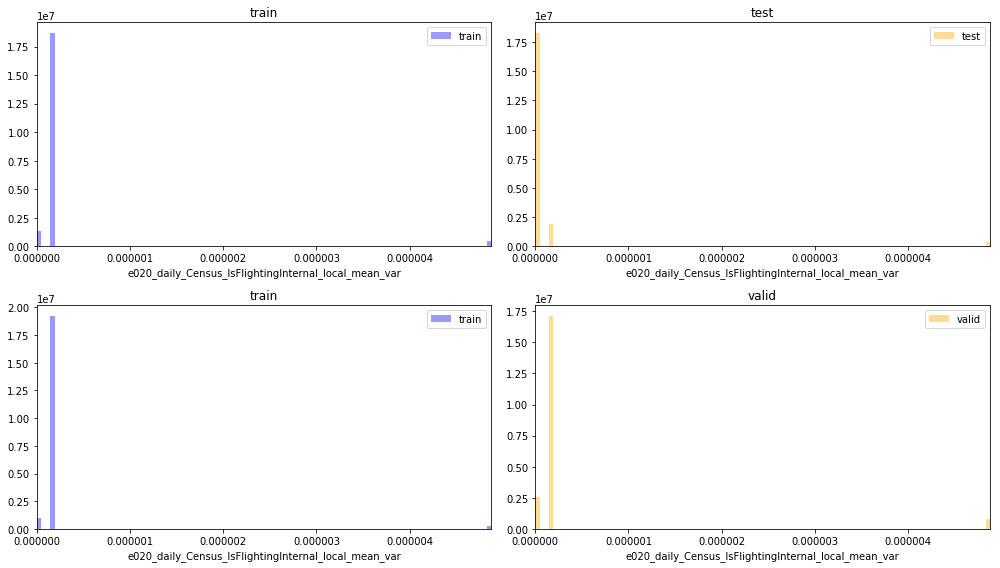

========== e020_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean ===========
(8918336, 180), (1250116, 180)


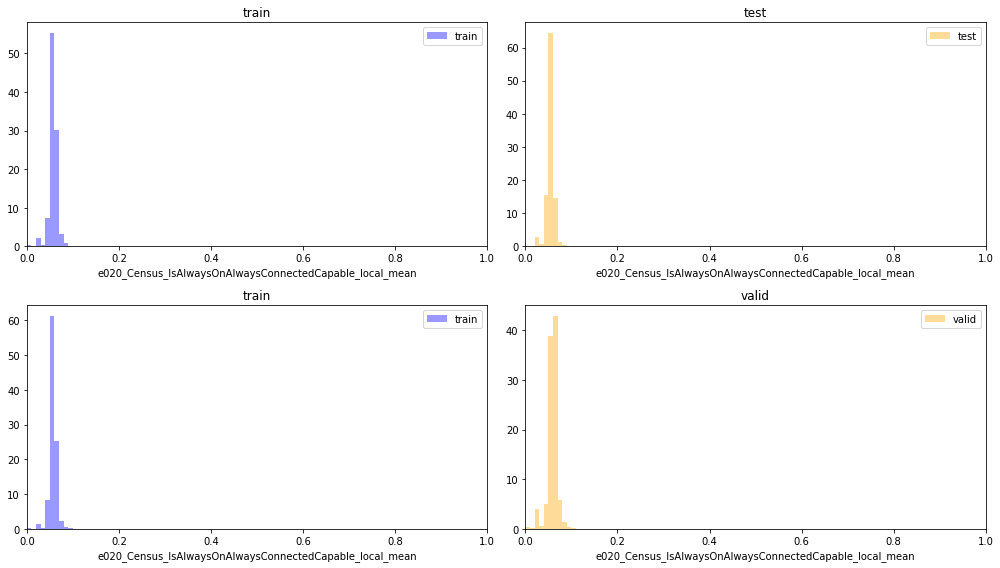

========== e020_hourly_Census_IsPenCapable_local_mean_var ===========
(8918336, 180), (1250116, 180)


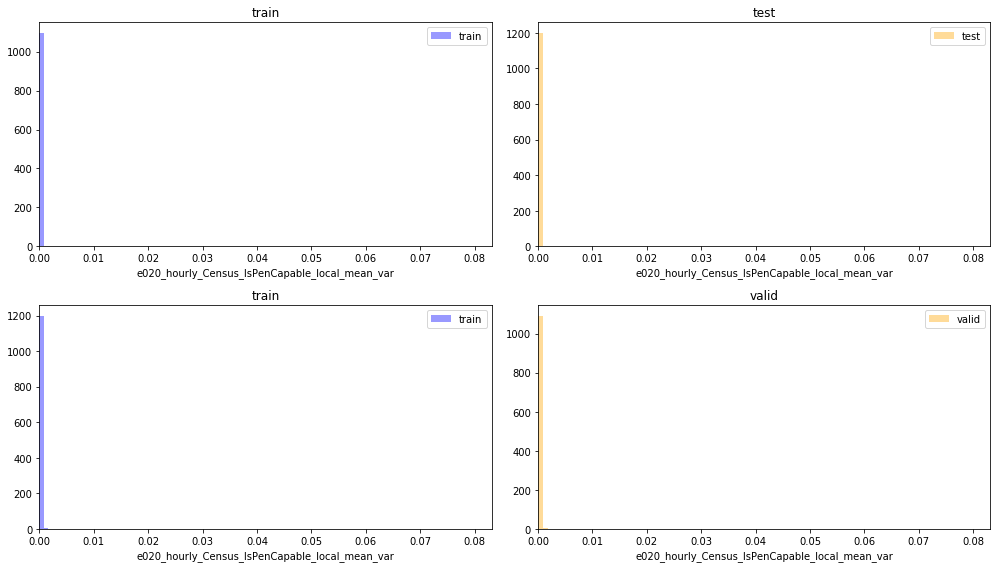

========== e020_daily_Census_IsFlightsDisabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


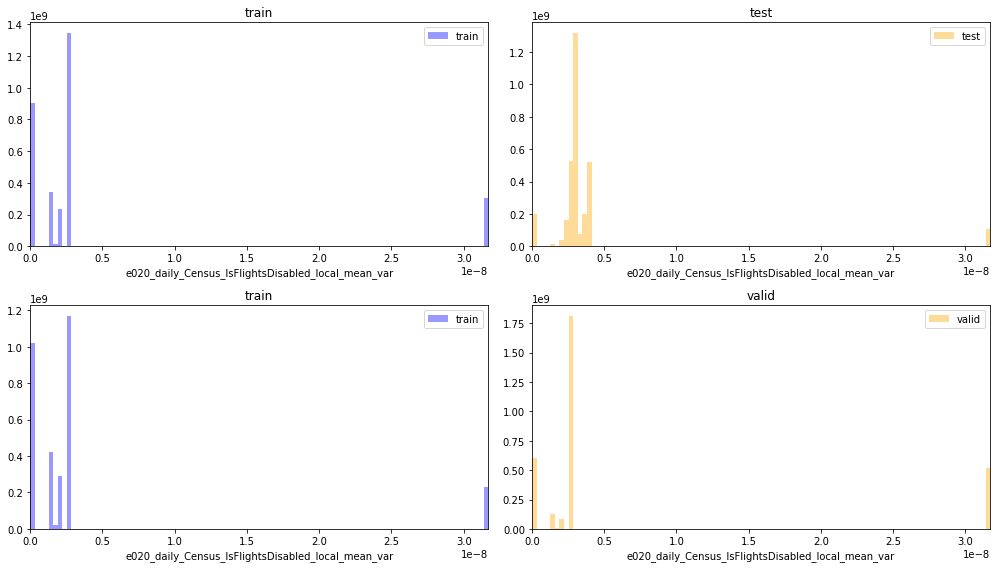

========== e020_hourly_Firewall_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


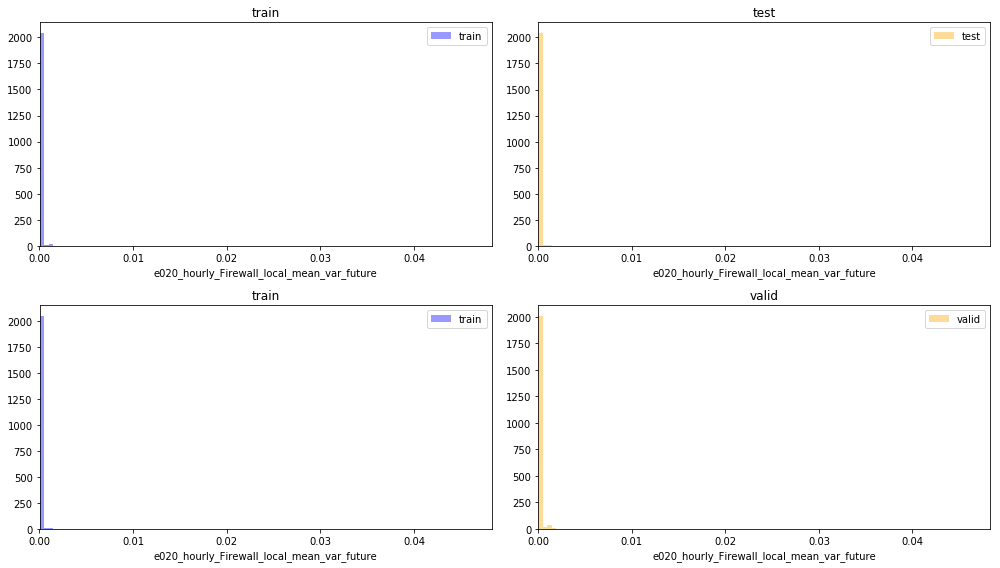

========== e020_hourly_Census_IsSecureBootEnabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


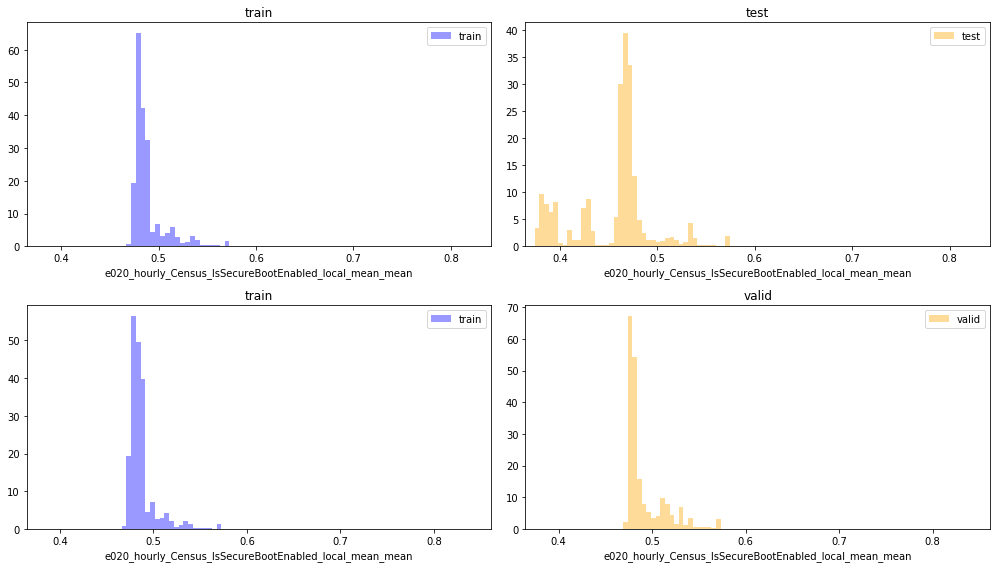

========== e020_hourly_IsSxsPassiveMode_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


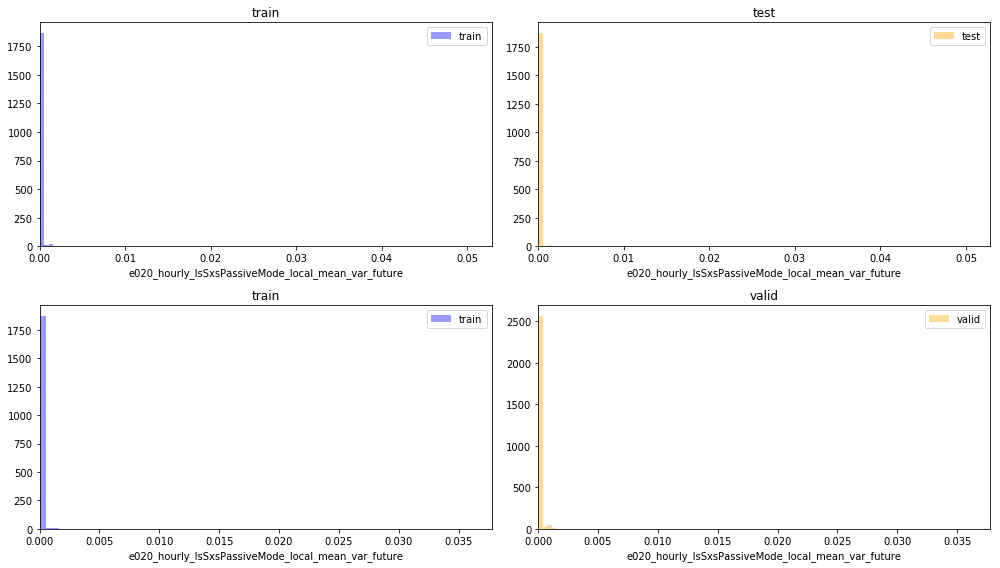

========== e020_hourly_Census_IsSecureBootEnabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


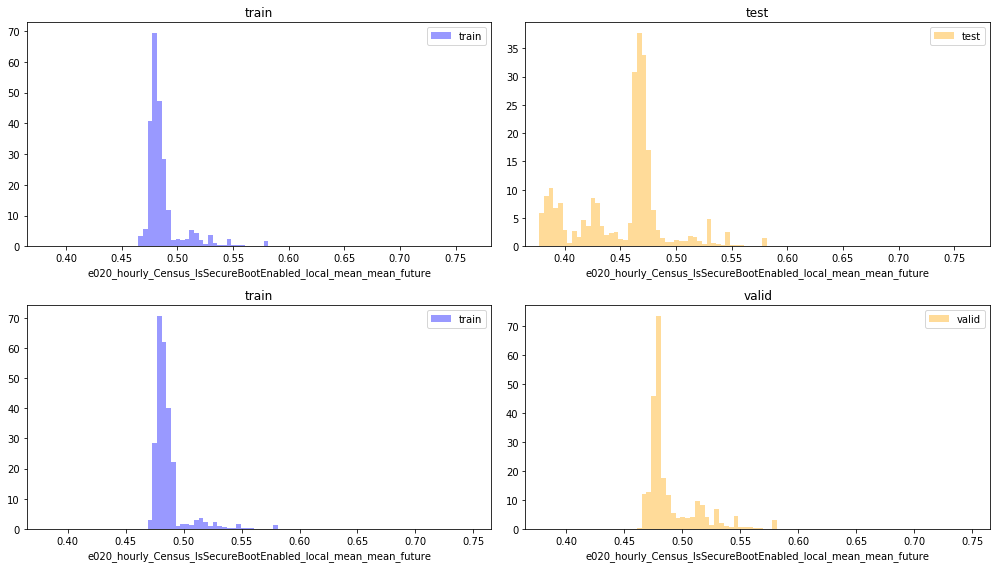

========== e020_daily_Census_IsVirtualDevice_local_mean_mean ===========
(8918336, 180), (1250116, 180)


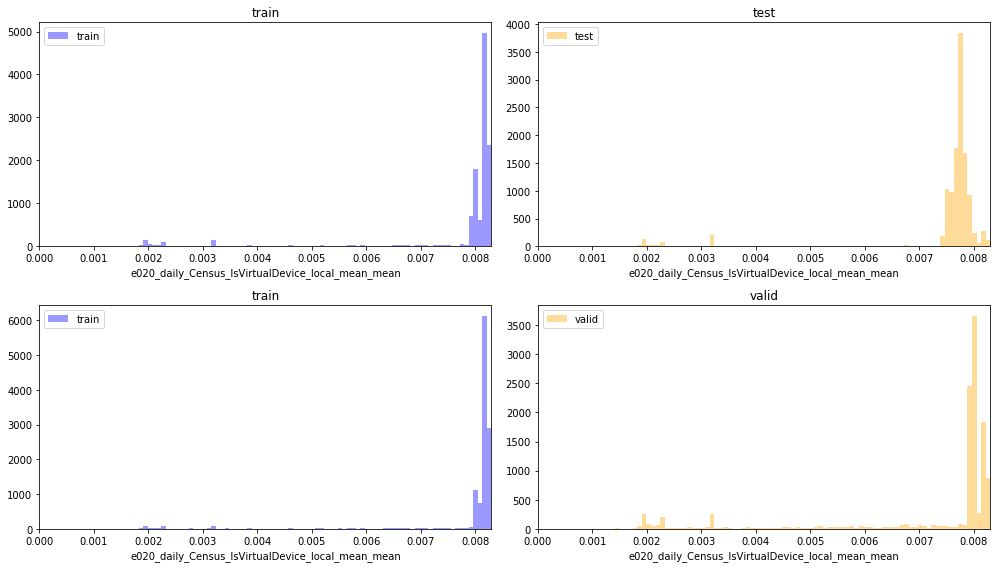

========== e020_daily_Census_IsTouchEnabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


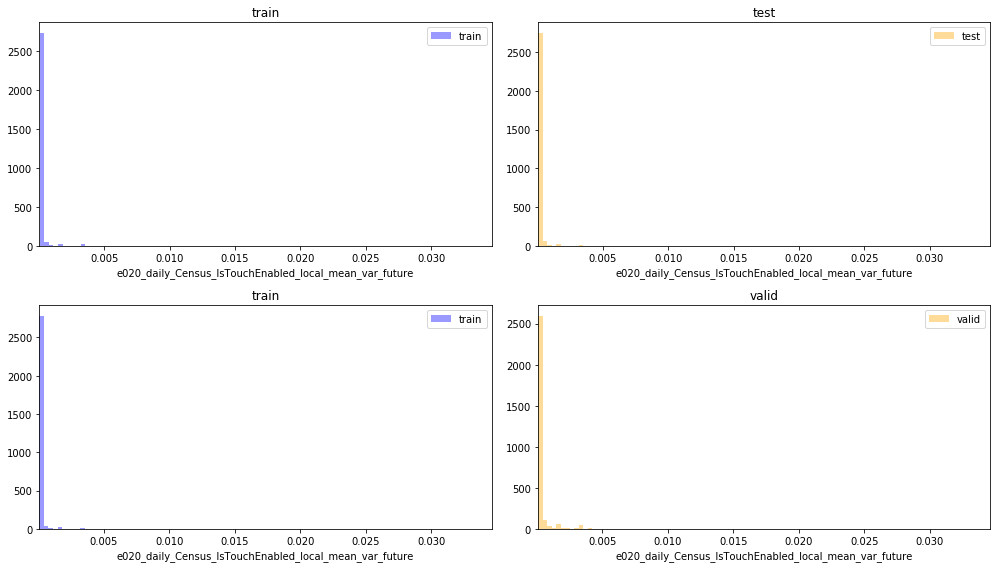

========== e020_hourly_Census_IsFlightsDisabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


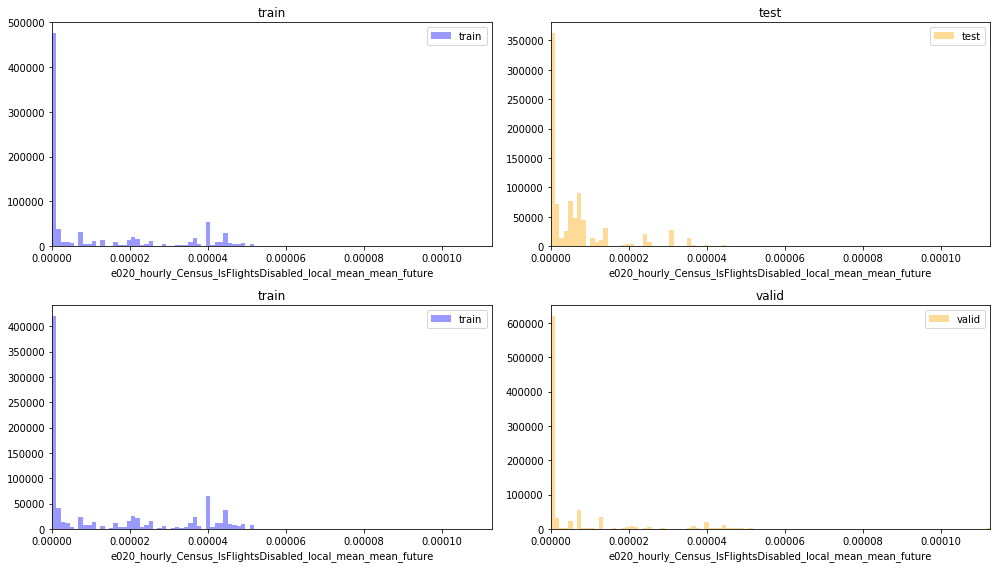

========== e020_Census_IsWIMBootEnabled_local_mean ===========
(8918336, 180), (1250116, 180)


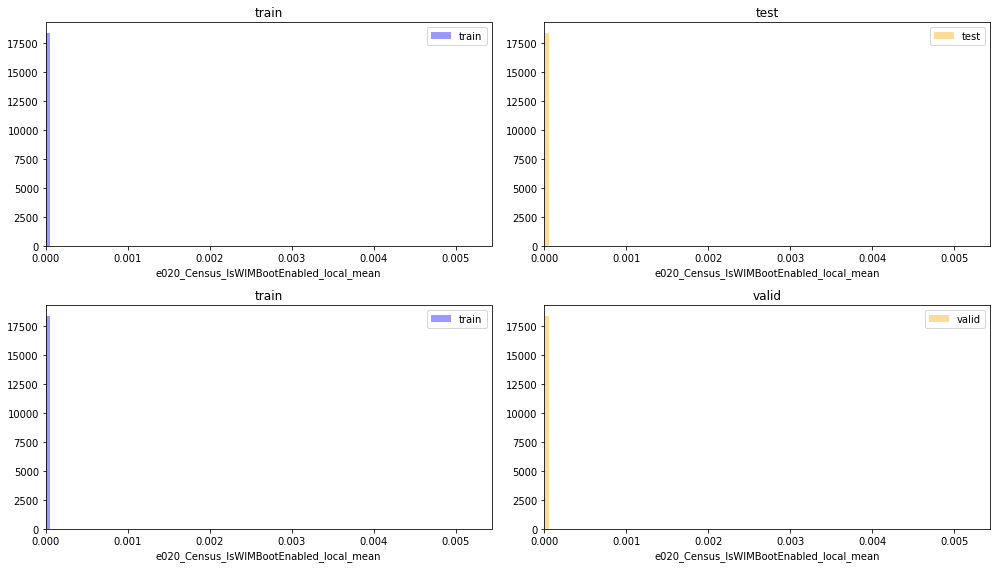

========== e020_hourly_Census_IsFlightingInternal_local_mean_var ===========
(8918336, 180), (1250116, 180)


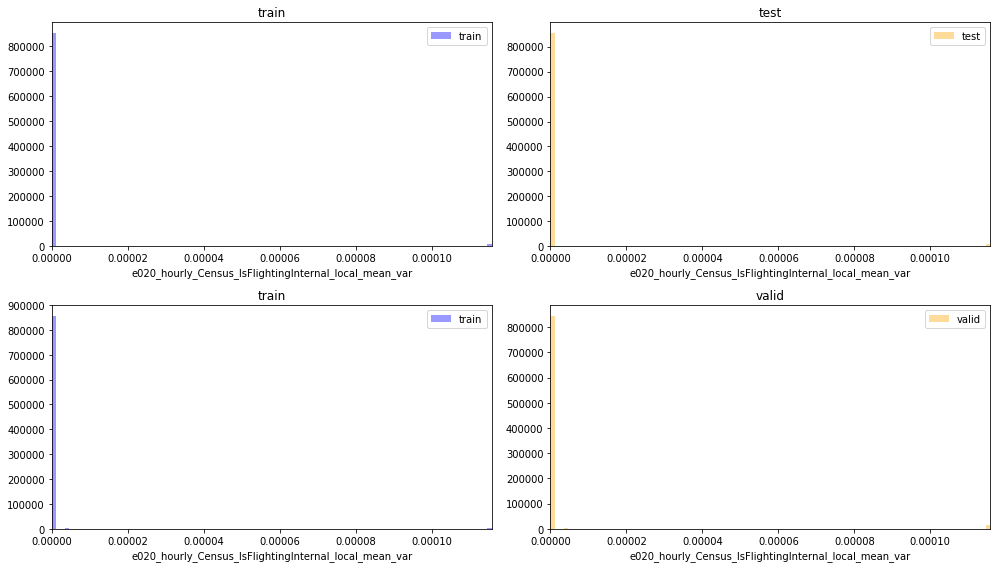

========== e020_hourly_Census_HasOpticalDiskDrive_local_mean_mean ===========
(8918336, 180), (1250116, 180)


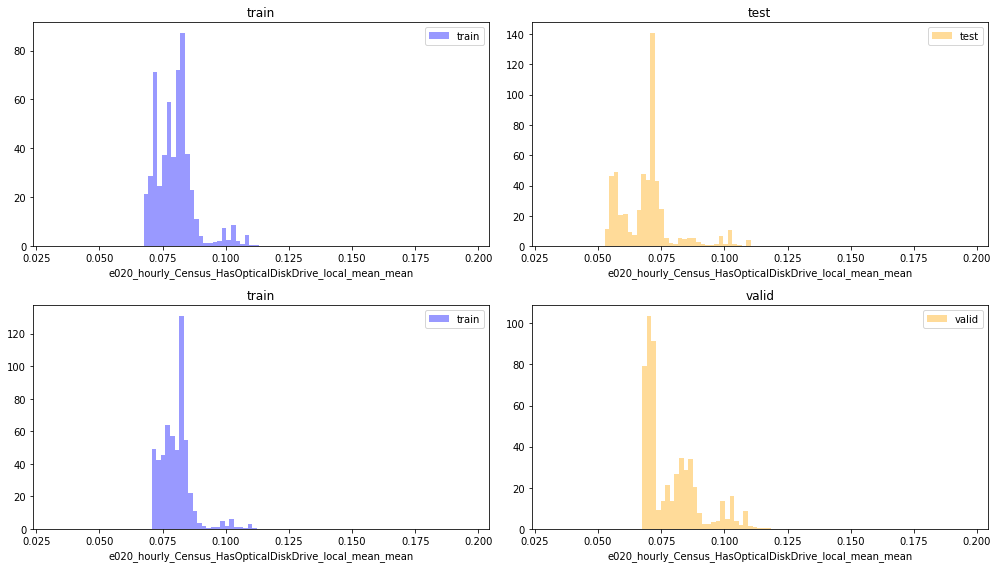

========== e020_hourly_IsBeta_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


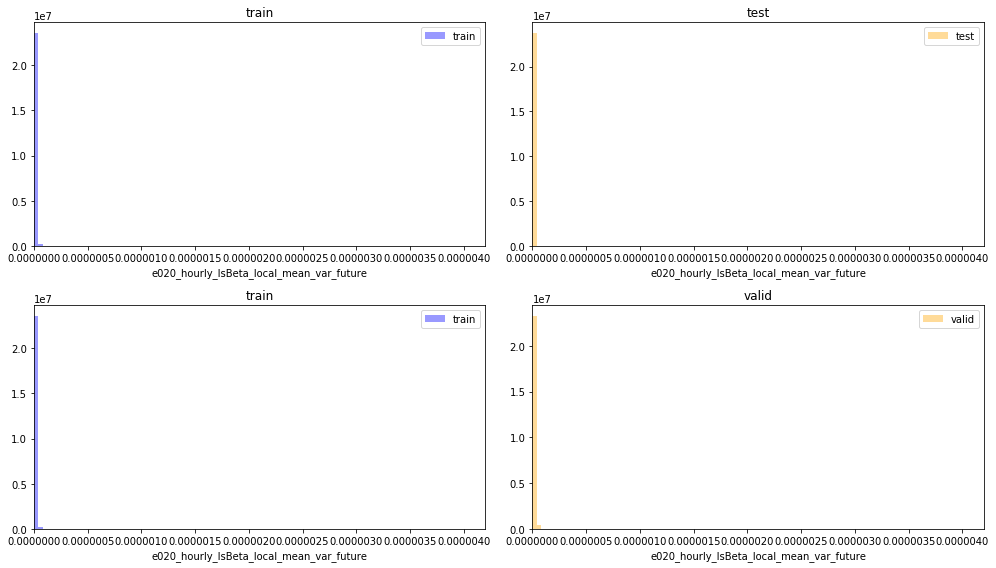

========== e020_HasDetections_local_mean ===========
(8918336, 180), (1250116, 180)


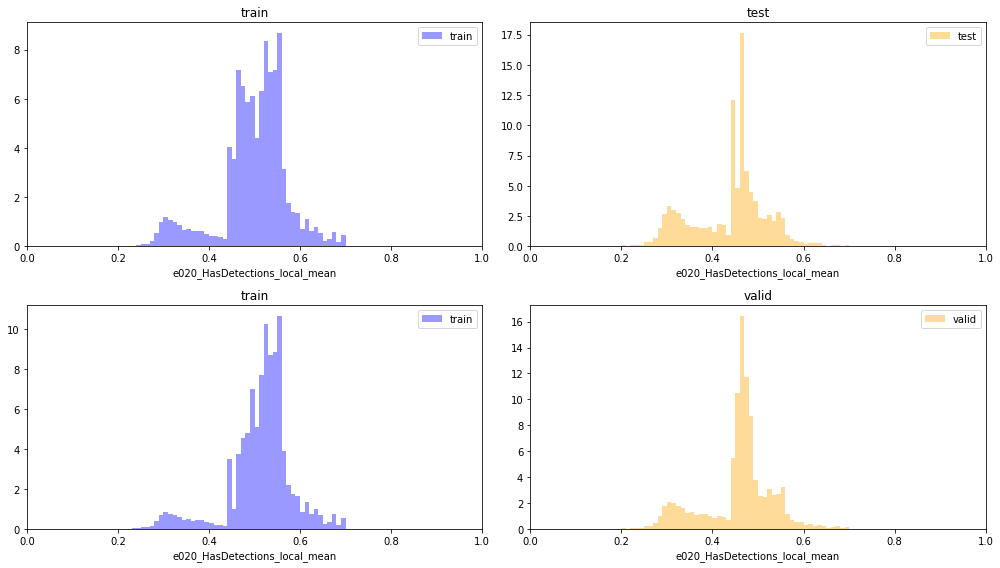

========== e020_Census_IsSecureBootEnabled_local_mean ===========
(8918336, 180), (1250116, 180)


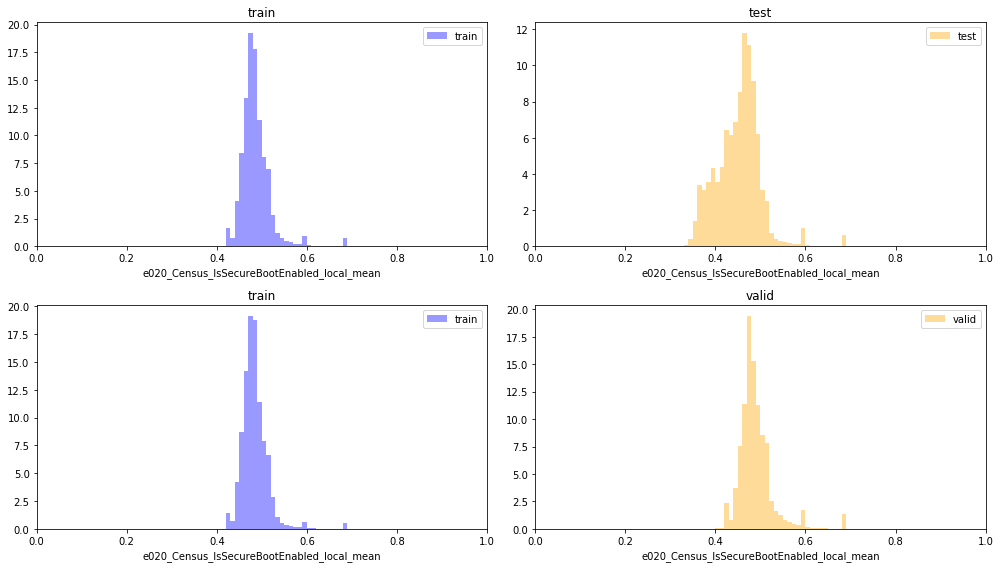

========== e020_IsProtected_local_mean ===========
(8918336, 180), (1250116, 180)


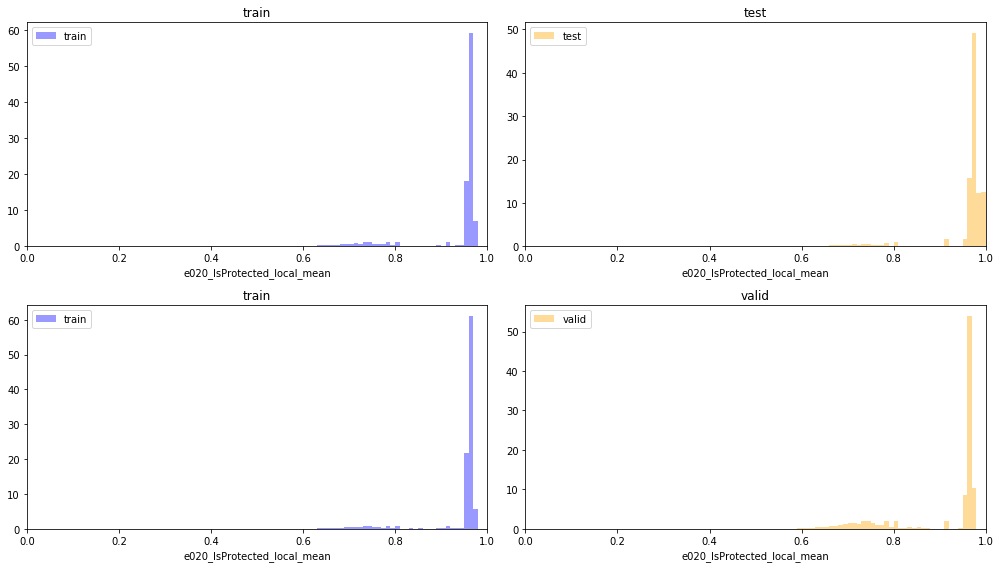

========== e020_daily_IsProtected_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


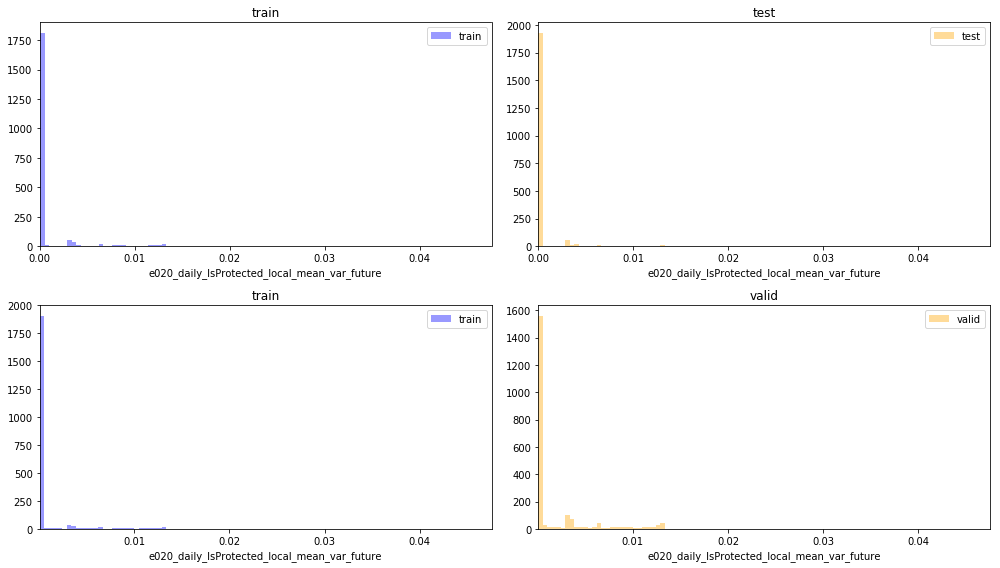

========== e020_hourly_IsSxsPassiveMode_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


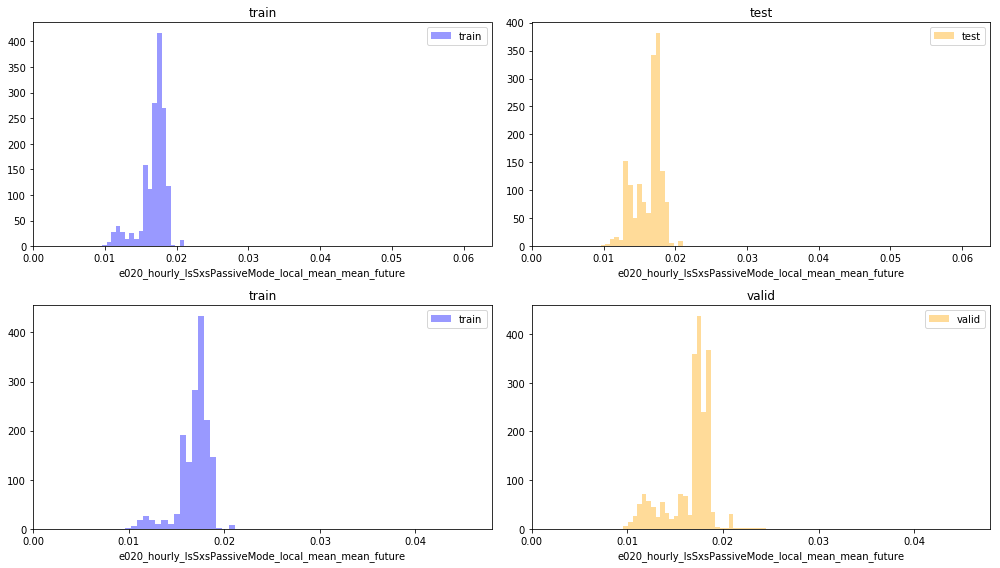

========== e020_hourly_IsProtected_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


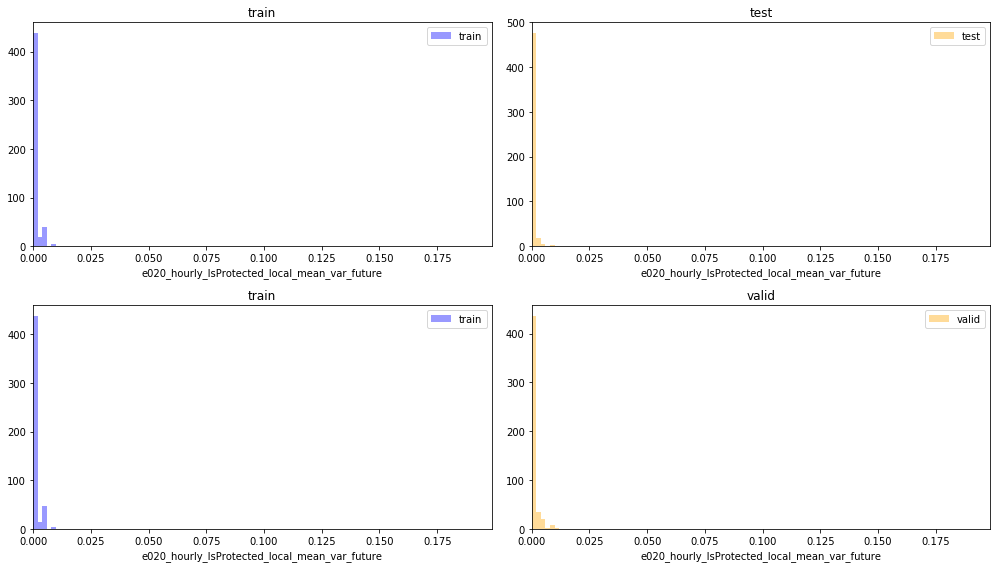

========== e020_daily_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_var ===========
(8918336, 180), (1250116, 180)


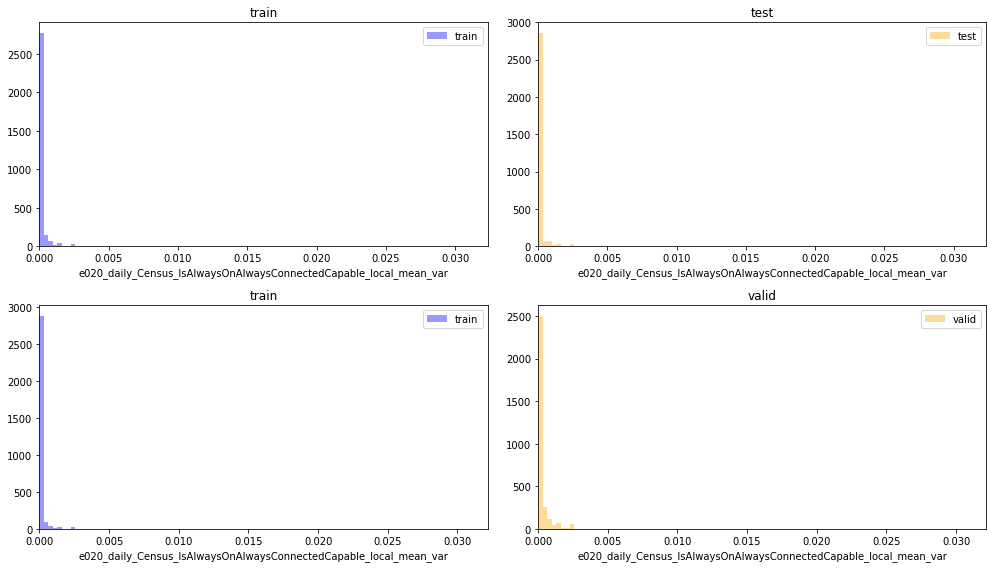

========== e020_daily_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


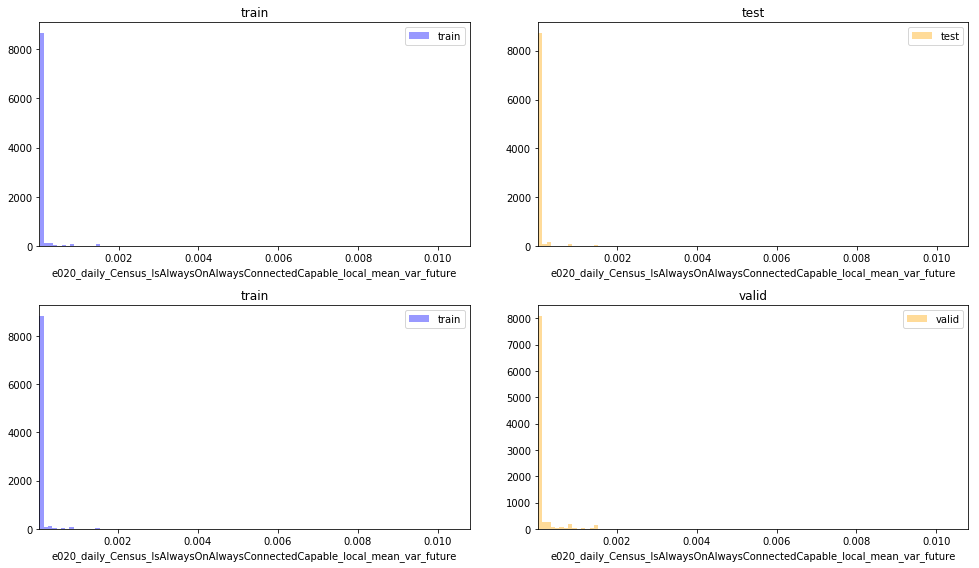

========== e020_hourly_Census_IsFlightingInternal_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


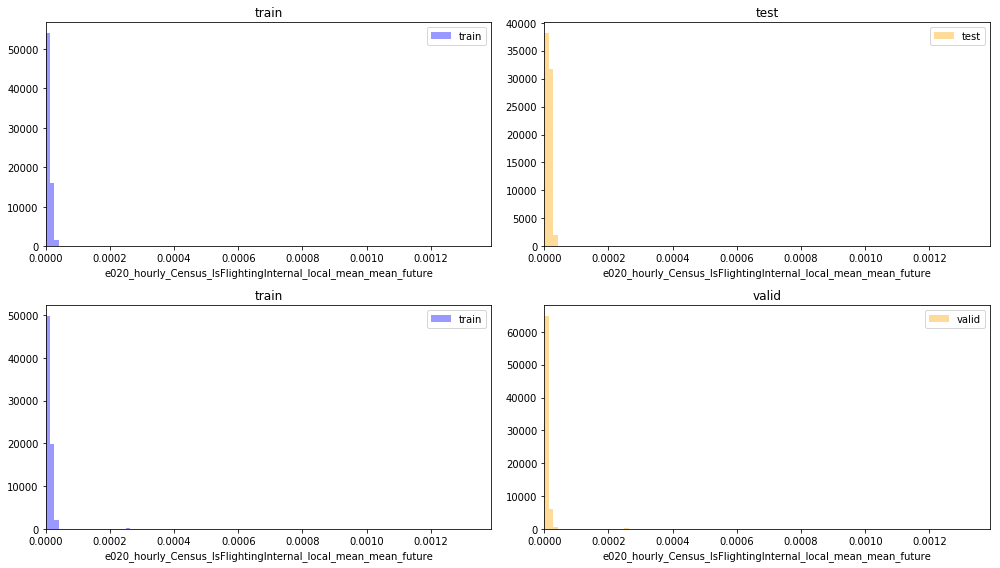

========== e020_daily_AutoSampleOptIn_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


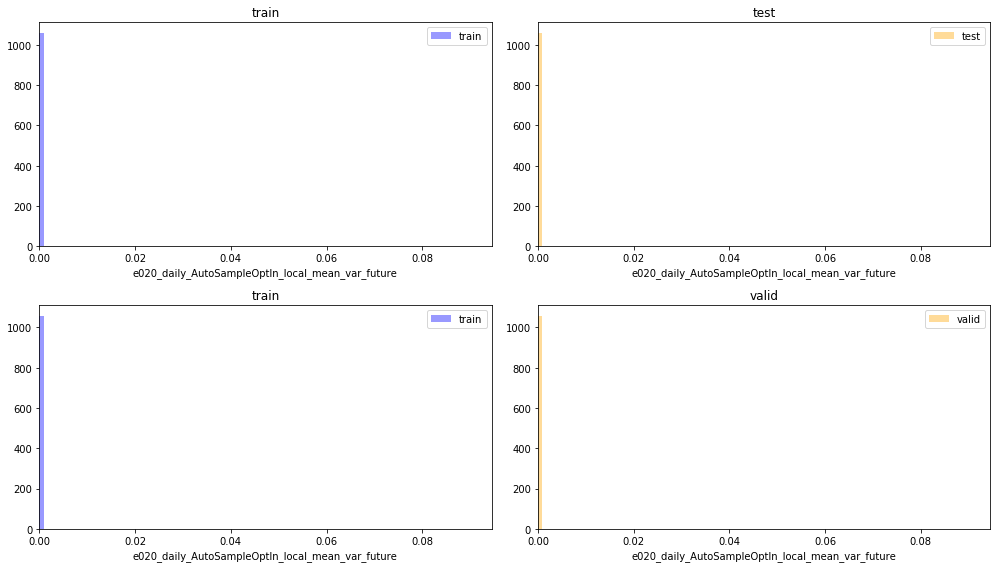

========== e020_daily_IsBeta_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


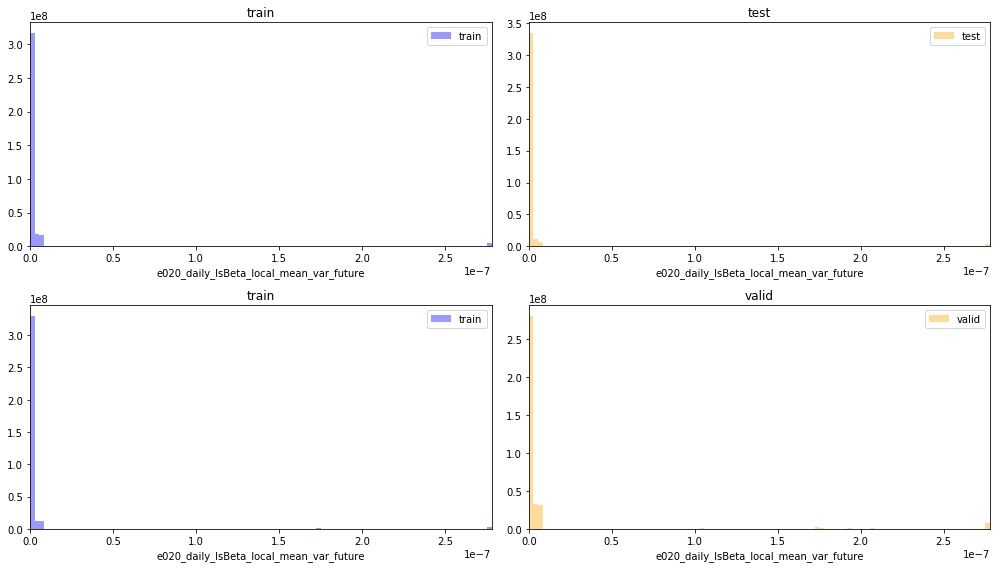

========== e020_daily_Census_HasOpticalDiskDrive_local_mean_var ===========
(8918336, 180), (1250116, 180)


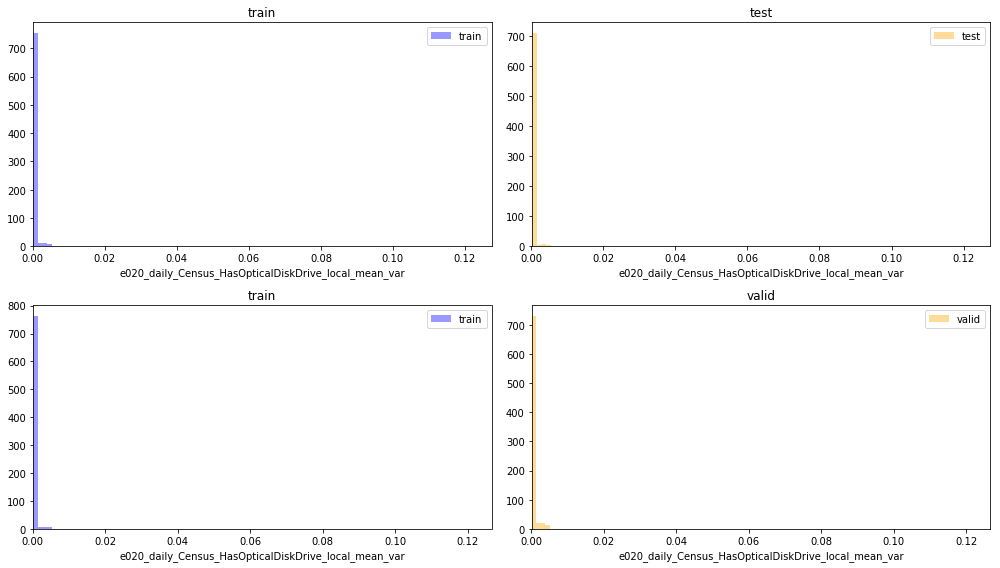

========== e020_daily_Census_IsFlightingInternal_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


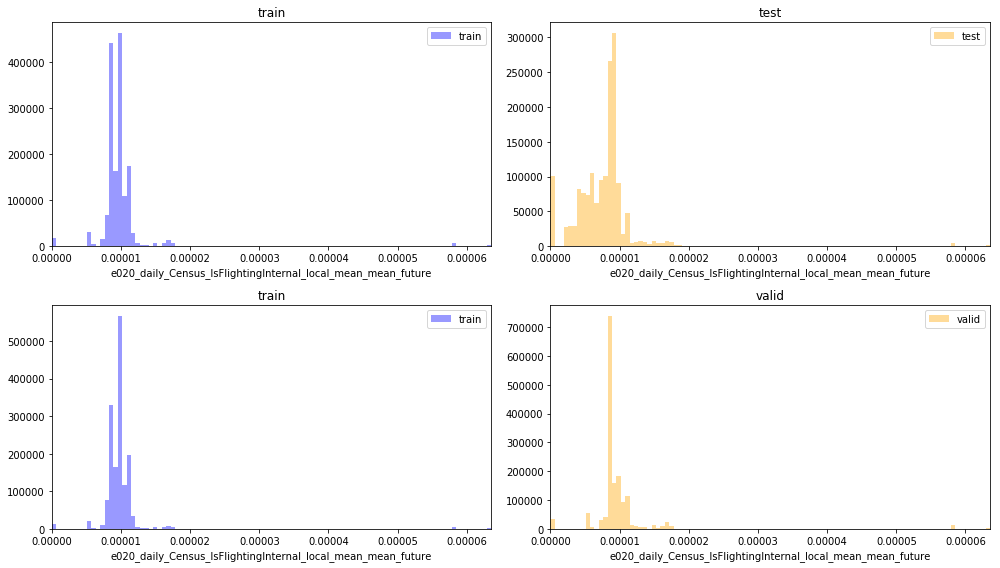

========== e020_Wdft_IsGamer_local_mean ===========
(8918336, 180), (1250116, 180)


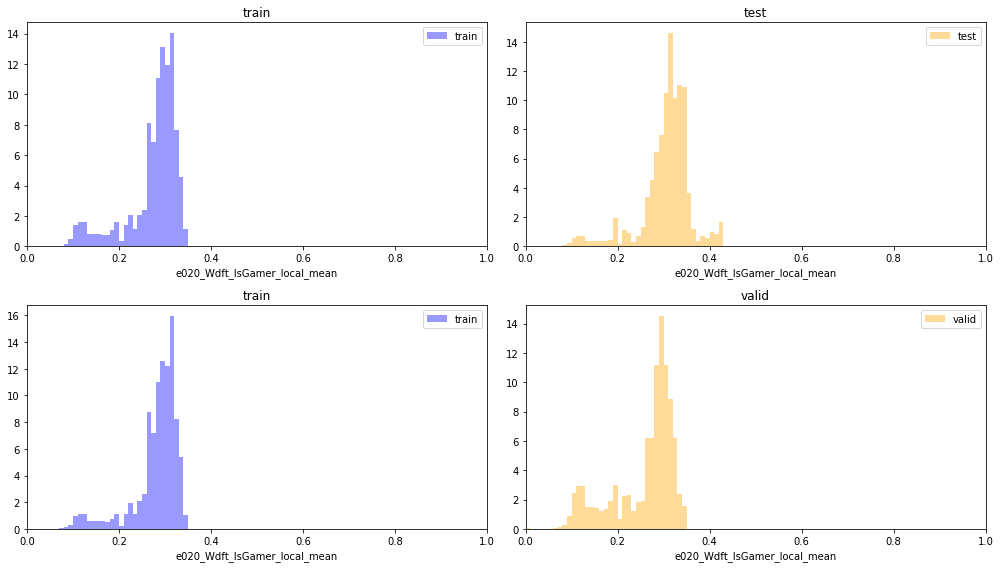

========== e020_daily_HasTpm_local_mean_var ===========
(8918336, 180), (1250116, 180)


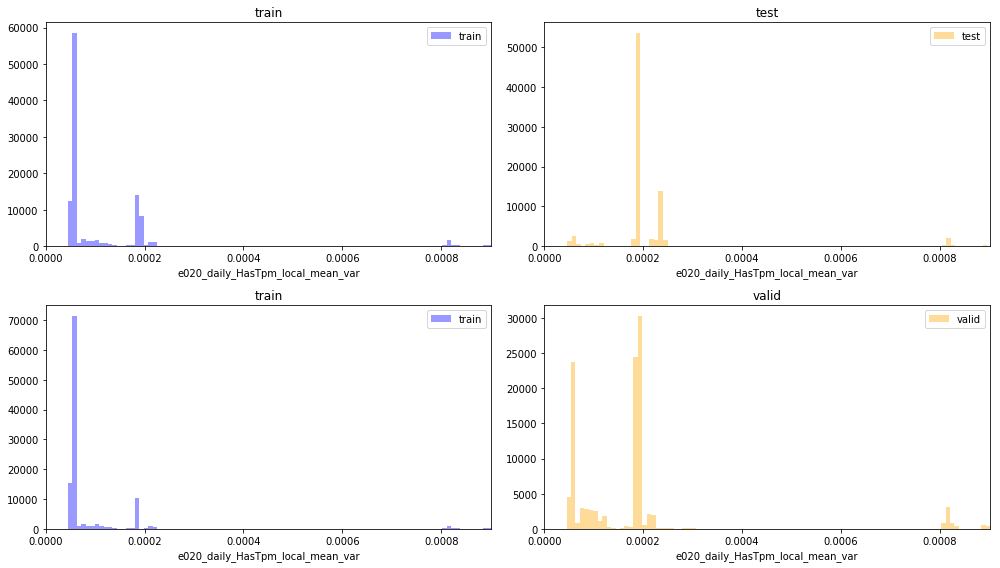

========== e020_daily_Census_ThresholdOptIn_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


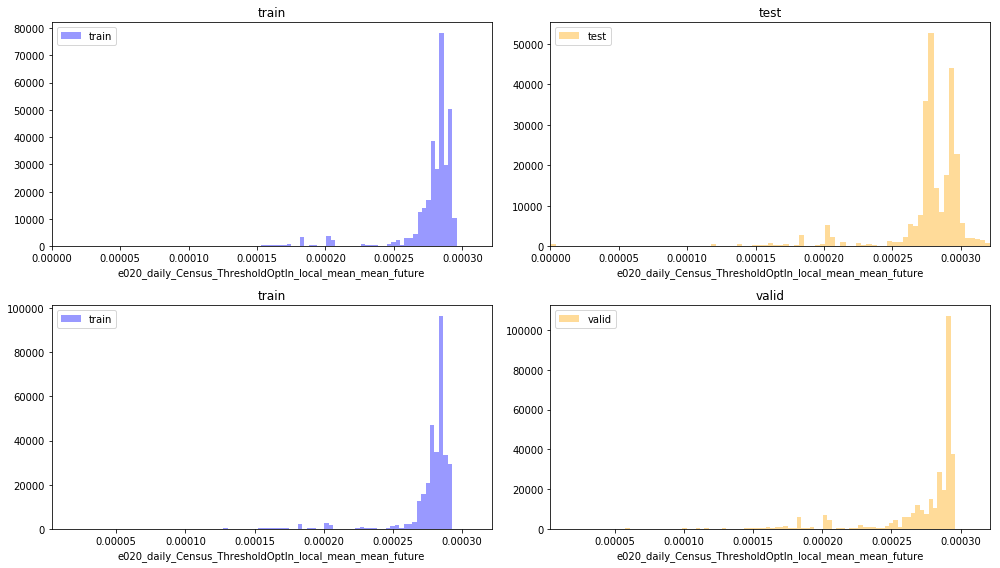

========== e020_Census_IsVirtualDevice_local_mean ===========
(8918336, 180), (1250116, 180)


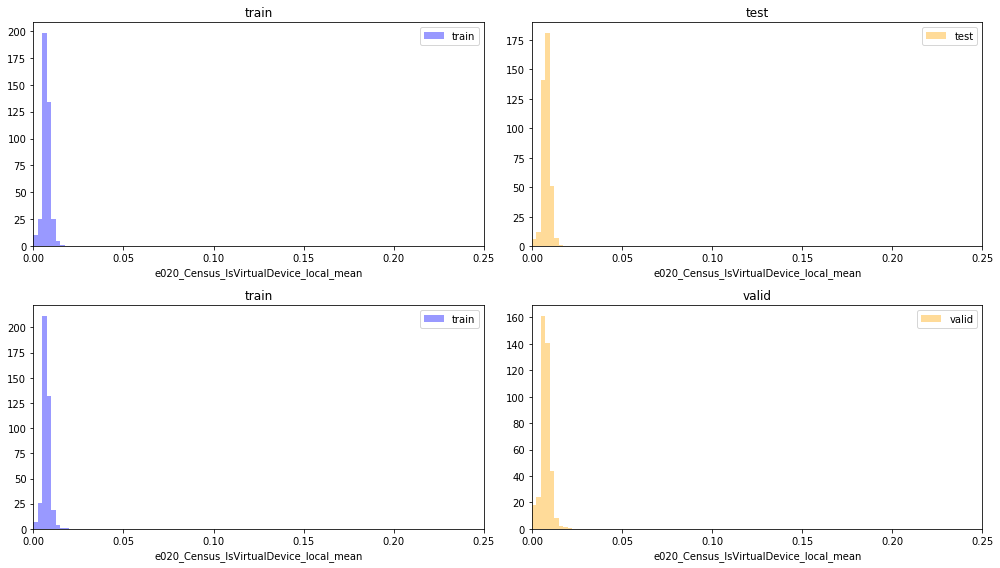

========== e020_daily_Census_IsPortableOperatingSystem_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


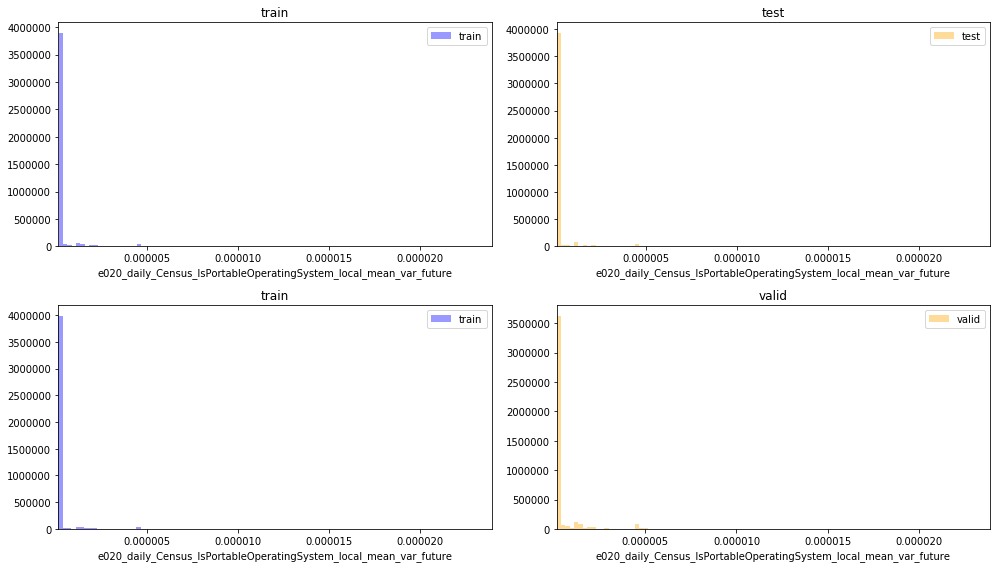

========== e020_hourly_IsProtected_local_mean_mean ===========
(8918336, 180), (1250116, 180)


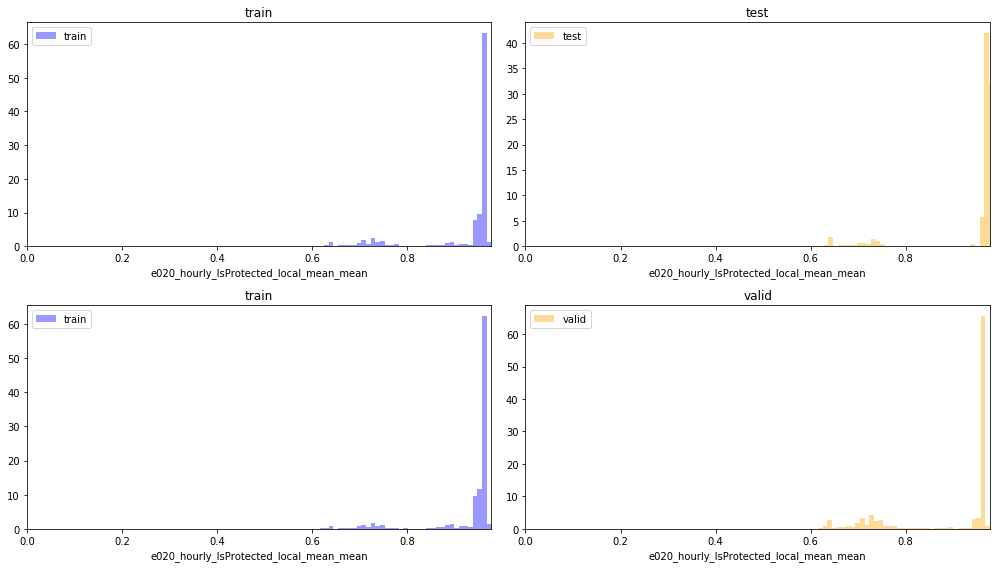

========== e020_hourly_Census_IsPortableOperatingSystem_local_mean_mean ===========
(8918336, 180), (1250116, 180)


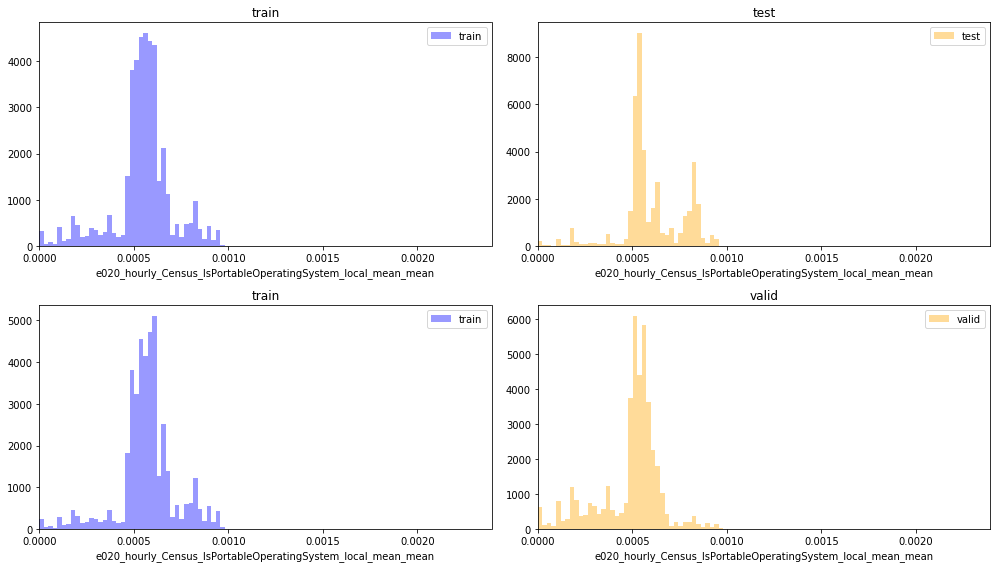

========== e020_daily_Census_IsSecureBootEnabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


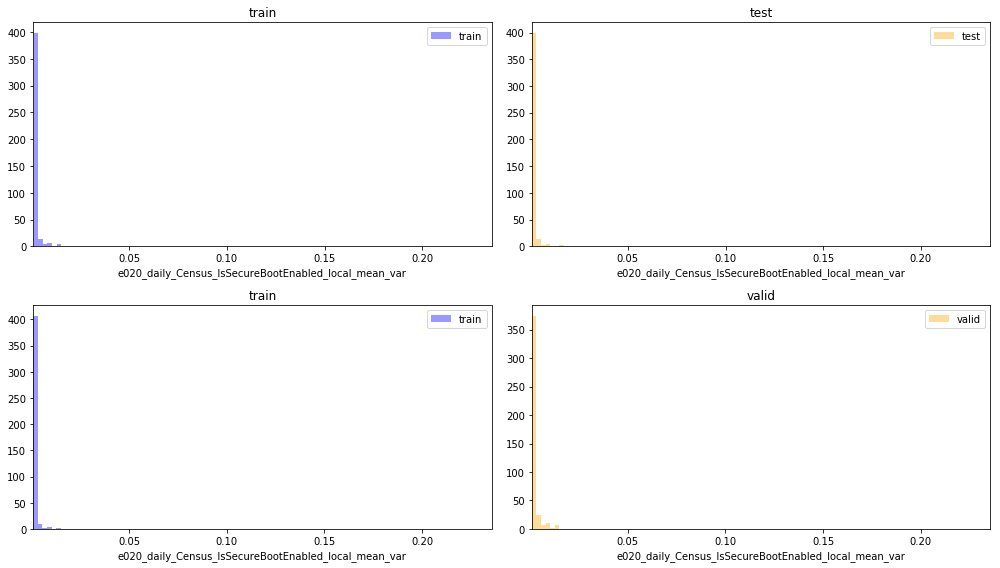

========== e020_daily_Census_IsFlightingInternal_local_mean_mean ===========
(8918336, 180), (1250116, 180)


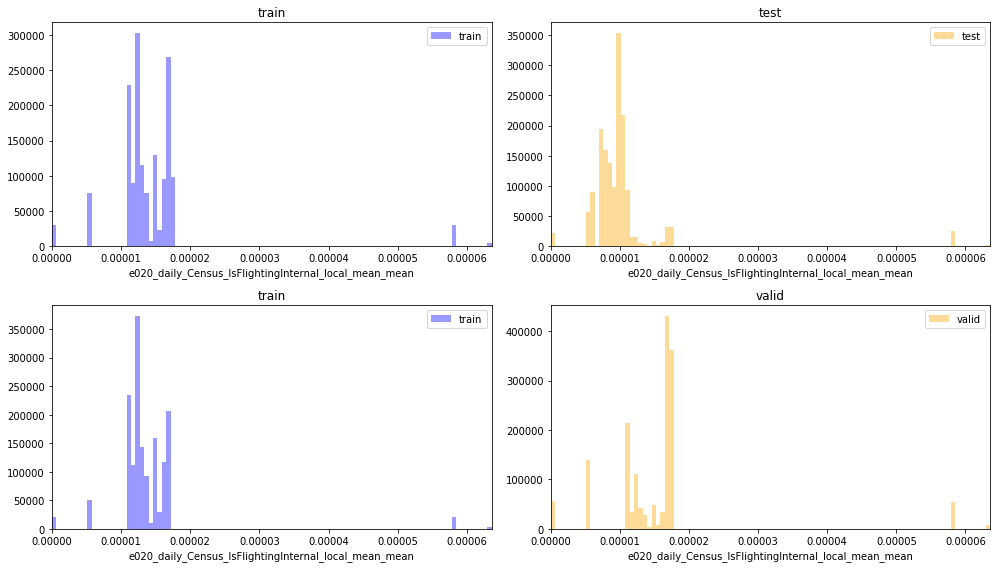

========== e020_HasTpm_local_mean ===========
(8918336, 180), (1250116, 180)


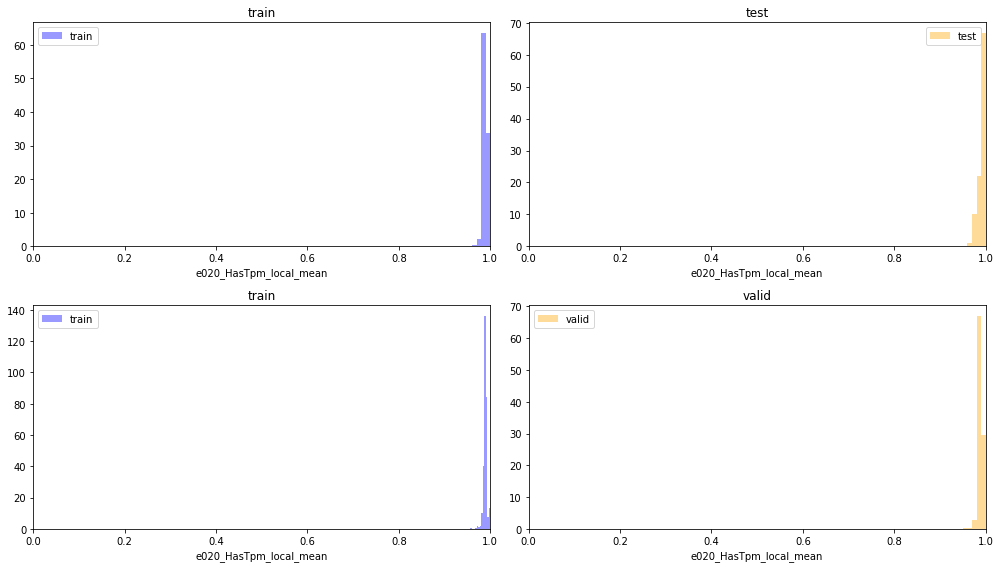

========== e020_daily_IsSxsPassiveMode_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


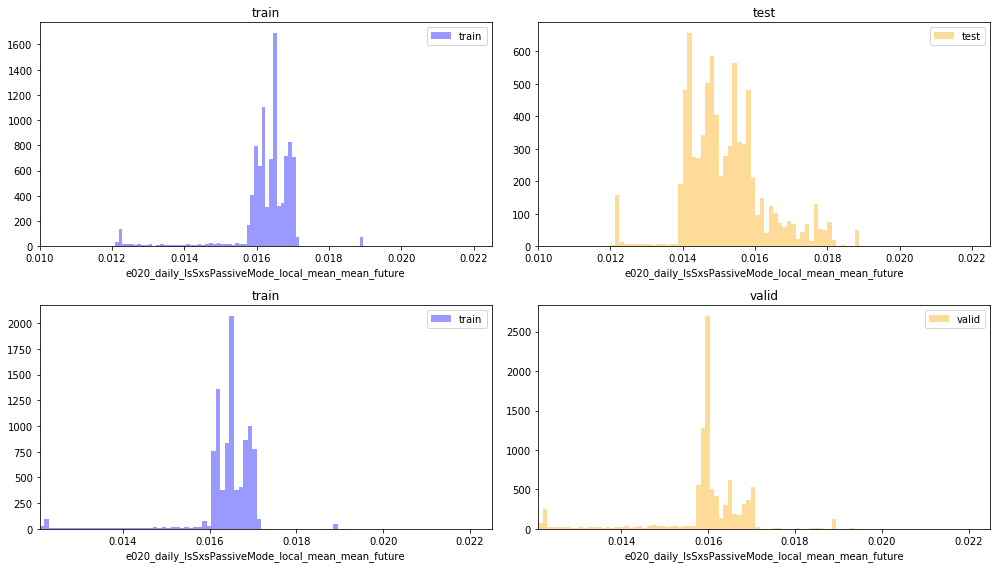

========== e020_hourly_Census_ThresholdOptIn_local_mean_mean ===========
(8918336, 180), (1250116, 180)


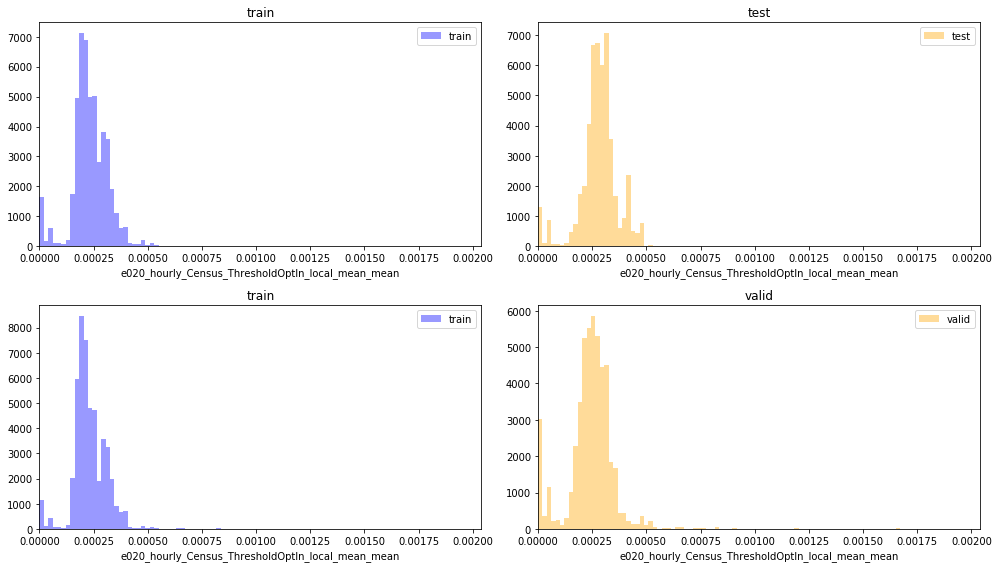

========== e020_daily_IsBeta_local_mean_var ===========
(8918336, 180), (1250116, 180)


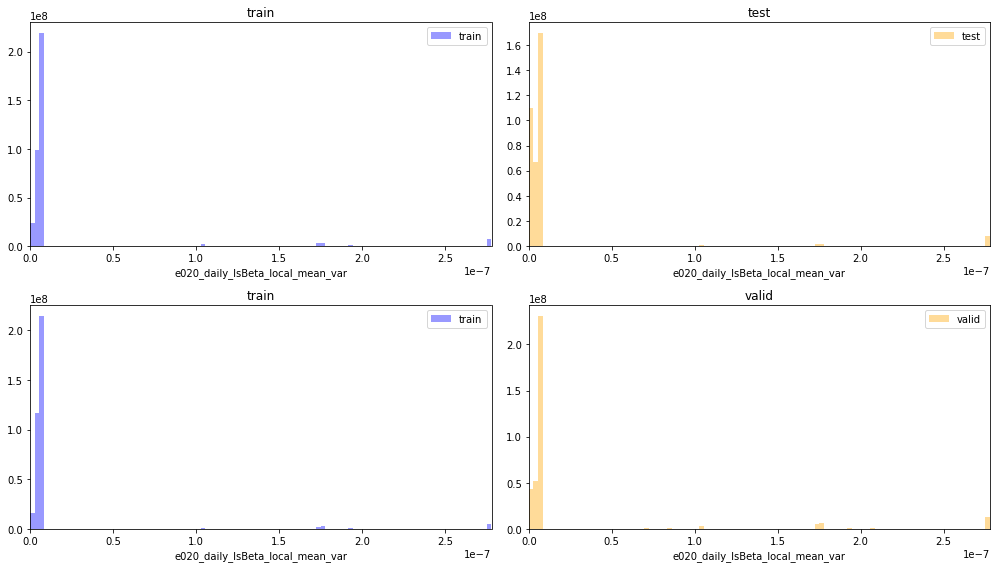

========== e020_daily_HasTpm_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


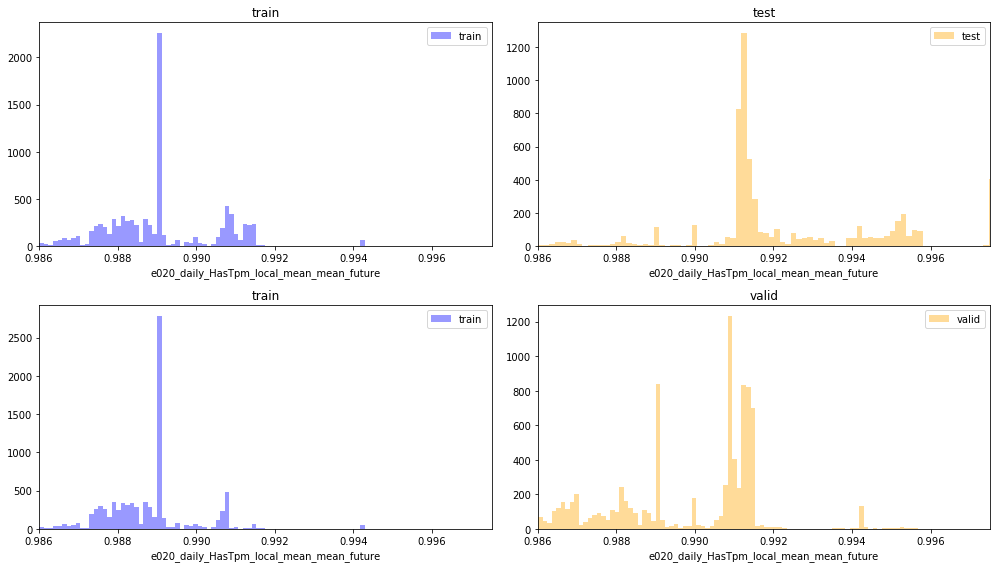

========== e020_daily_SMode_local_mean_var ===========
(8918336, 180), (1250116, 180)


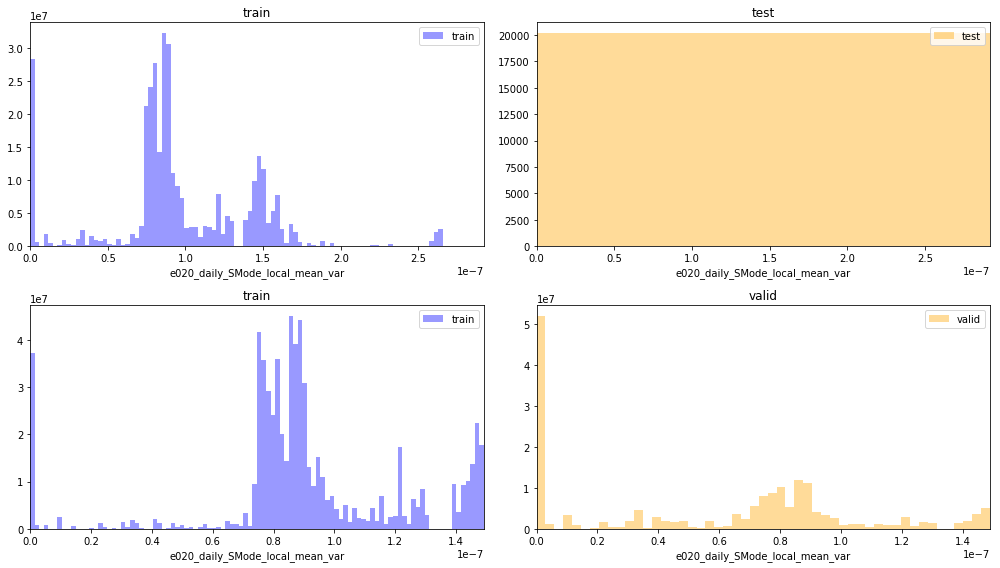

========== e020_hourly_AutoSampleOptIn_local_mean_var ===========
(8918336, 180), (1250116, 180)


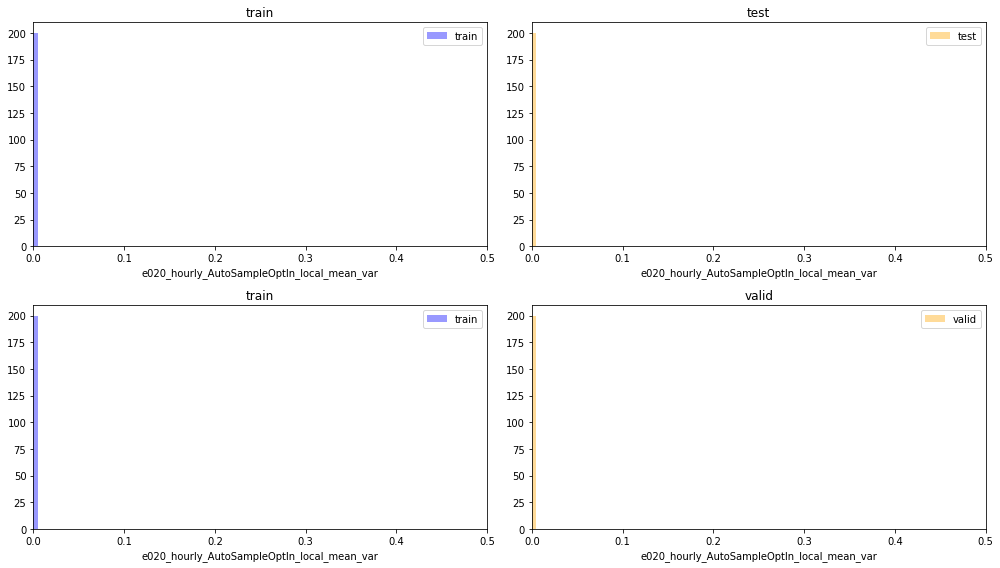

========== e020_daily_HasDetections_local_mean_mean ===========
(8918336, 180), (1250116, 180)


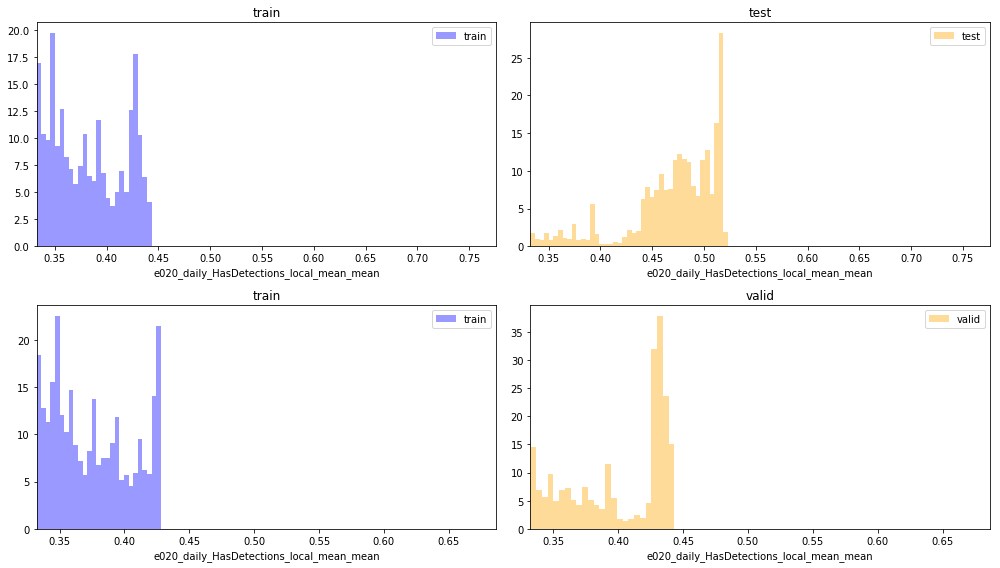

========== e020_hourly_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_mean ===========
(8918336, 180), (1250116, 180)


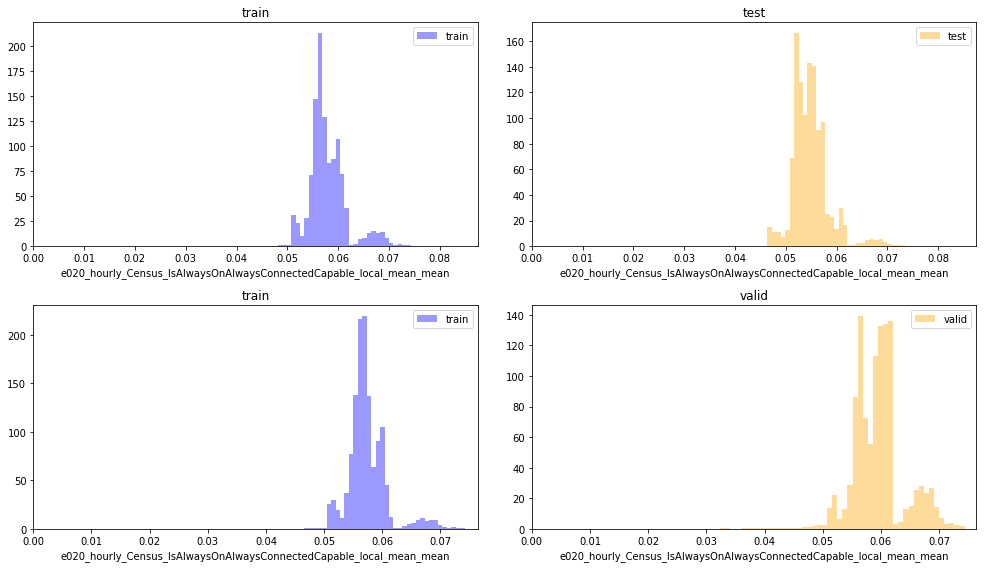

========== e020_daily_Census_IsPenCapable_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


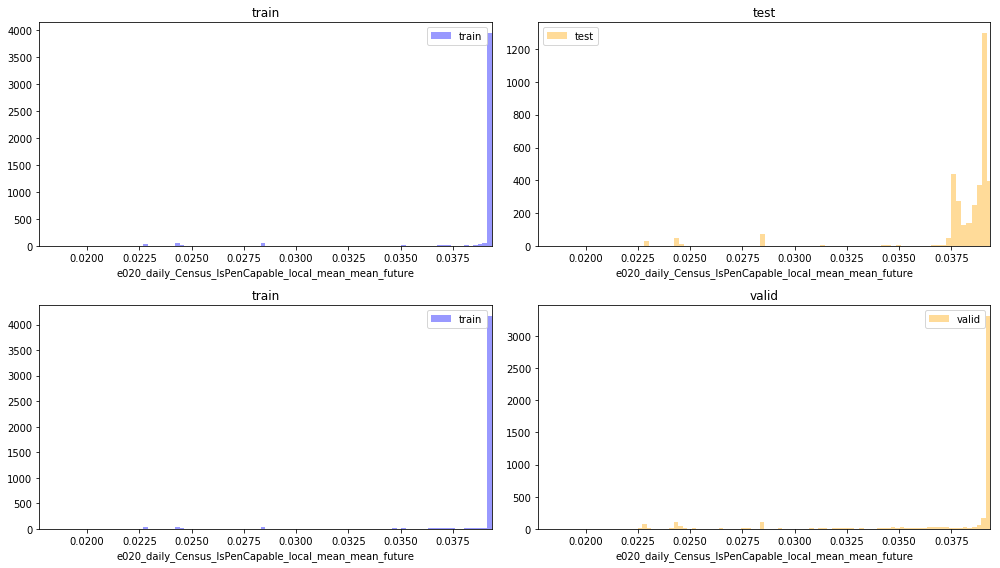

========== e020_daily_Census_IsPenCapable_local_mean_var ===========
(8918336, 180), (1250116, 180)


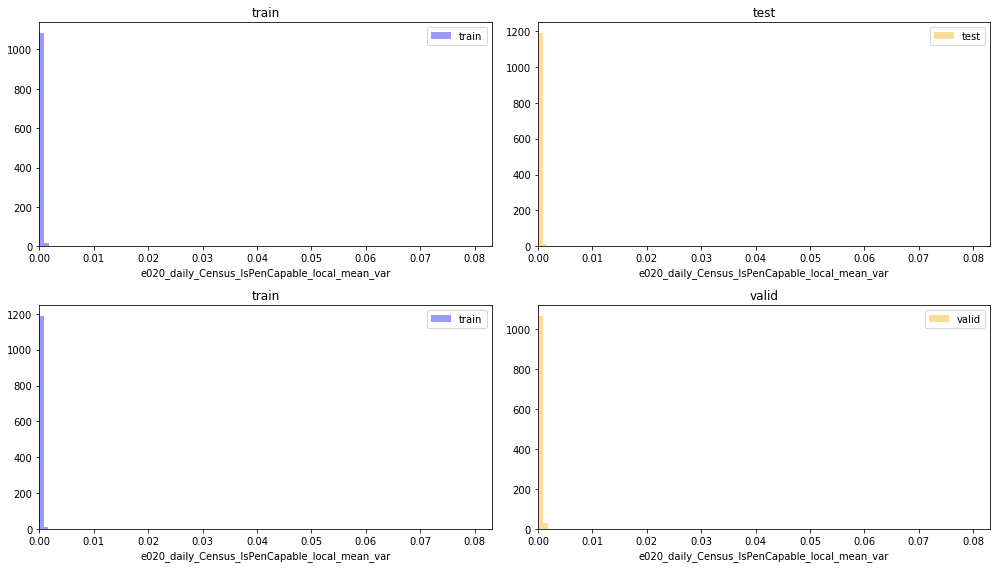

========== e020_daily_Census_ThresholdOptIn_local_mean_mean ===========
(8918336, 180), (1250116, 180)


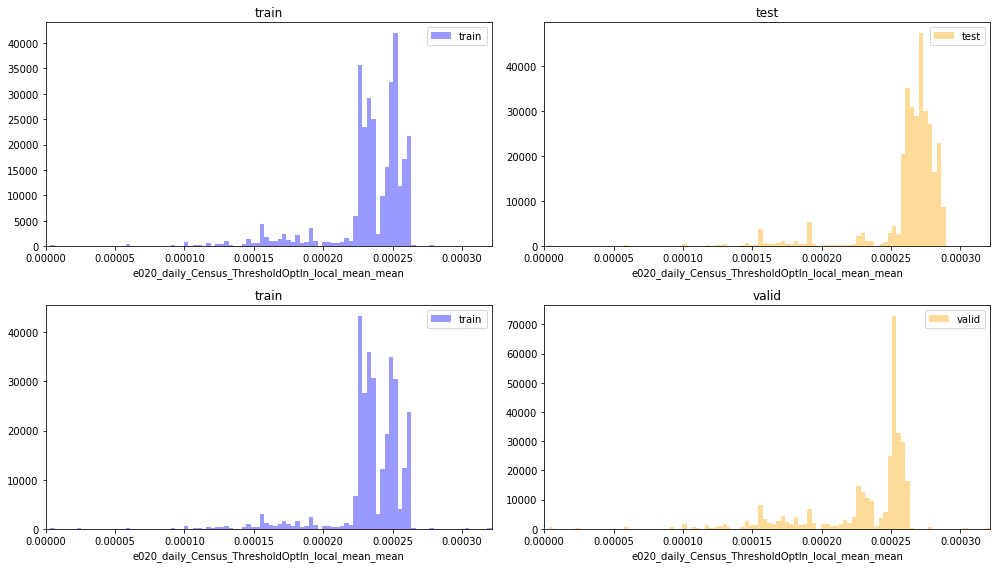

========== e020_daily_HasDetections_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


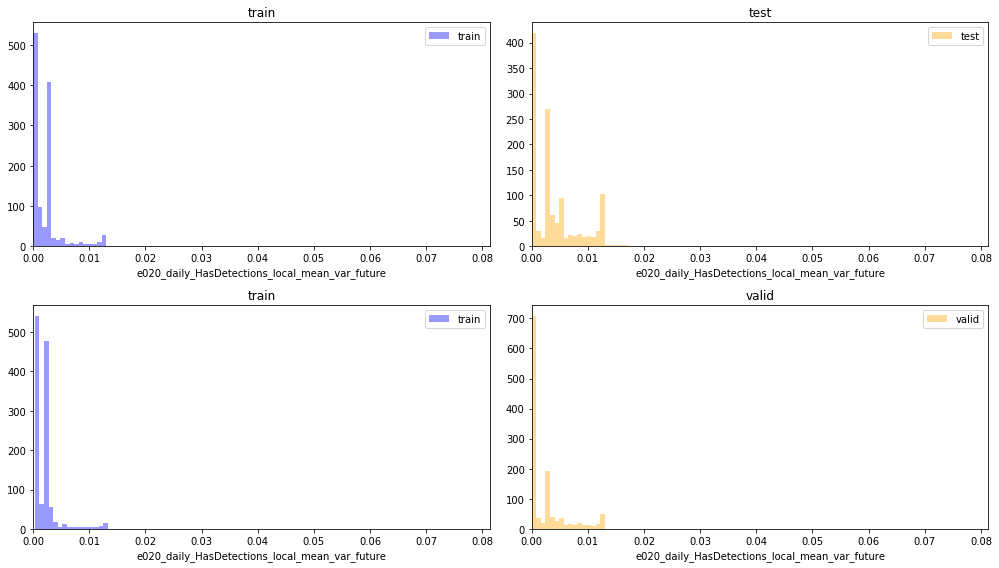

========== e020_hourly_Census_IsPenCapable_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


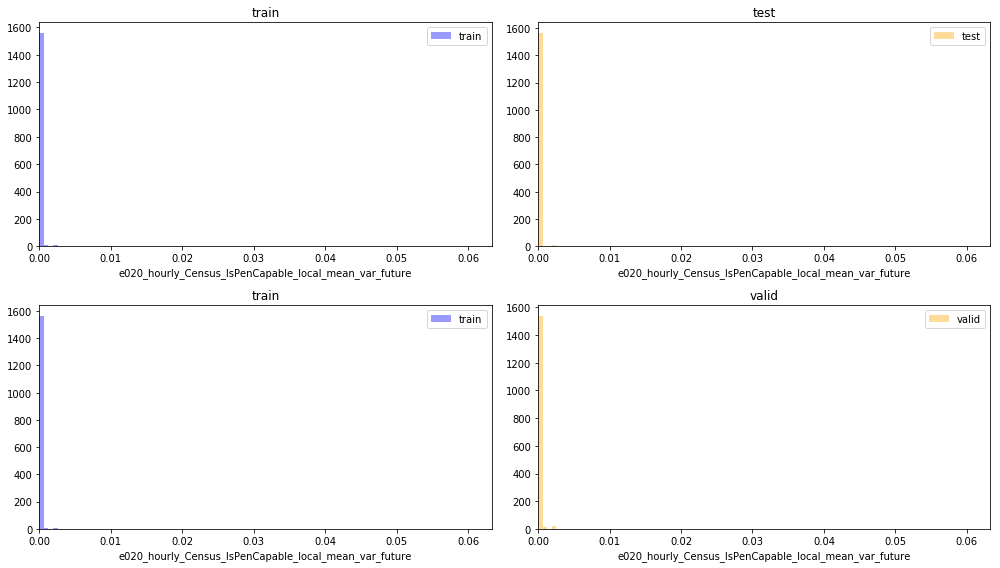

========== e020_daily_AutoSampleOptIn_local_mean_mean ===========
(8918336, 180), (1250116, 180)


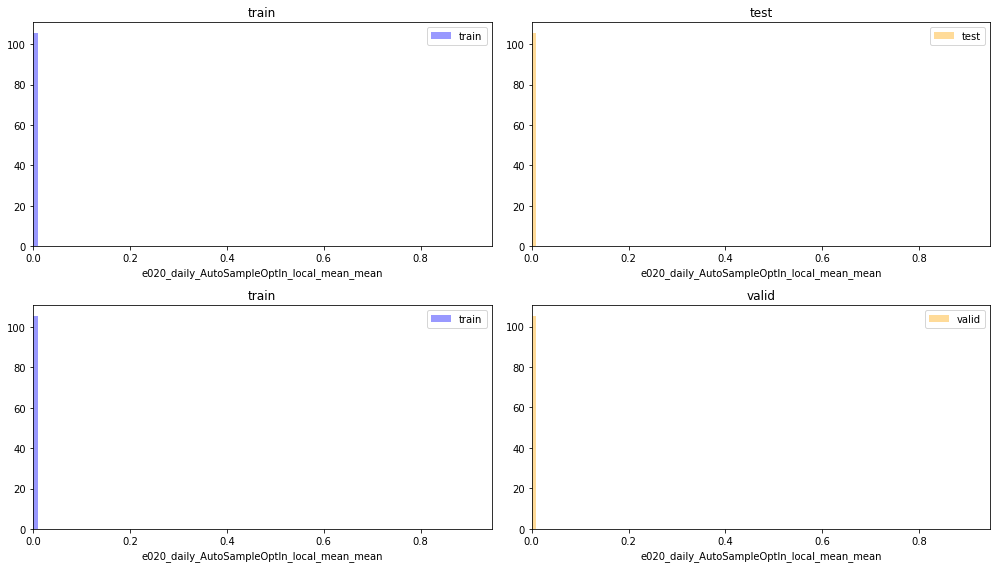

========== e020_hourly_IsProtected_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


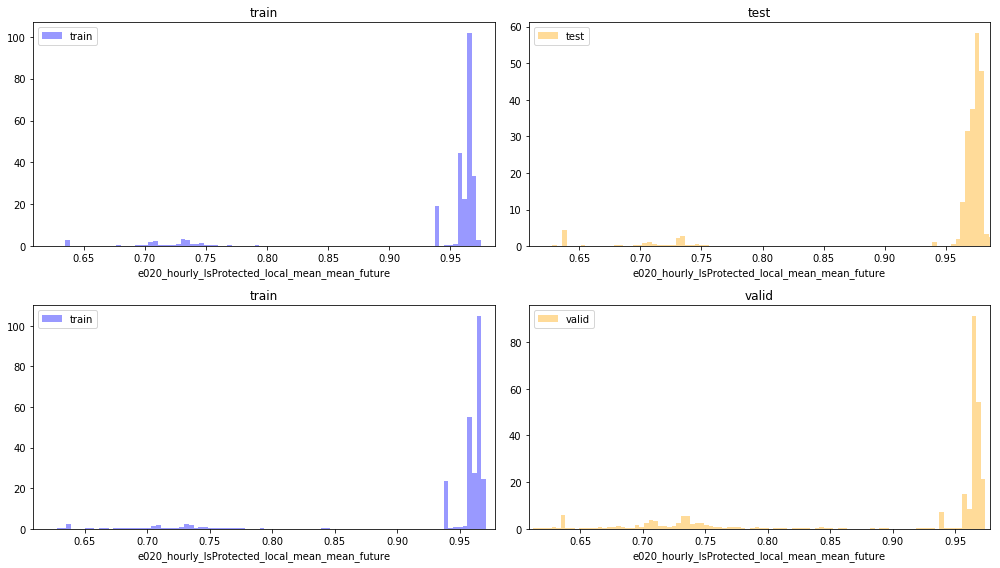

========== e020_daily_IsBeta_local_mean_mean ===========
(8918336, 180), (1250116, 180)


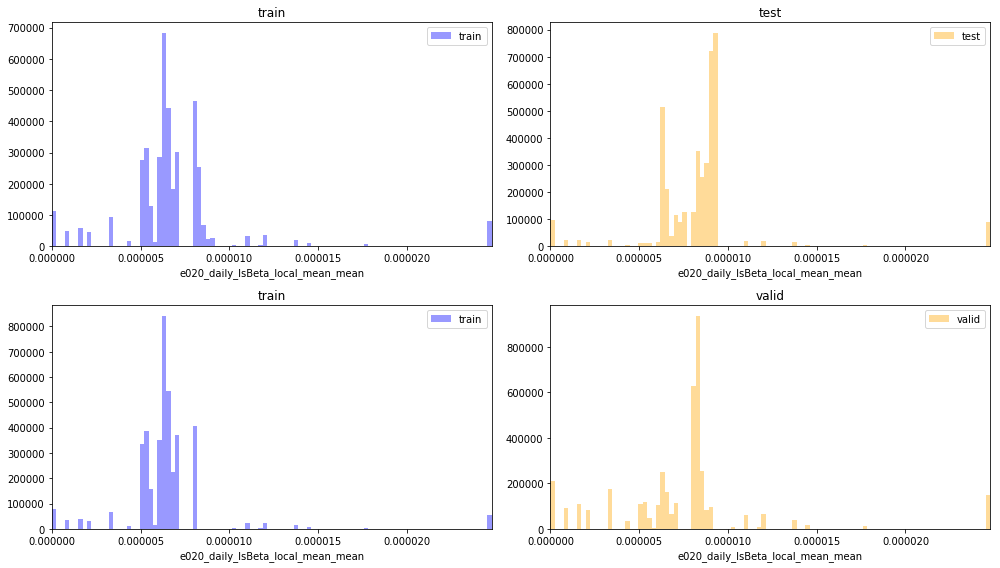

========== e020_SMode_local_mean ===========
(8918336, 180), (1250116, 180)


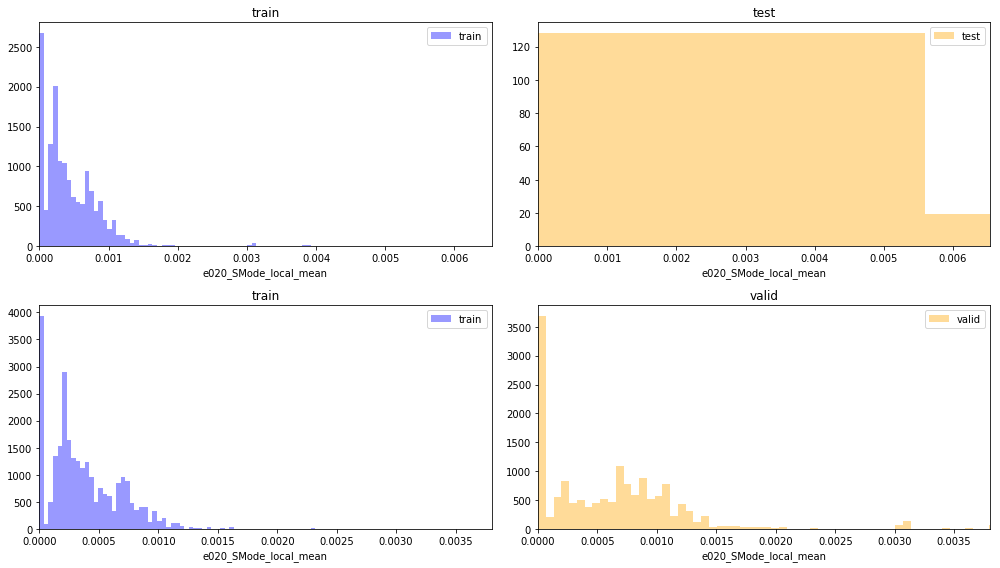

========== e020_Census_ThresholdOptIn_local_mean ===========
(8918336, 180), (1250116, 180)


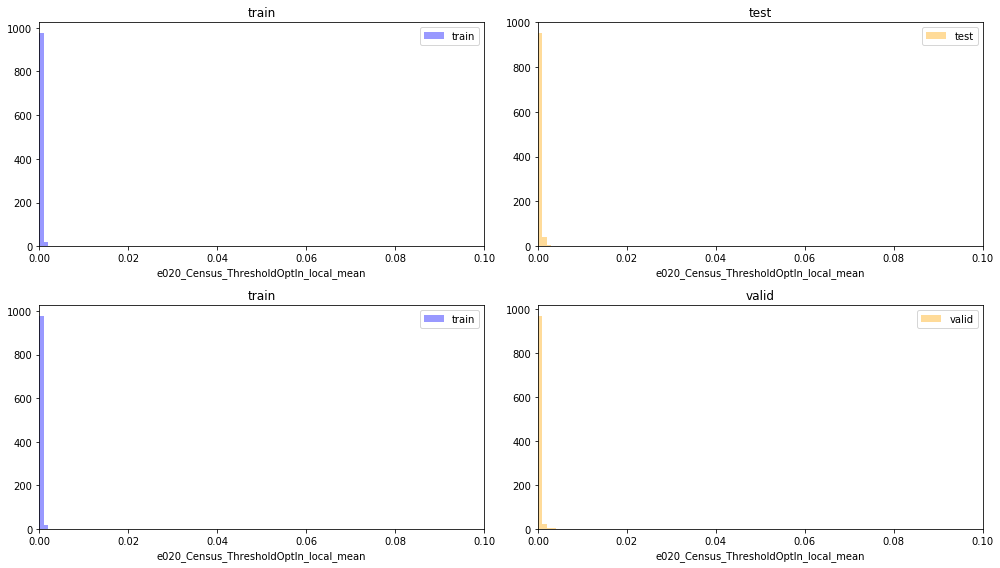

========== e020_hourly_Census_IsFlightingInternal_local_mean_mean ===========
(8918336, 180), (1250116, 180)


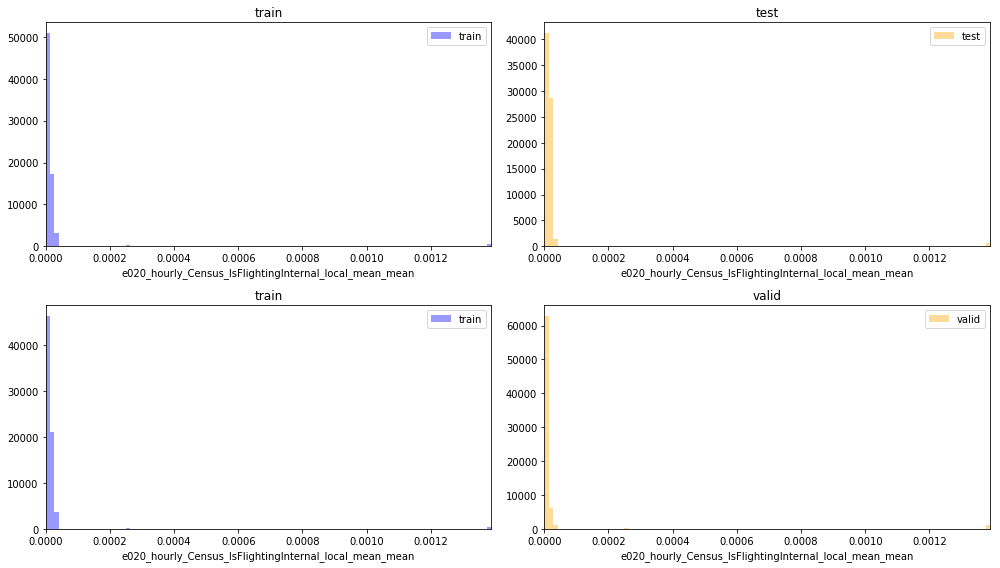

========== e020_hourly_Census_IsTouchEnabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


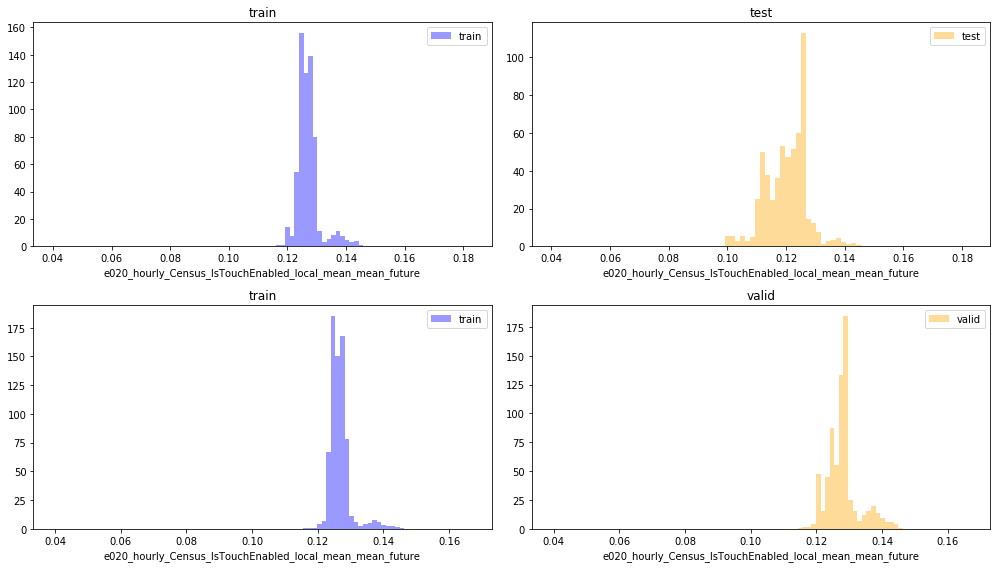

========== e020_hourly_Census_HasOpticalDiskDrive_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


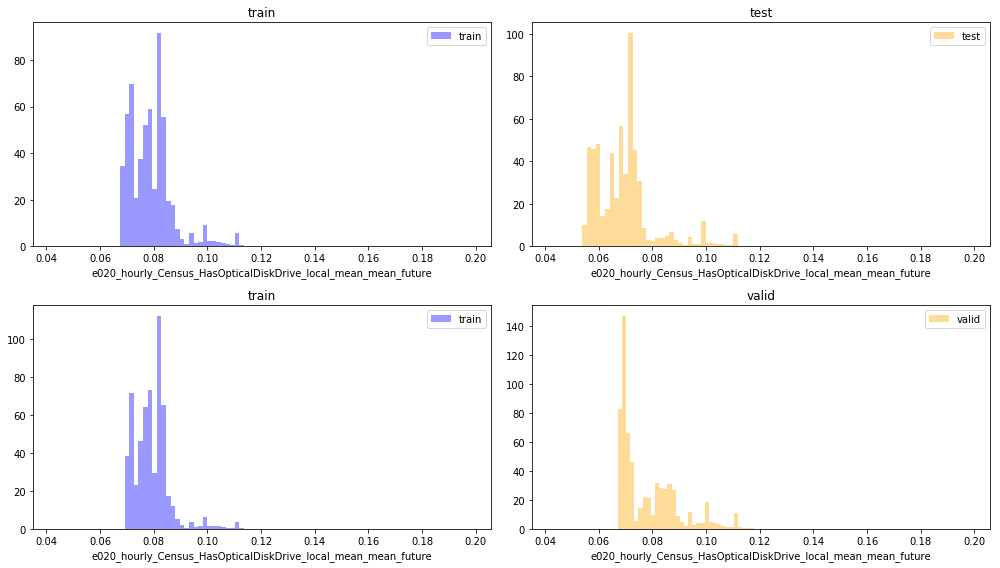

========== e020_Census_IsPortableOperatingSystem_local_mean ===========
(8918336, 180), (1250116, 180)


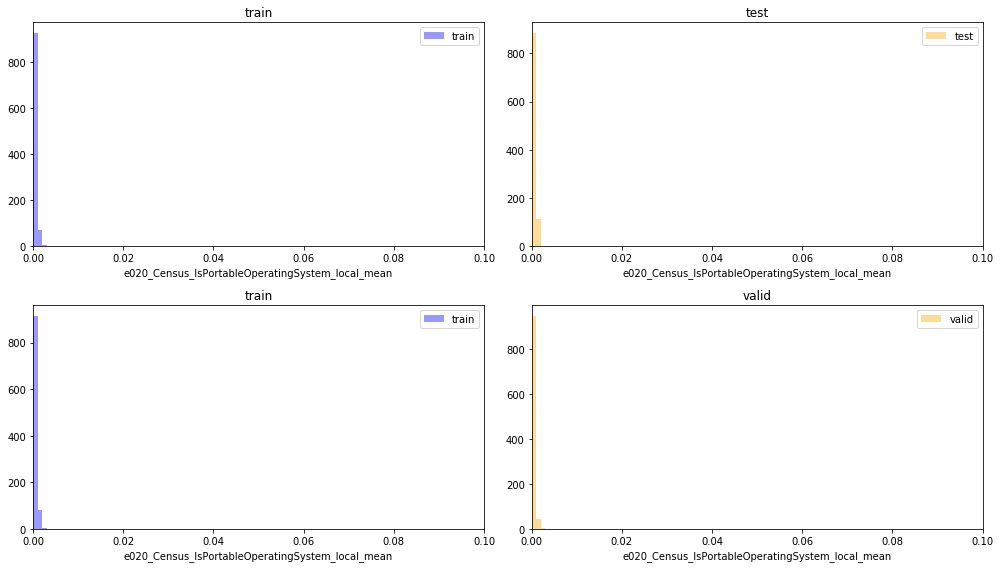

========== e020_daily_Firewall_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


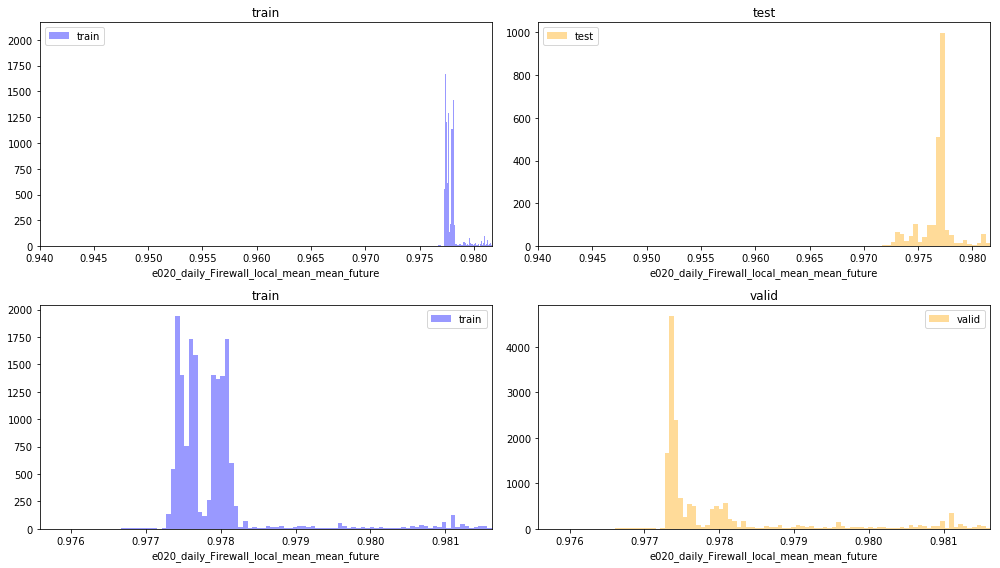

========== e020_AutoSampleOptIn_local_mean ===========
(8918336, 180), (1250116, 180)


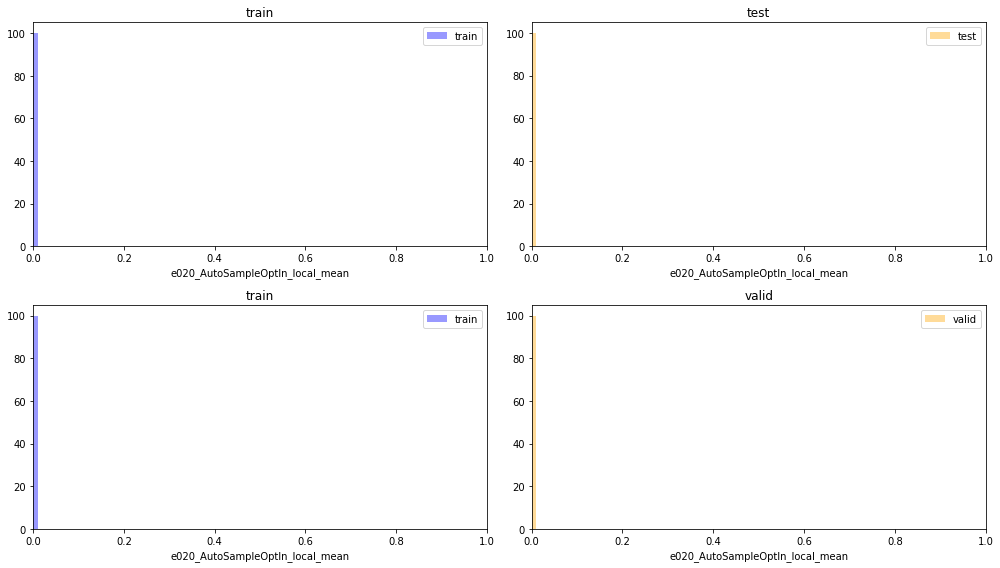

========== e020_hourly_Census_IsFlightingInternal_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


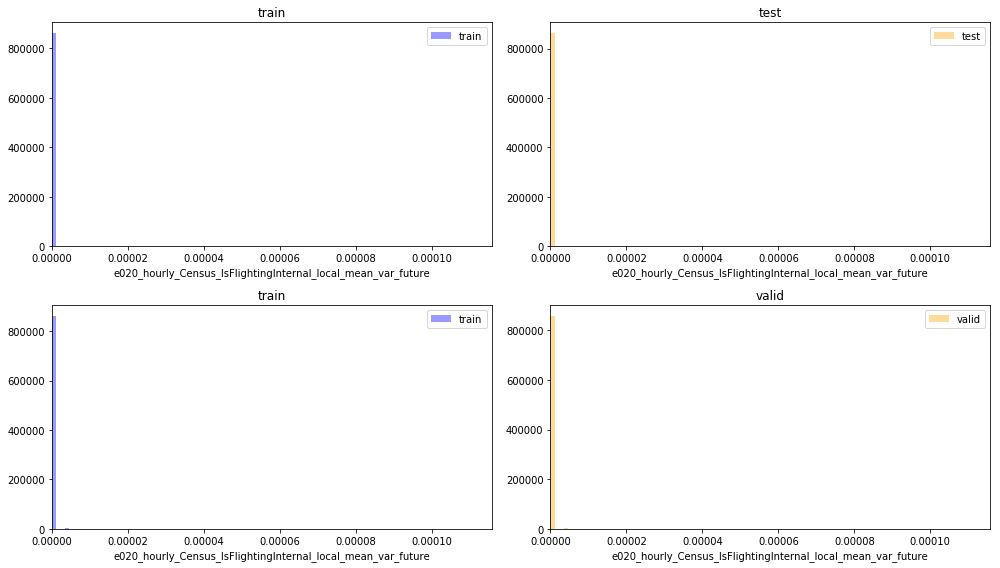

========== e020_daily_Census_ThresholdOptIn_local_mean_var ===========
(8918336, 180), (1250116, 180)


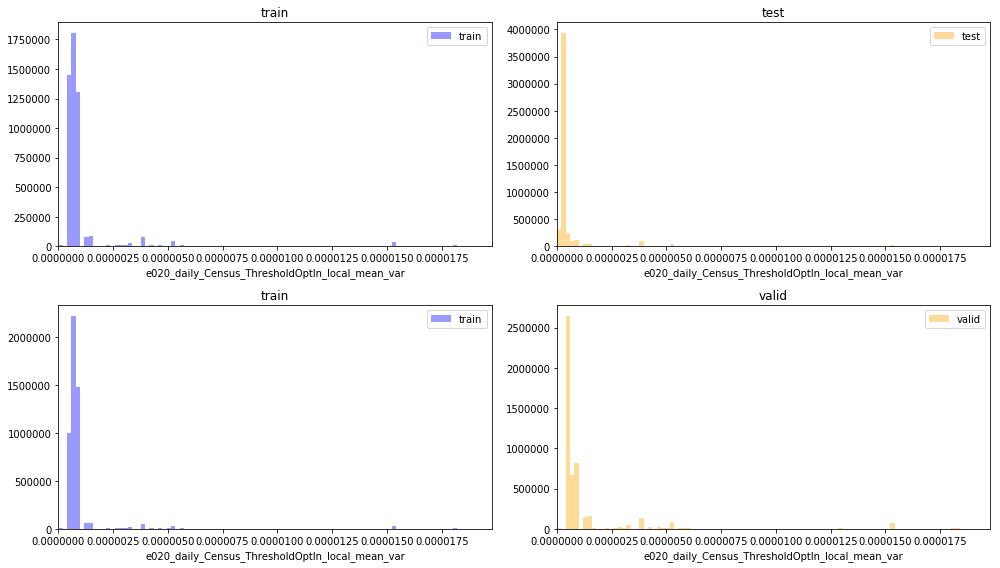

========== e020_daily_Census_IsPenCapable_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


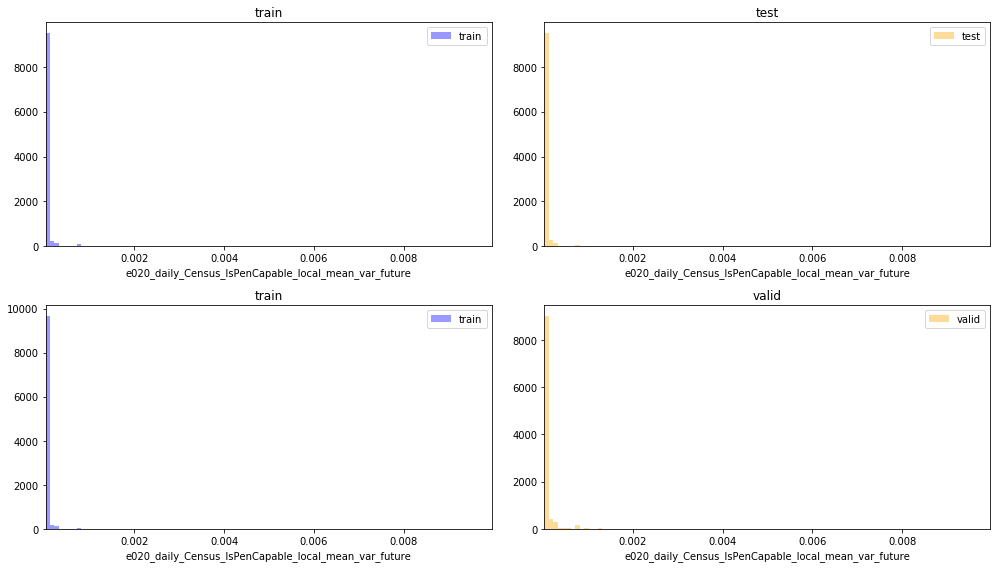

========== e020_hourly_Census_IsFlightsDisabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


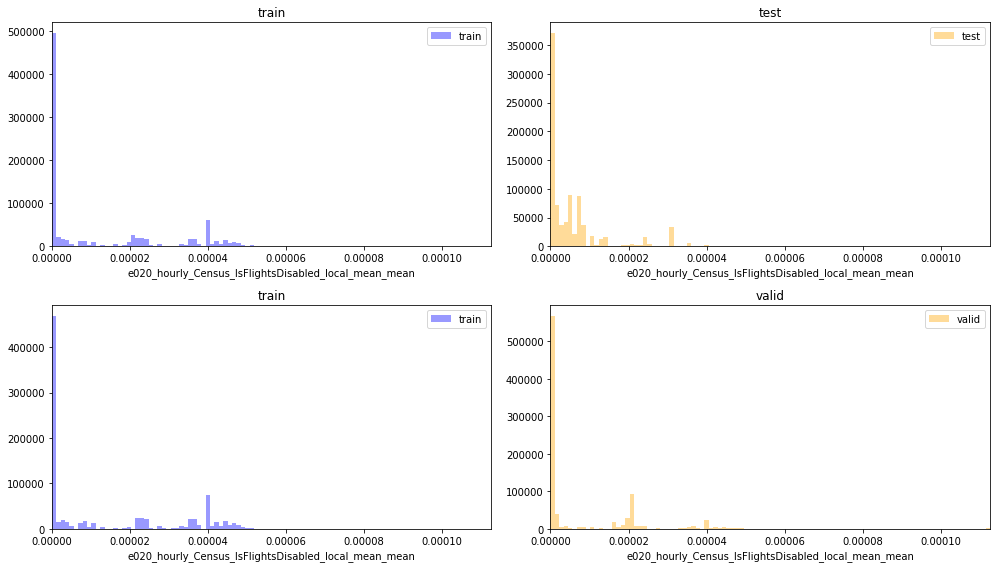

========== e020_hourly_SMode_local_mean_var ===========
(8918336, 180), (1250116, 180)


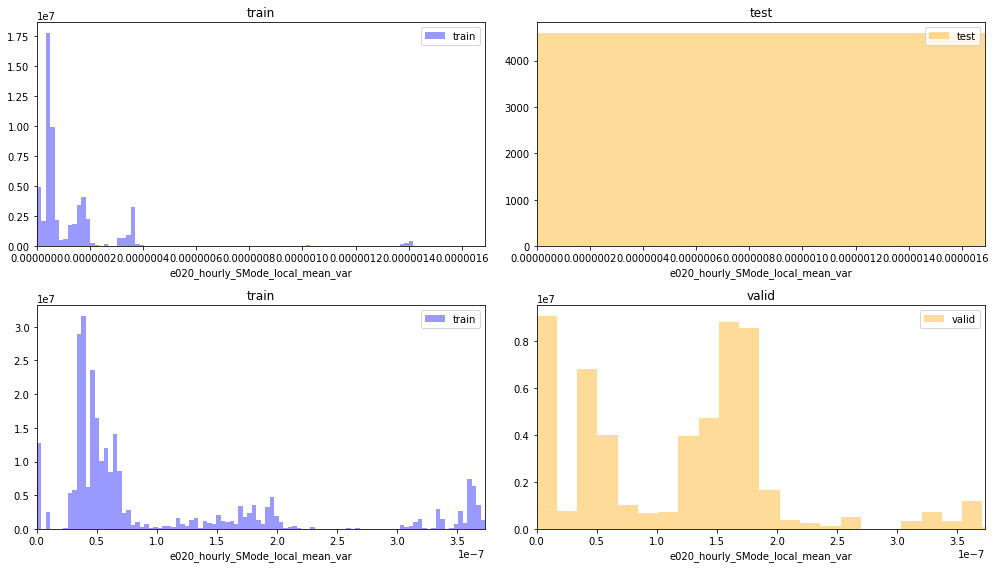

========== e020_hourly_IsSxsPassiveMode_local_mean_mean ===========
(8918336, 180), (1250116, 180)


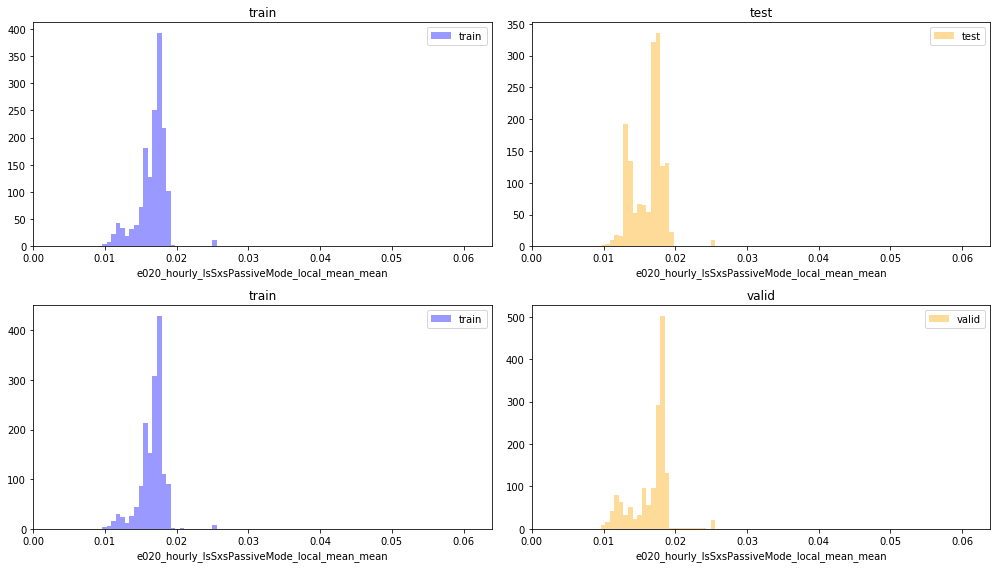

========== e020_daily_IsSxsPassiveMode_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


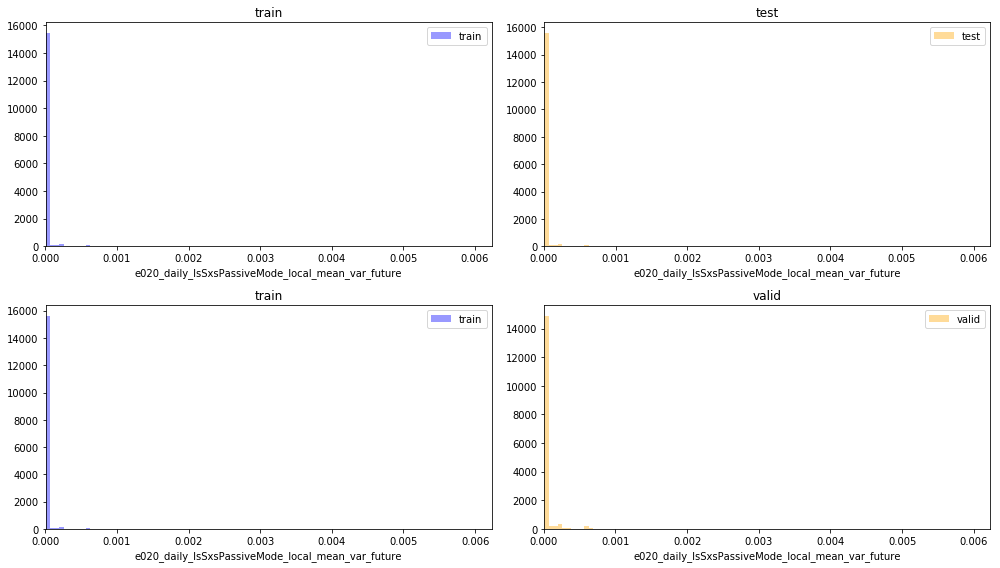

========== e020_daily_IsSxsPassiveMode_local_mean_mean ===========
(8918336, 180), (1250116, 180)


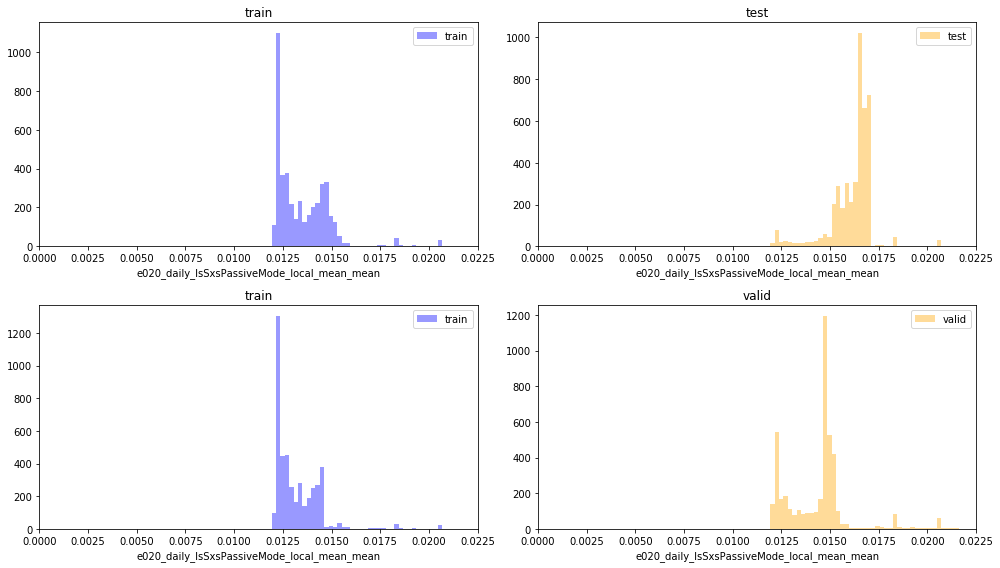

========== e020_daily_HasDetections_local_mean_var ===========
(8918336, 180), (1250116, 180)


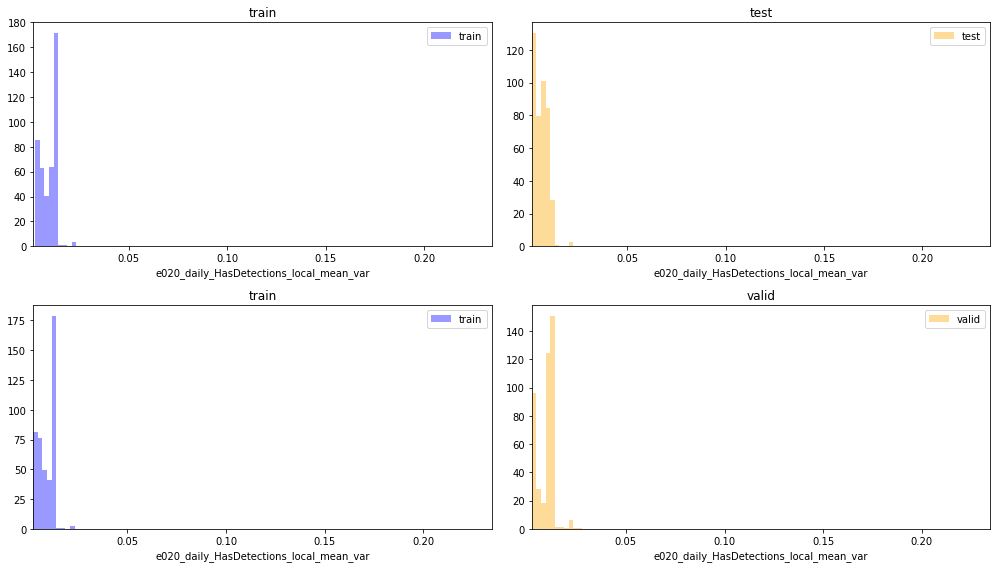

========== e020_daily_Census_IsFlightsDisabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


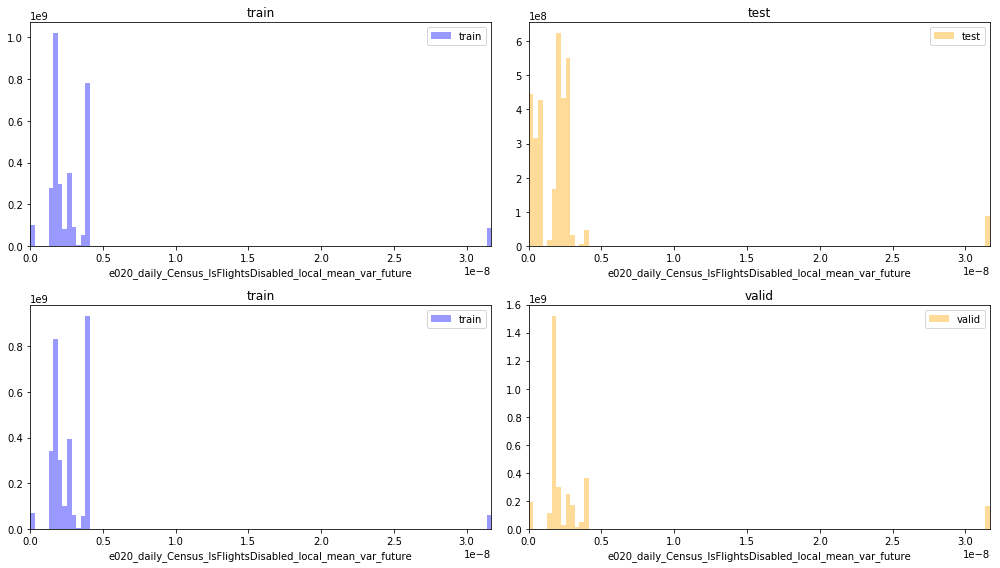

========== e020_daily_Census_HasOpticalDiskDrive_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


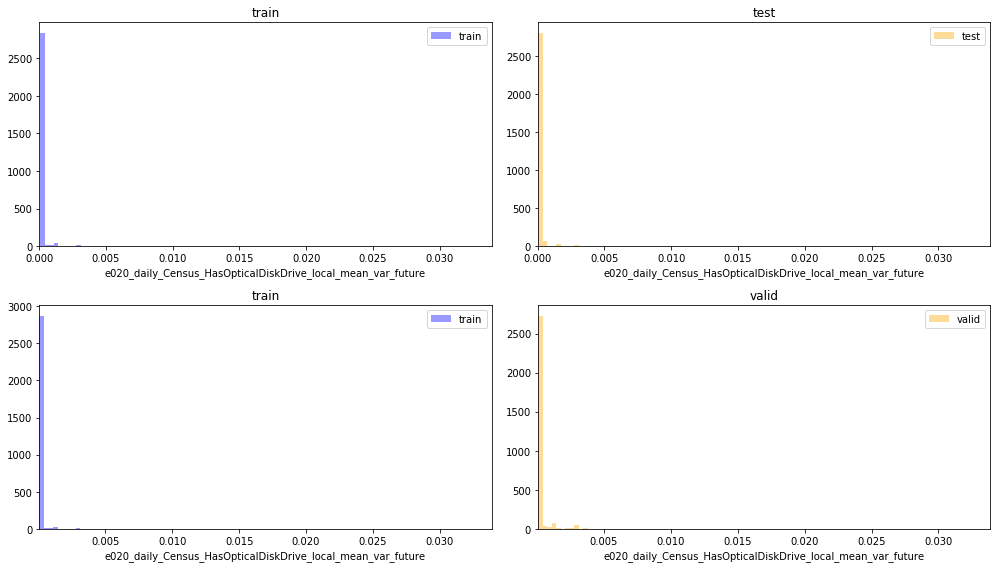

========== e020_daily_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_mean ===========
(8918336, 180), (1250116, 180)


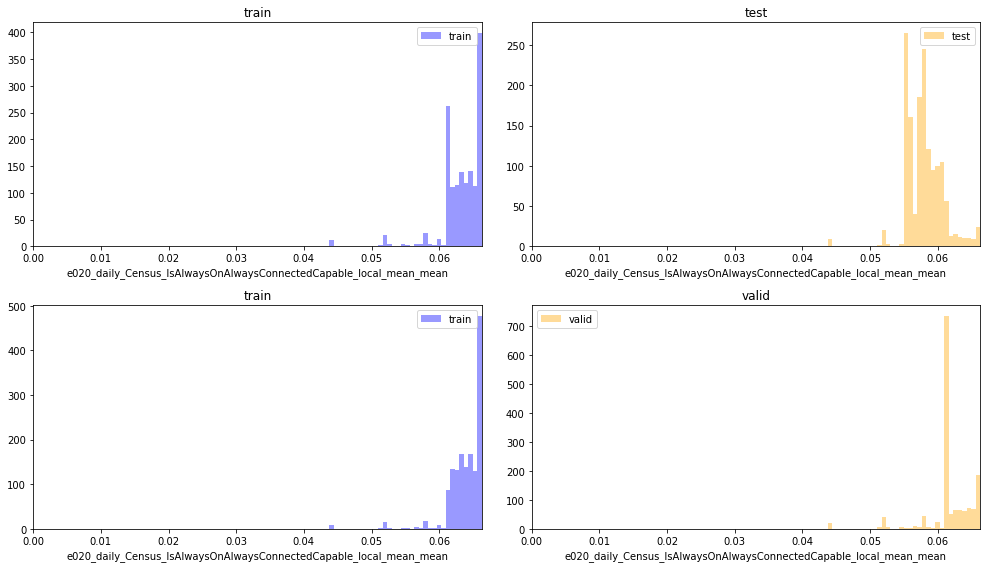

========== e020_daily_IsProtected_local_mean_var ===========
(8918336, 180), (1250116, 180)


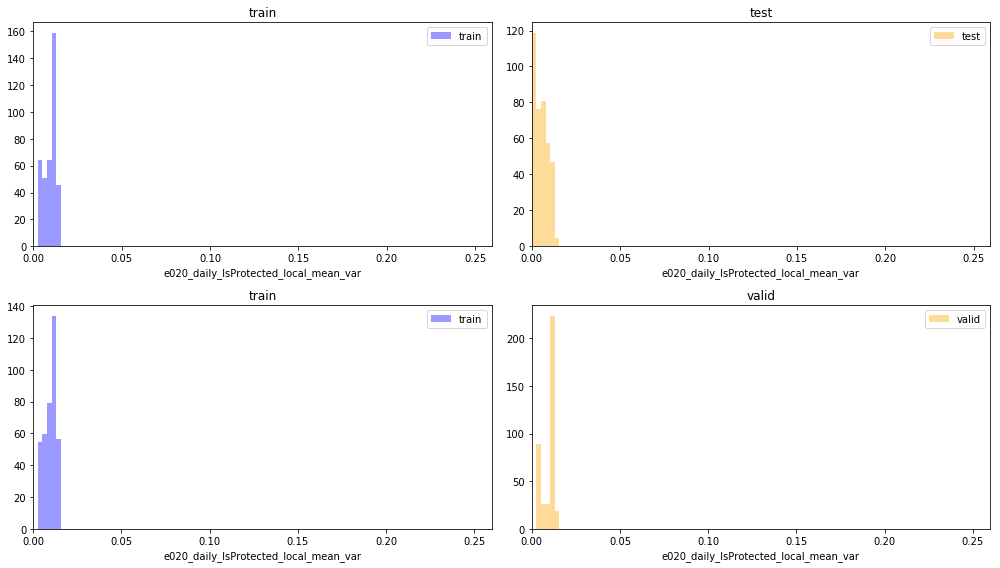

========== e020_daily_Census_IsPortableOperatingSystem_local_mean_var ===========
(8918336, 180), (1250116, 180)


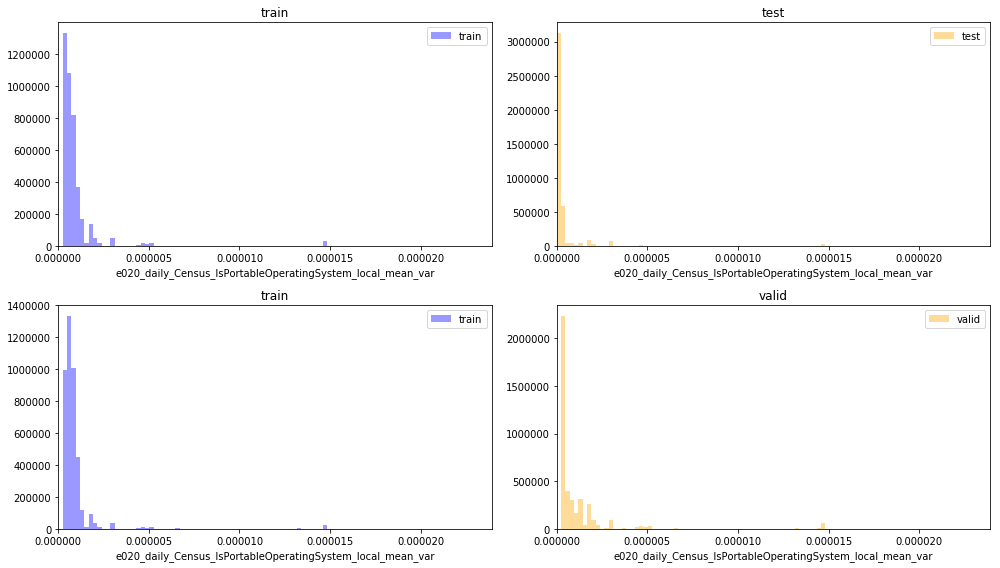

========== e020_daily_Census_IsWIMBootEnabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


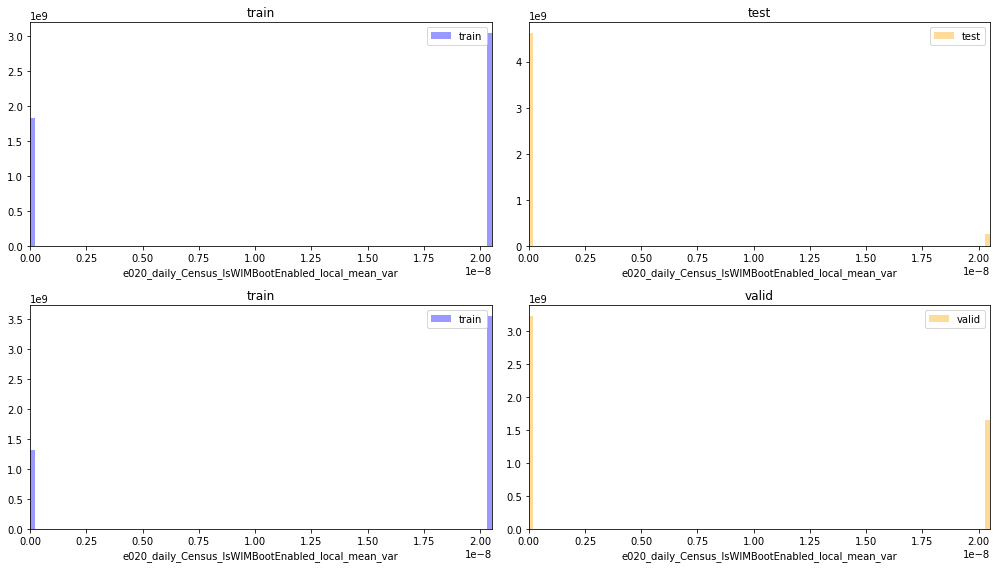

========== e020_daily_AutoSampleOptIn_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


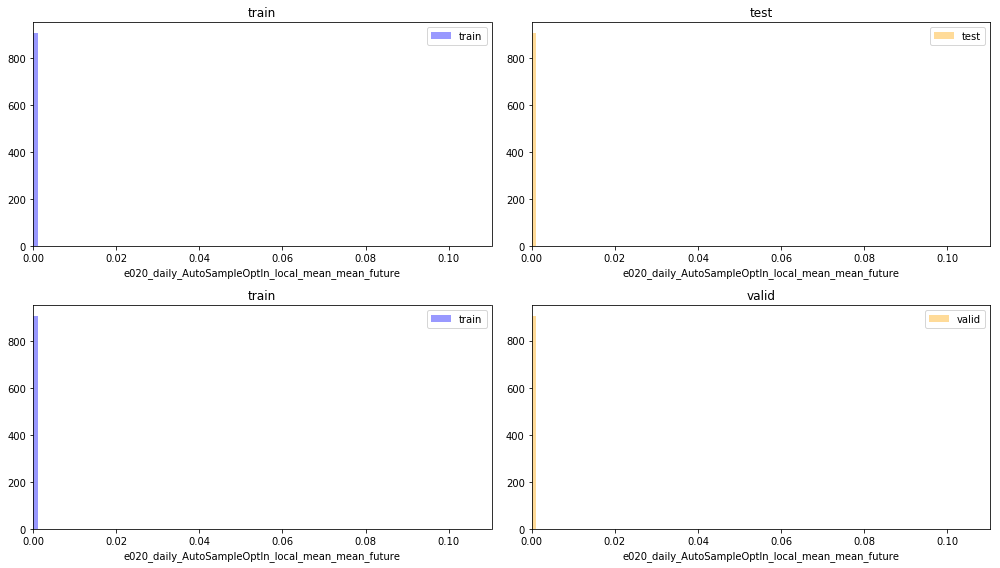

========== e020_daily_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


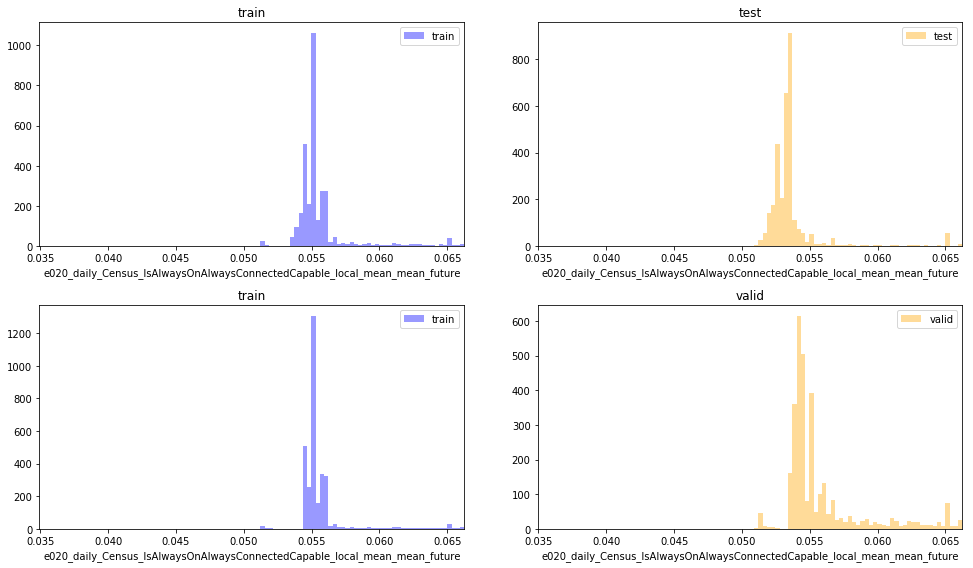

========== e020_hourly_AutoSampleOptIn_local_mean_mean ===========
(8918336, 180), (1250116, 180)


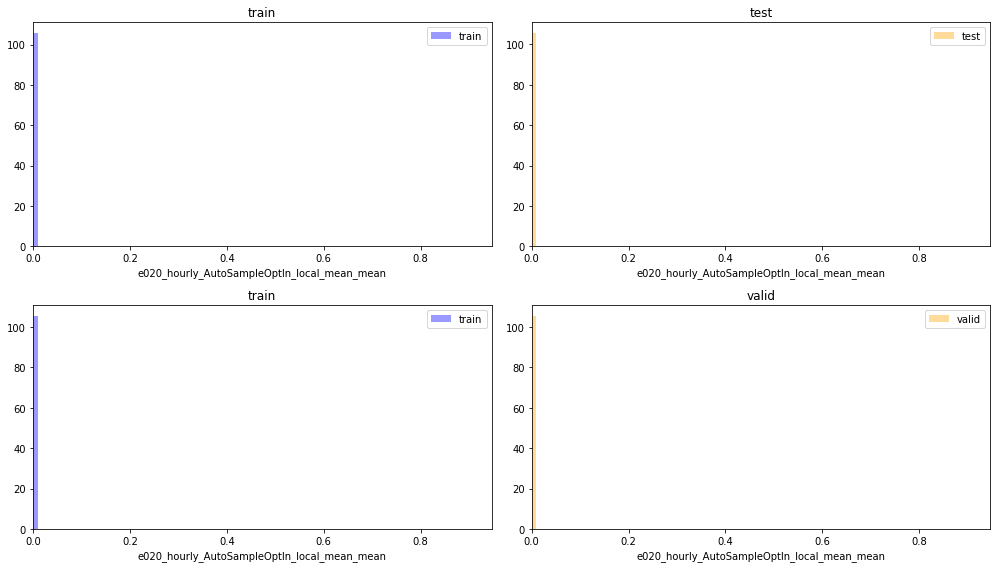

========== e020_hourly_HasTpm_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


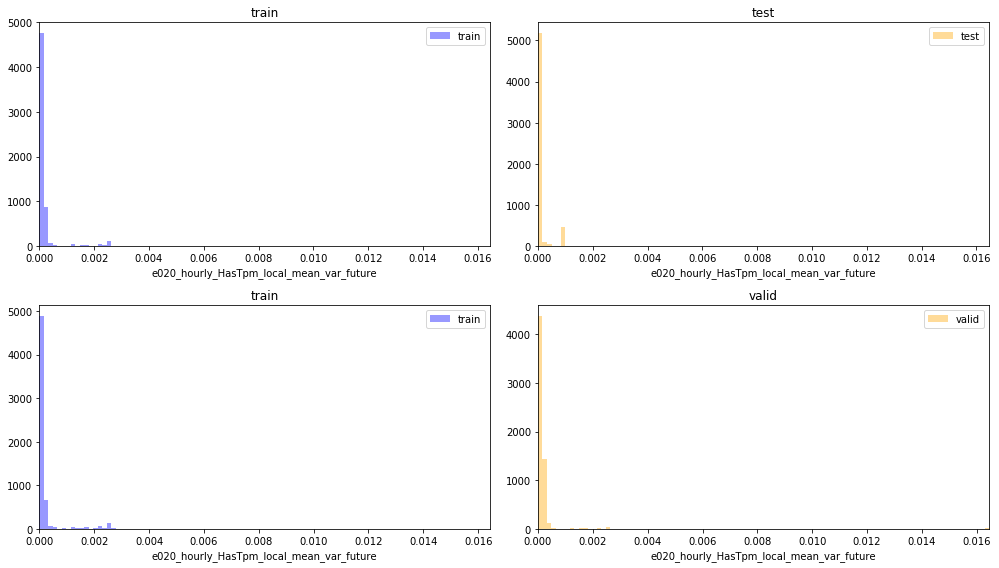

========== e020_daily_AutoSampleOptIn_local_mean_var ===========
(8918336, 180), (1250116, 180)


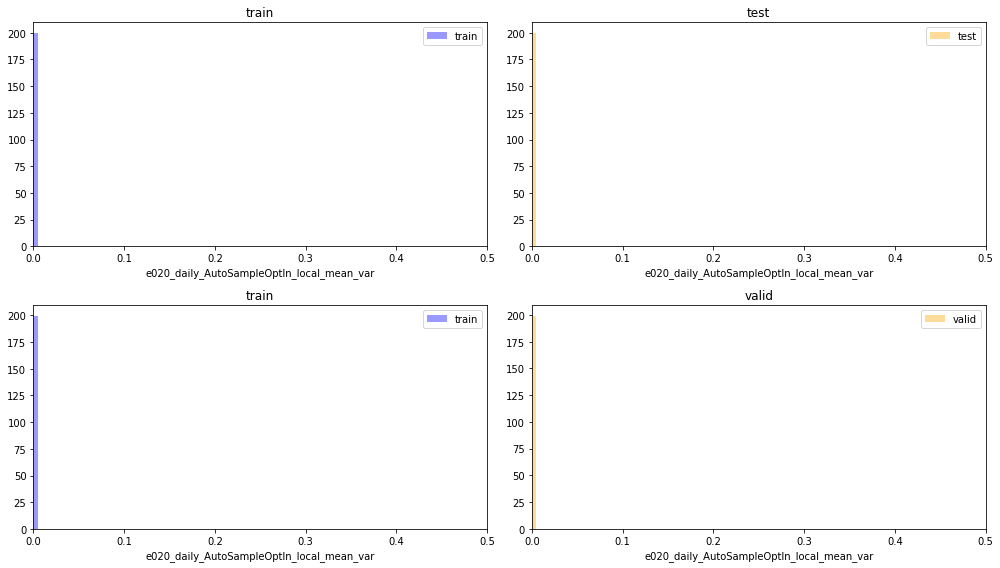

========== e020_hourly_Census_ThresholdOptIn_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


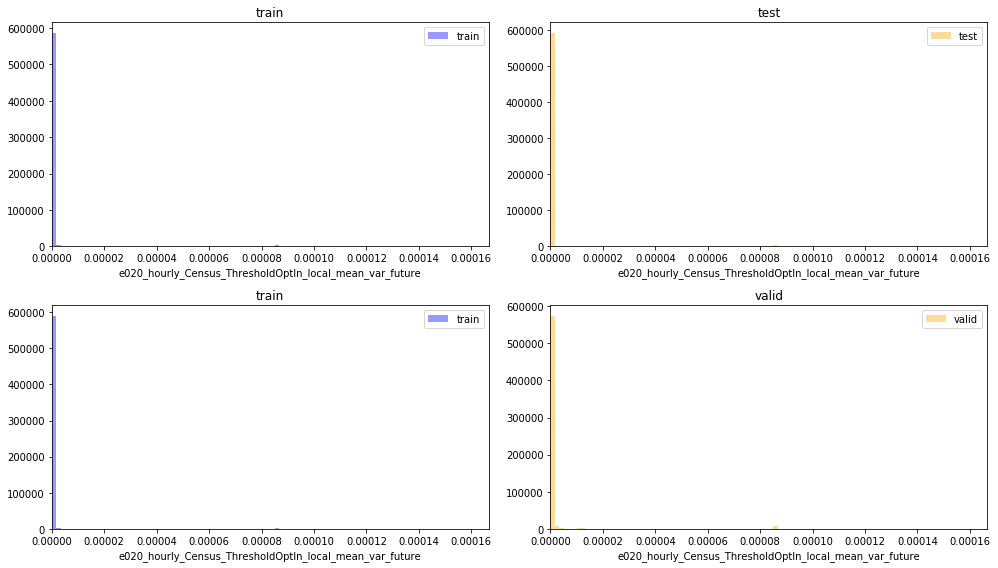

========== e020_daily_Census_IsFlightingInternal_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


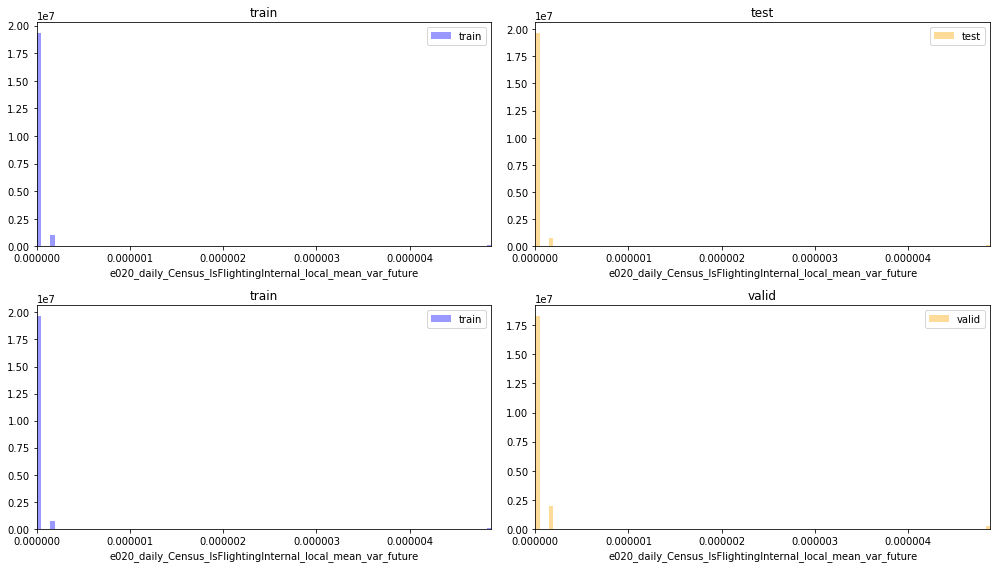

========== e020_hourly_AutoSampleOptIn_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


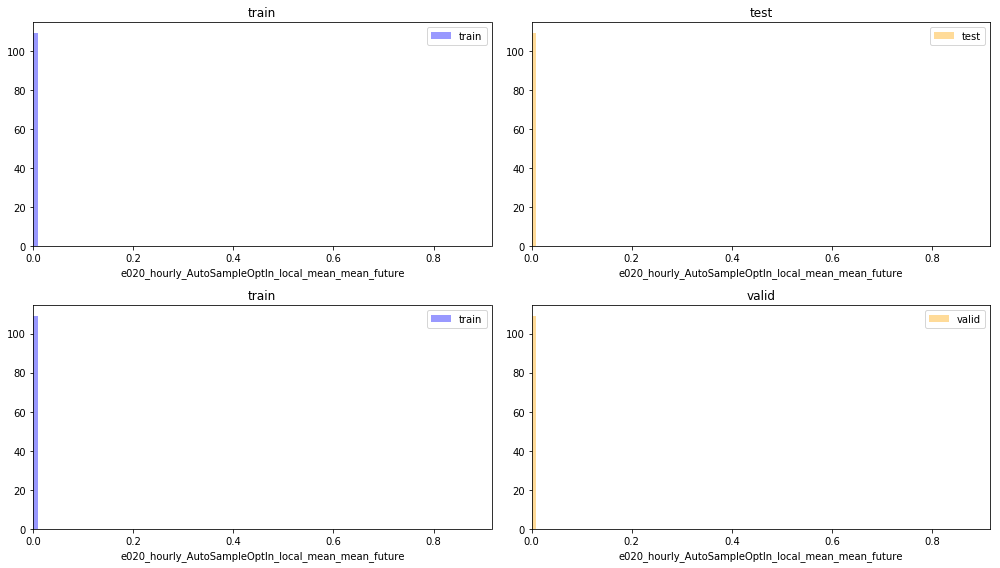

========== e020_hourly_HasTpm_local_mean_var ===========
(8918336, 180), (1250116, 180)


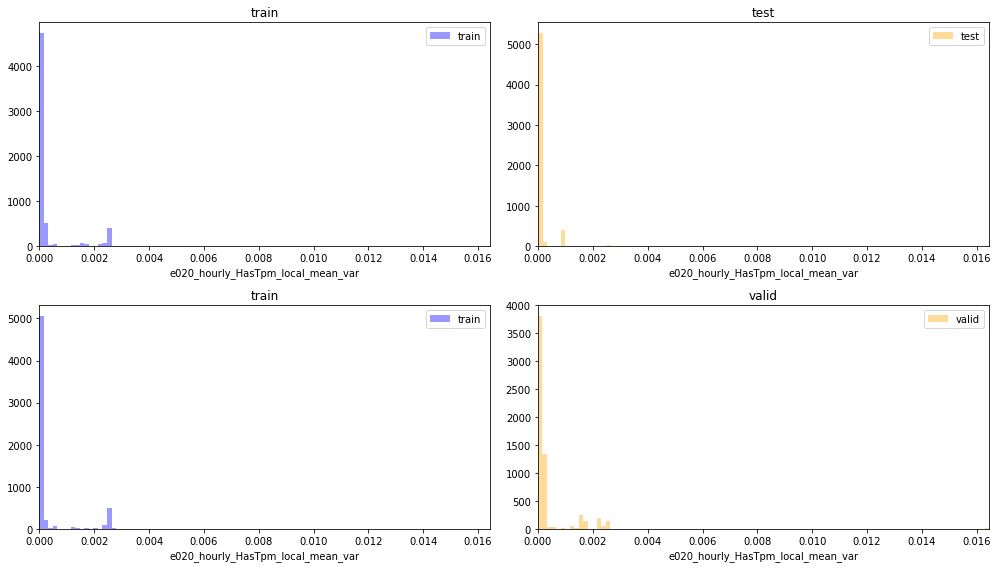

========== e020_daily_IsProtected_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


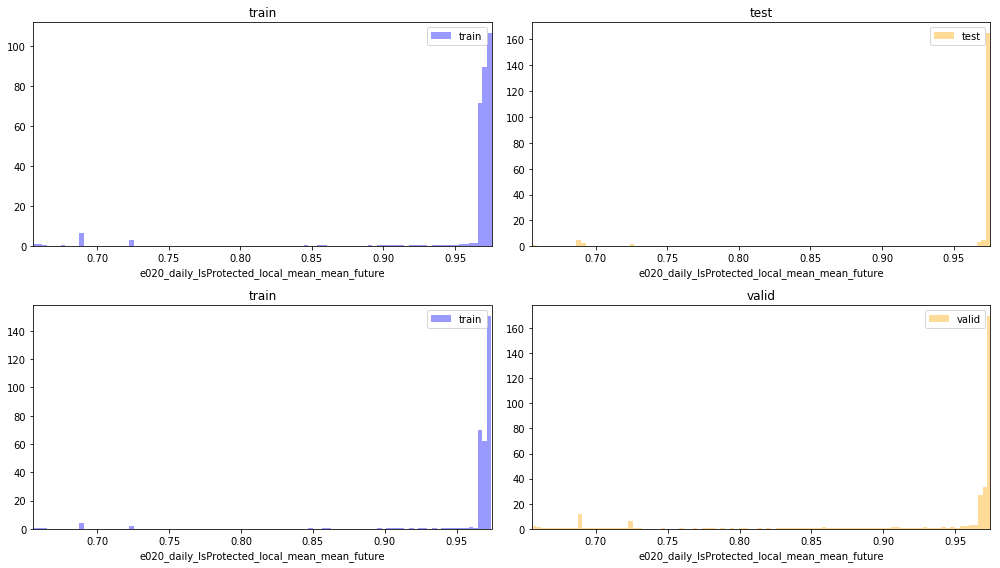

========== e020_hourly_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_var ===========
(8918336, 180), (1250116, 180)


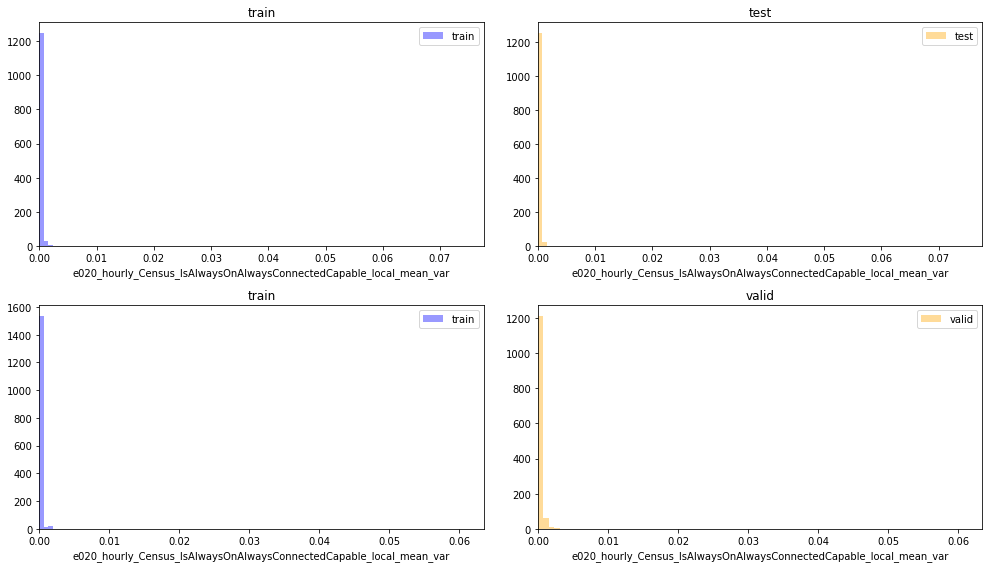

========== e020_hourly_Census_IsSecureBootEnabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


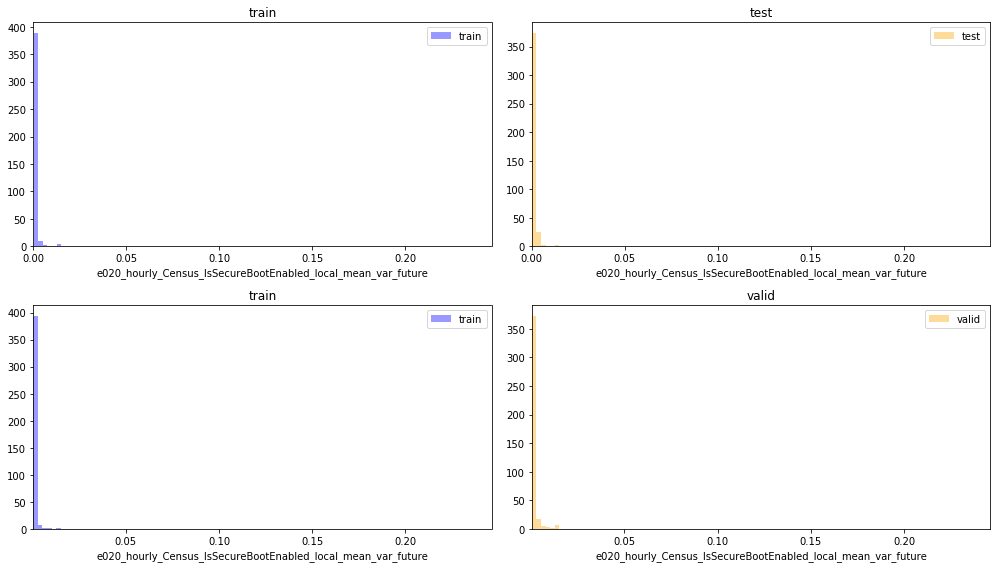

========== e020_hourly_Census_HasOpticalDiskDrive_local_mean_var ===========
(8918336, 180), (1250116, 180)


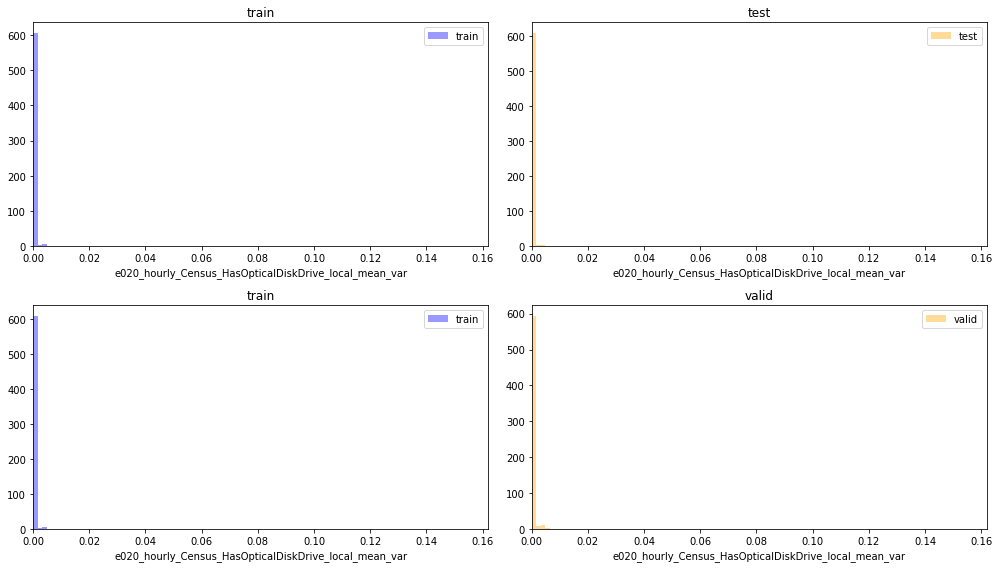

========== e020_hourly_IsSxsPassiveMode_local_mean_var ===========
(8918336, 180), (1250116, 180)


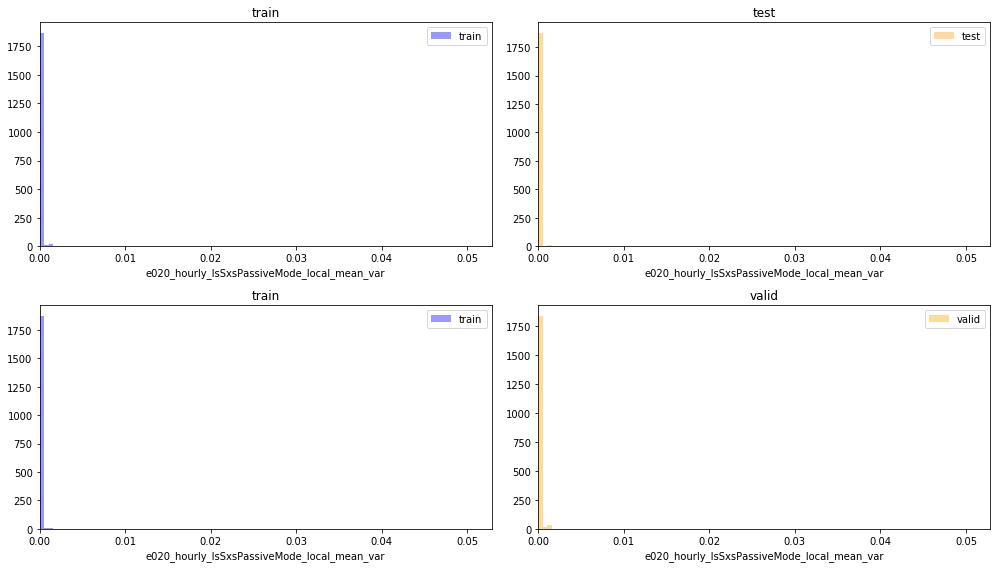

========== e020_hourly_HasDetections_local_mean_var ===========
(8918336, 180), (1250116, 180)


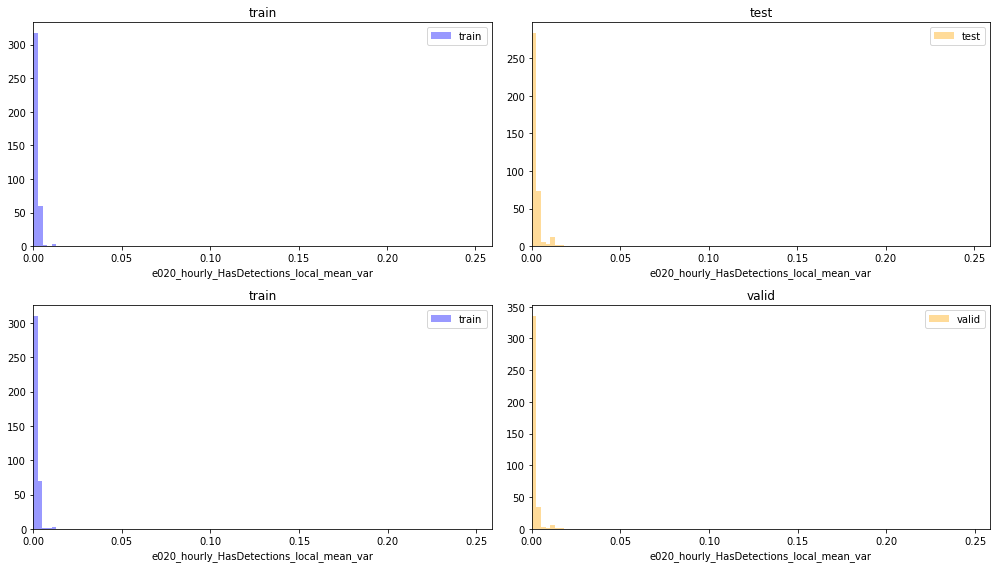

========== e020_hourly_Census_IsPenCapable_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


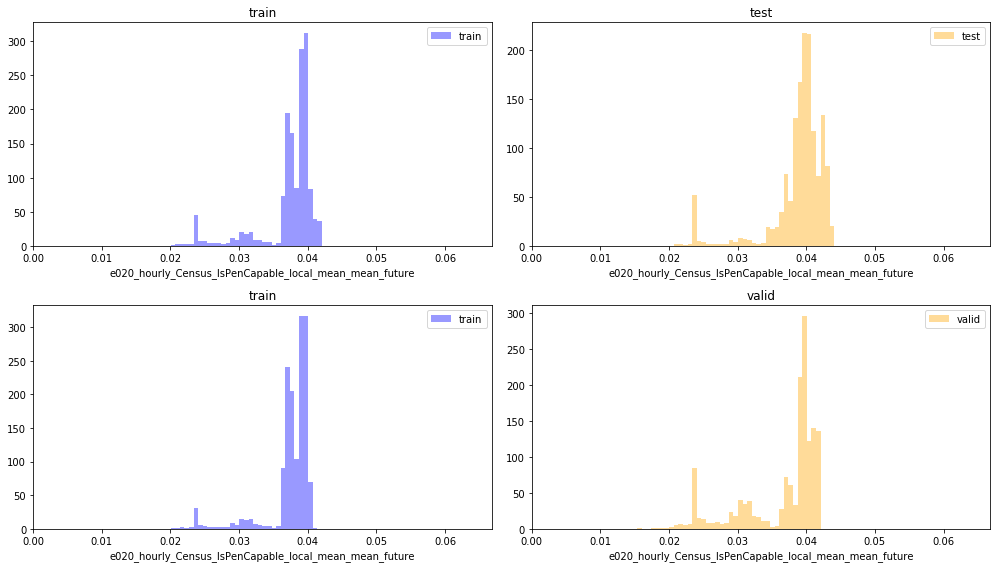

========== e020_daily_Census_IsVirtualDevice_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


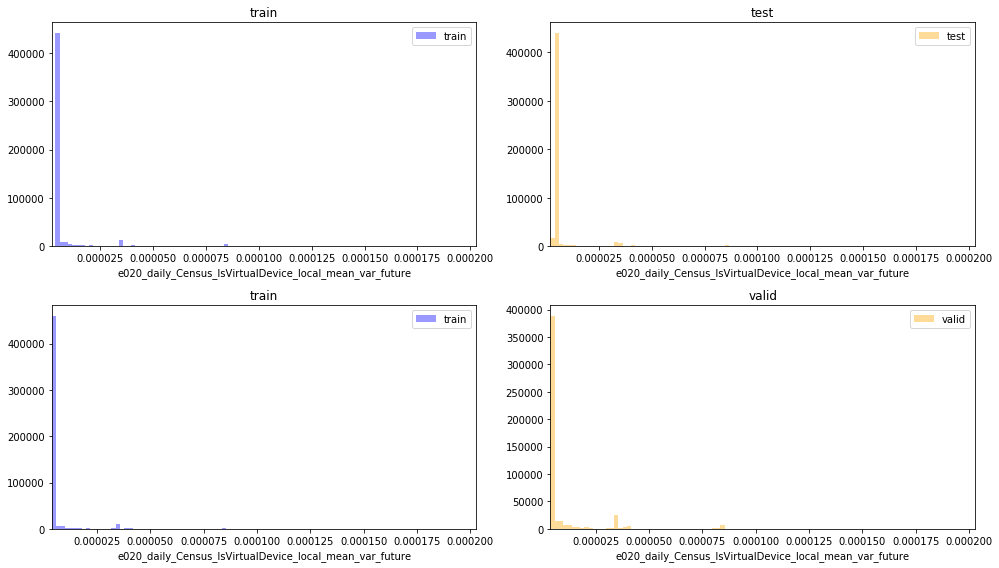

========== e020_hourly_Census_IsWIMBootEnabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


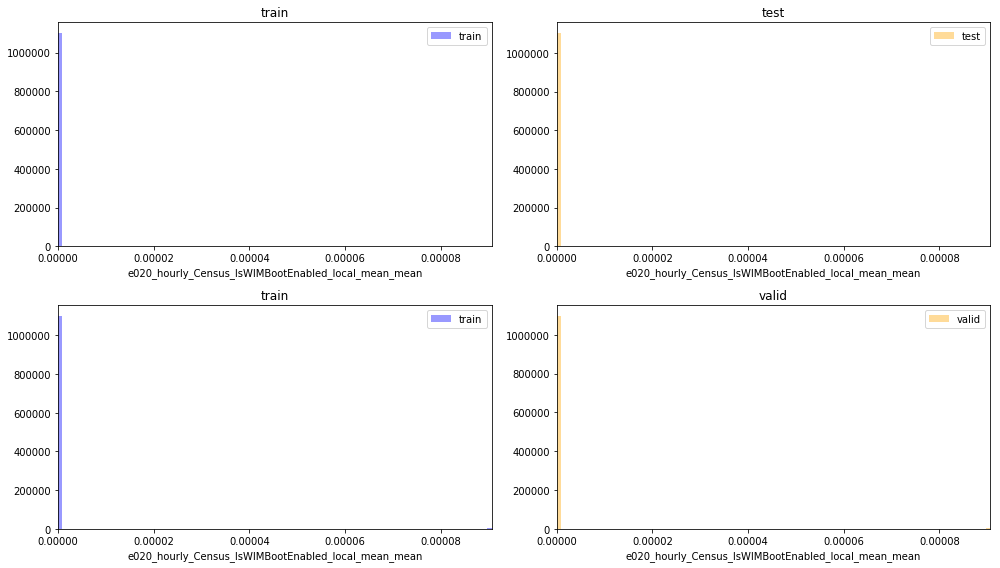

========== e020_daily_HasTpm_local_mean_mean ===========
(8918336, 180), (1250116, 180)


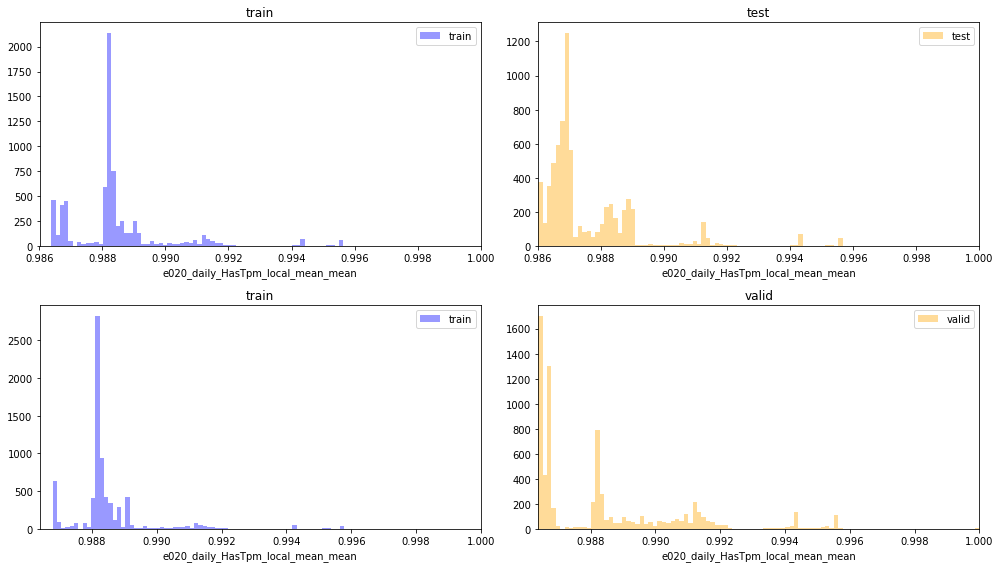

========== e020_daily_Census_IsVirtualDevice_local_mean_var ===========
(8918336, 180), (1250116, 180)


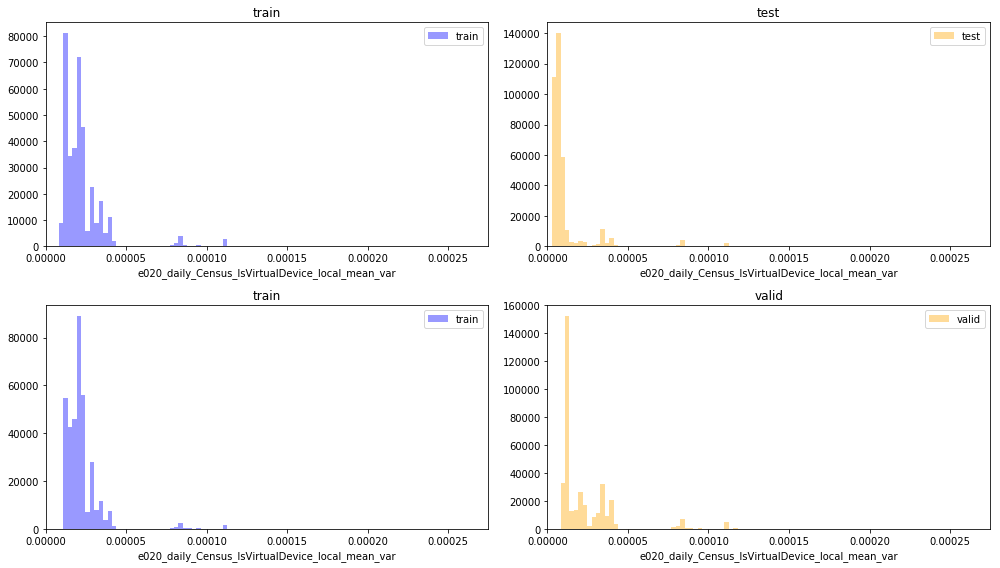

========== e020_hourly_Wdft_IsGamer_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


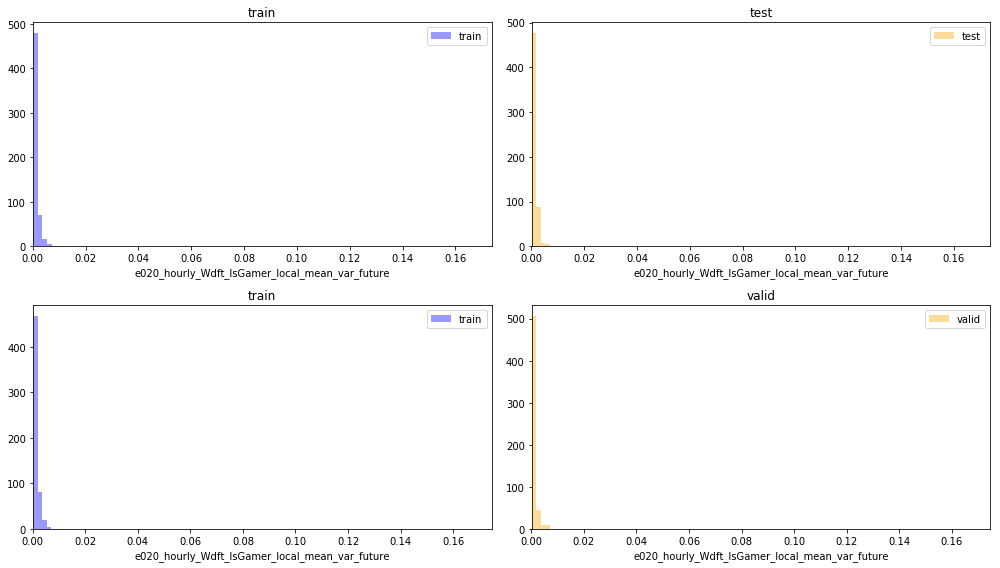

========== e020_daily_IsBeta_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


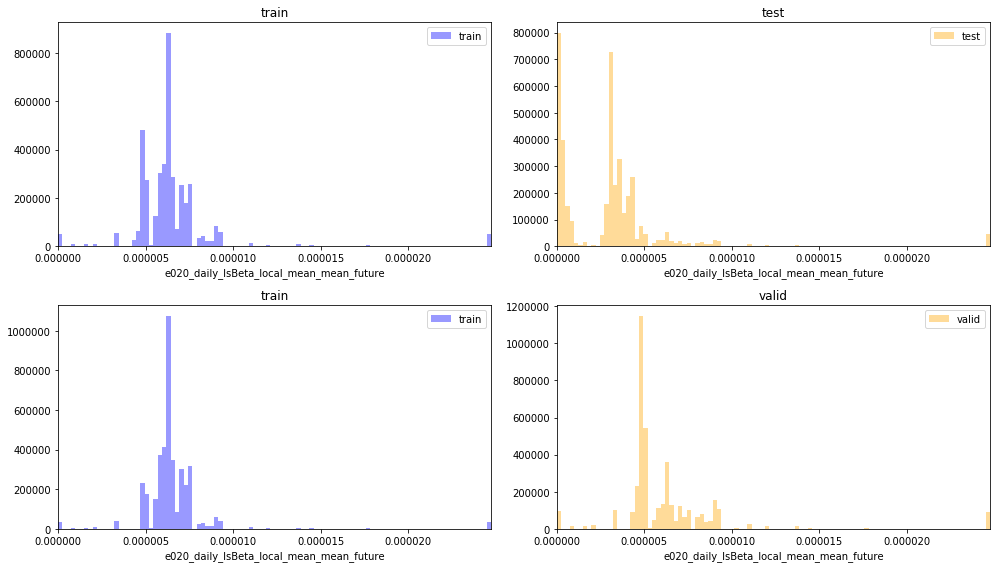

========== e020_hourly_Census_IsPortableOperatingSystem_local_mean_var ===========
(8918336, 180), (1250116, 180)


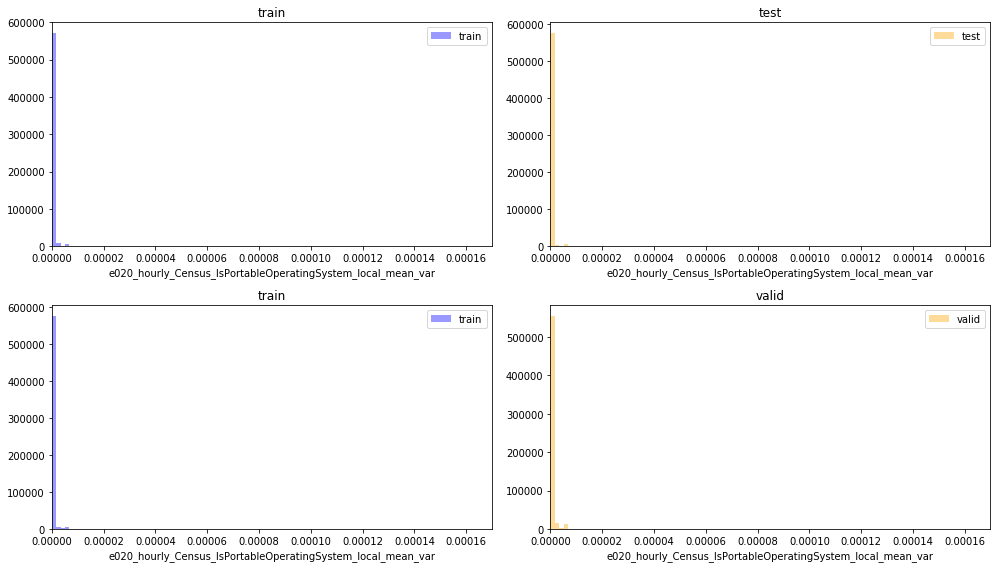

========== e020_hourly_Census_IsWIMBootEnabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


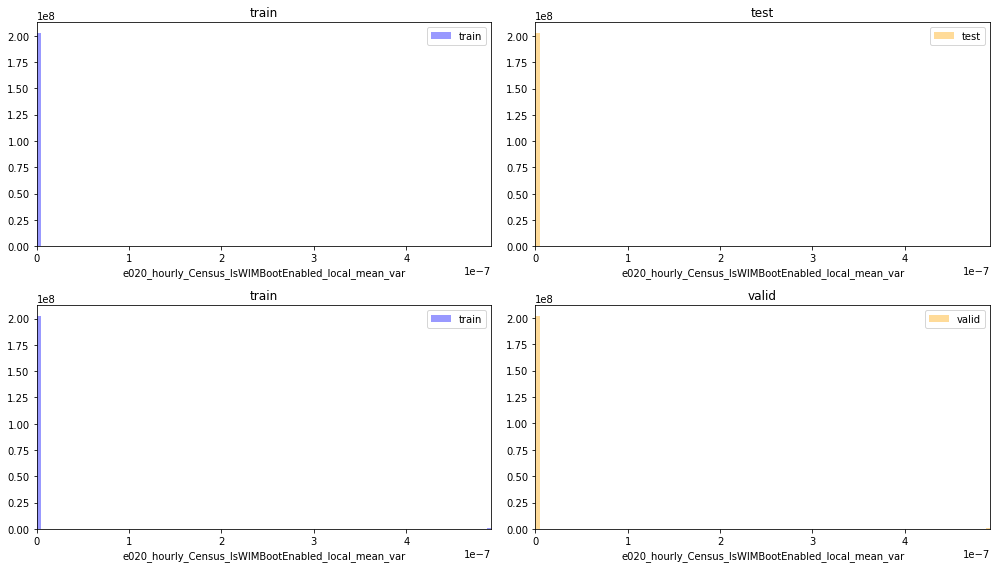

========== e020_daily_Firewall_local_mean_mean ===========
(8918336, 180), (1250116, 180)


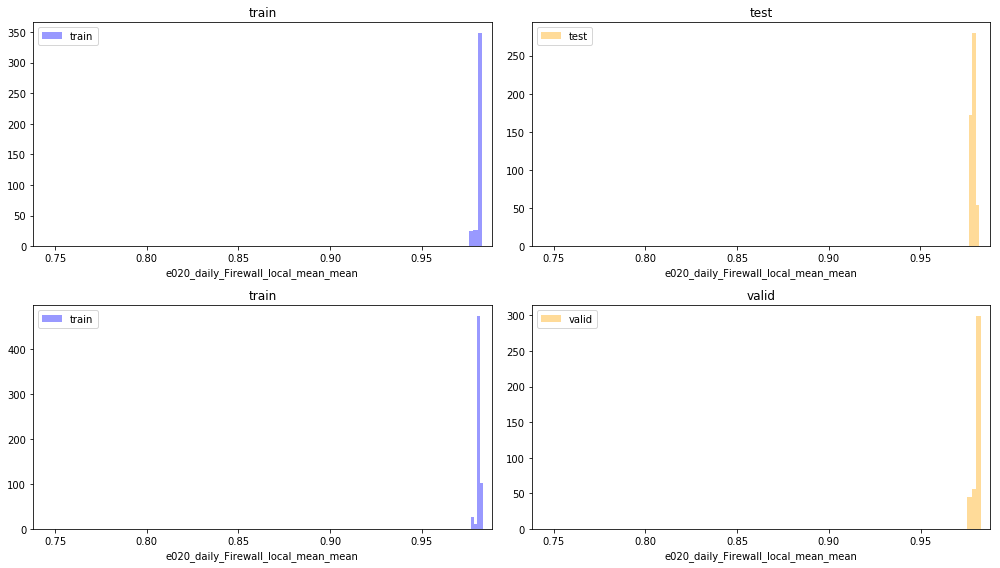

========== e020_daily_Census_IsFlightsDisabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


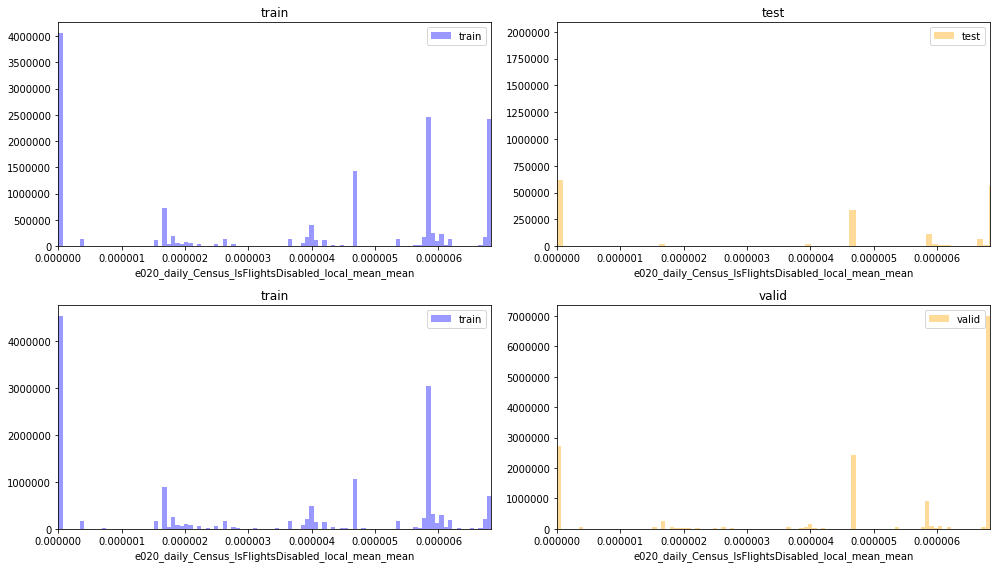

========== e020_Census_HasOpticalDiskDrive_local_mean ===========
(8918336, 180), (1250116, 180)


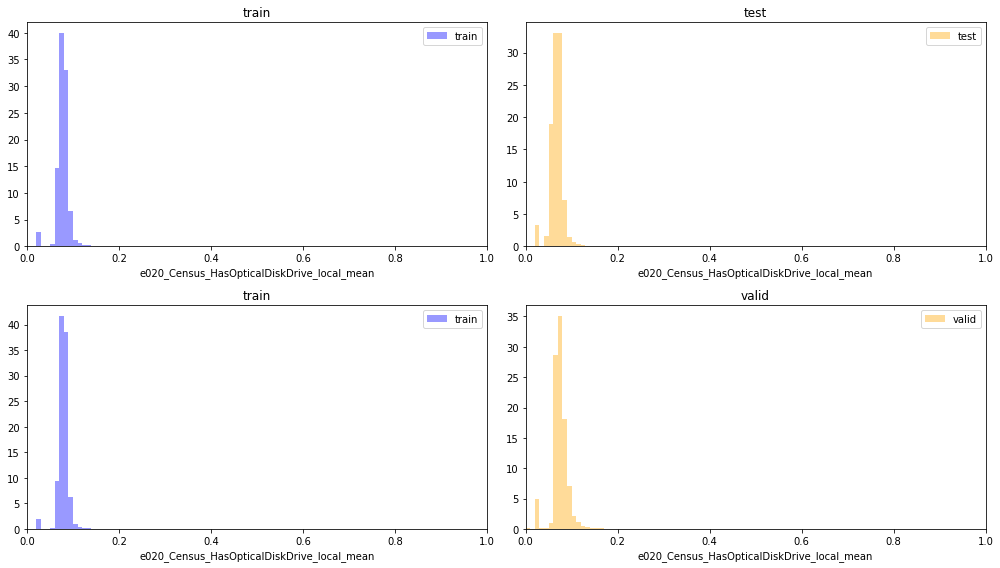

========== e020_daily_Census_IsWIMBootEnabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


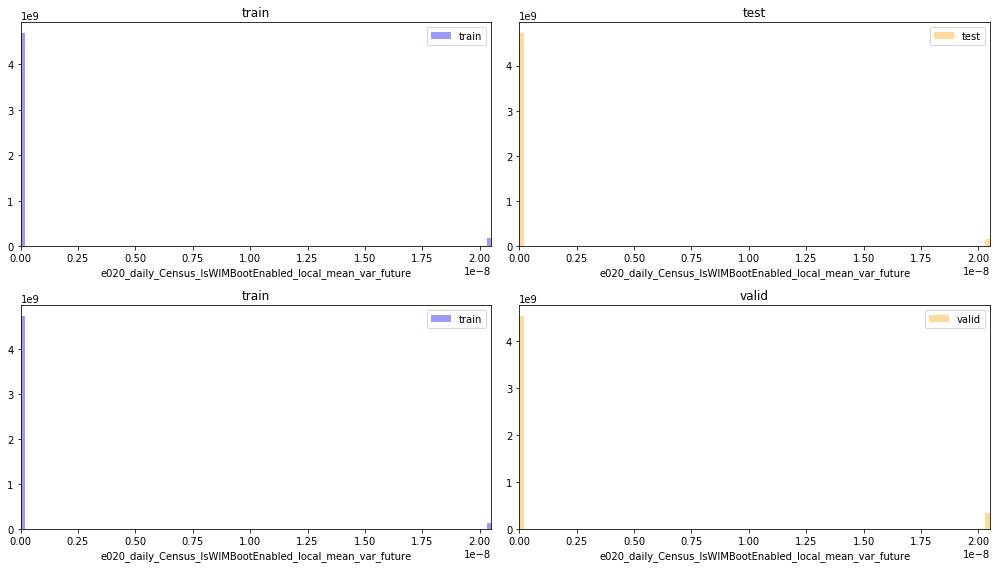

========== e020_daily_Census_IsSecureBootEnabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


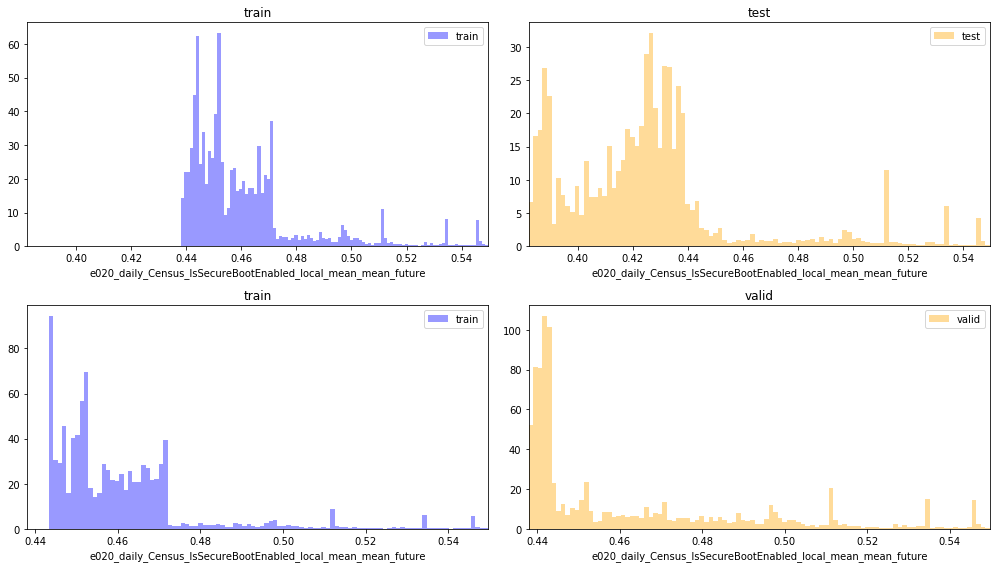

========== e020_hourly_IsBeta_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


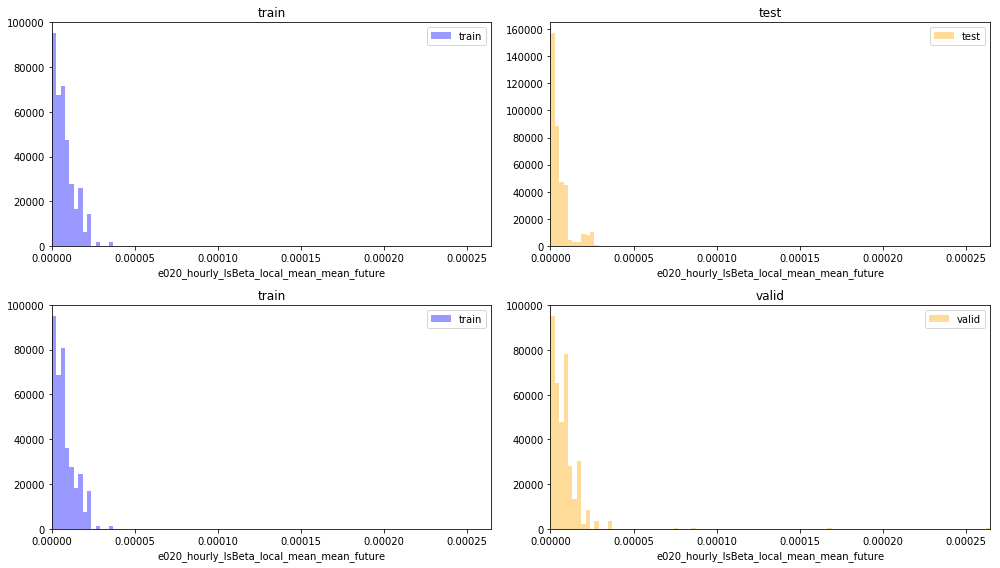

========== e020_daily_HasDetections_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


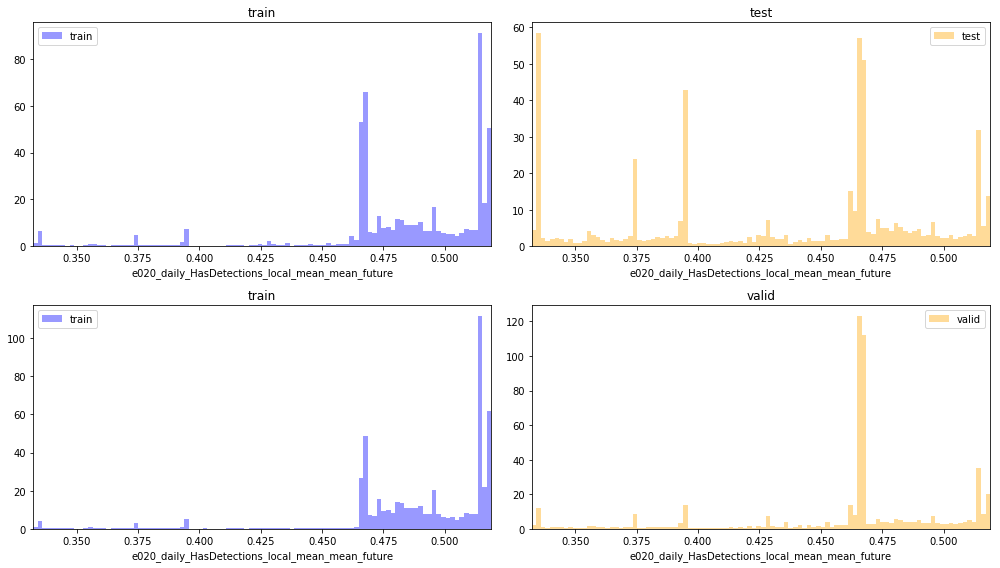

========== e020_hourly_HasTpm_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


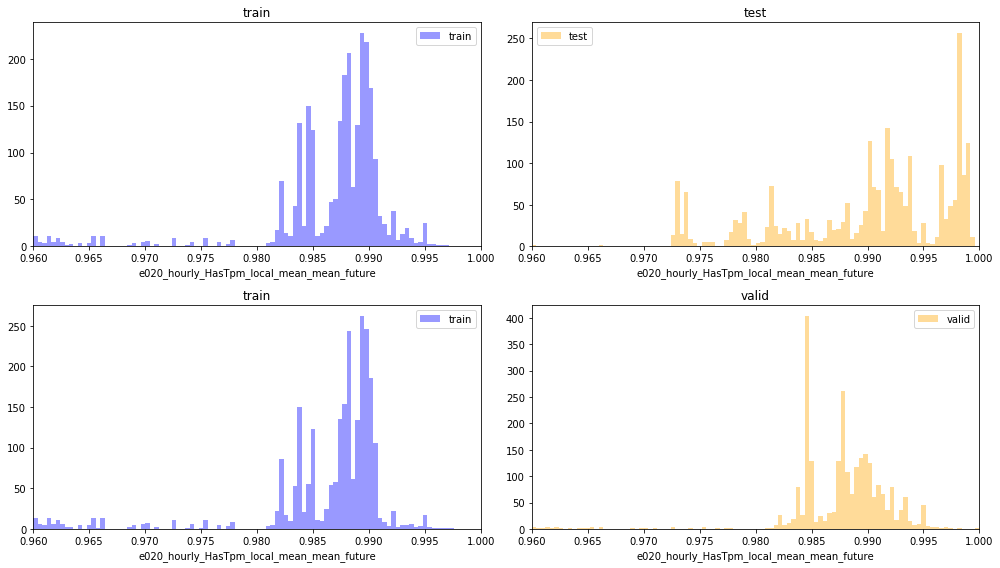

========== e020_hourly_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


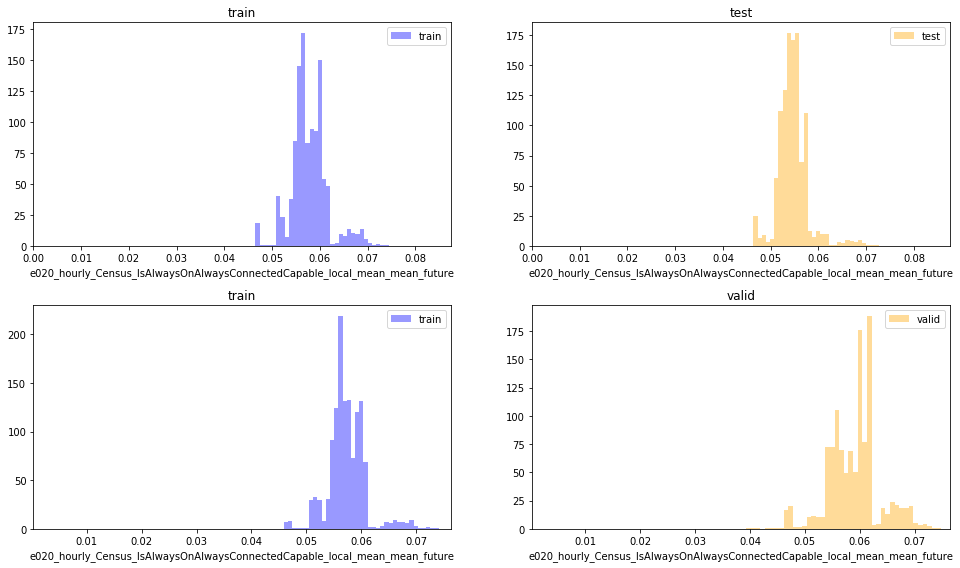

========== e020_hourly_IsBeta_local_mean_var ===========
(8918336, 180), (1250116, 180)


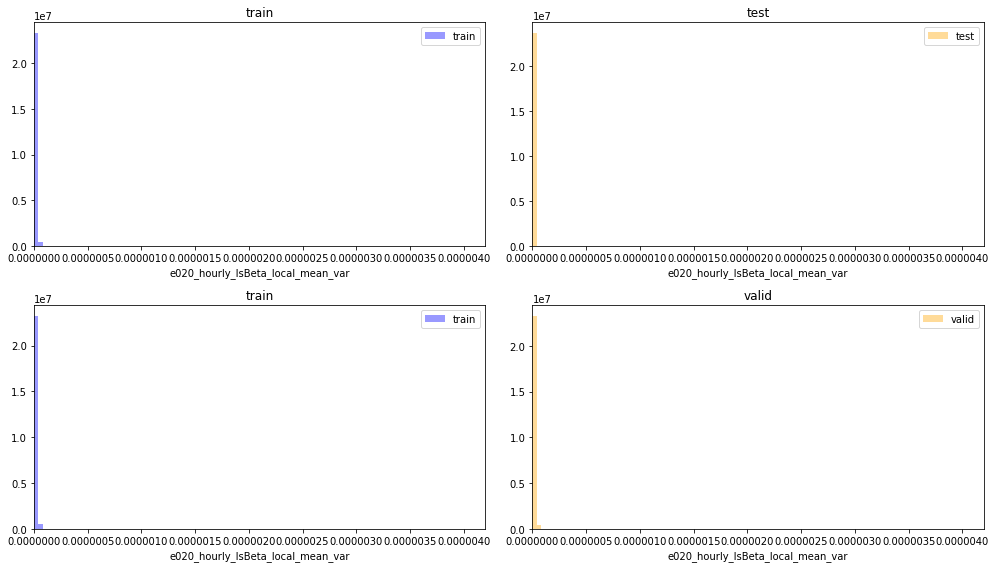

========== e020_hourly_Census_HasOpticalDiskDrive_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


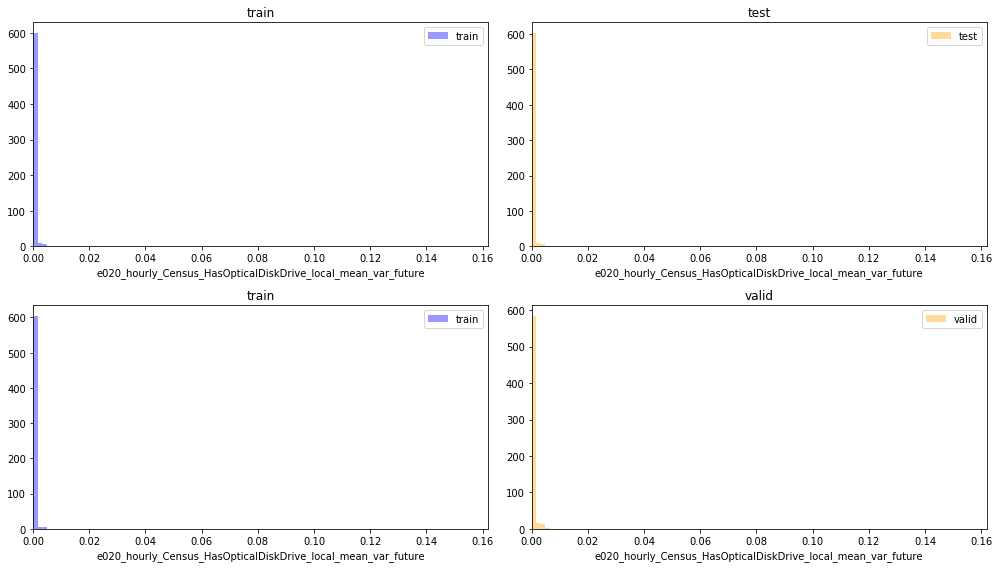

========== e020_daily_Census_IsTouchEnabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


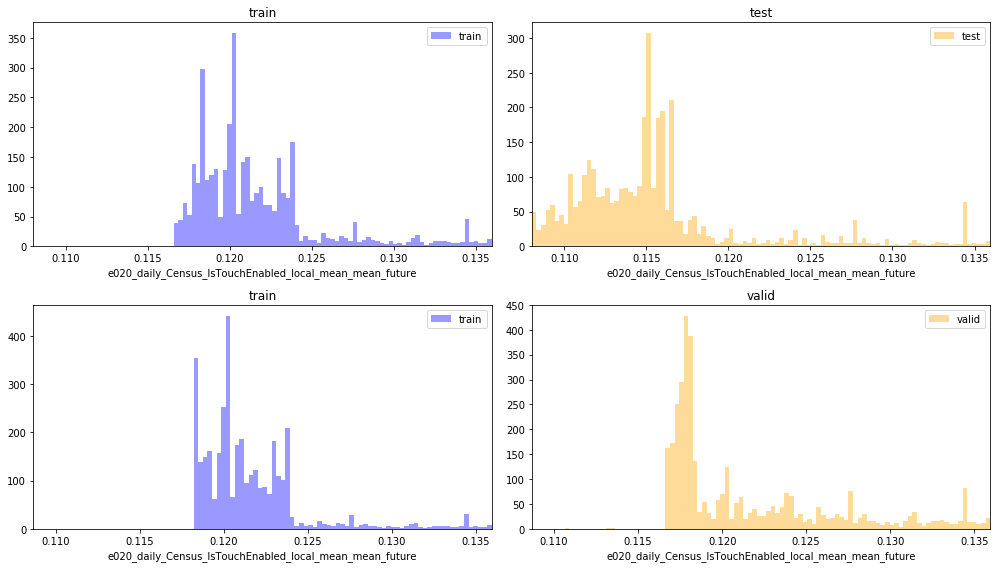

========== e020_hourly_HasTpm_local_mean_mean ===========
(8918336, 180), (1250116, 180)


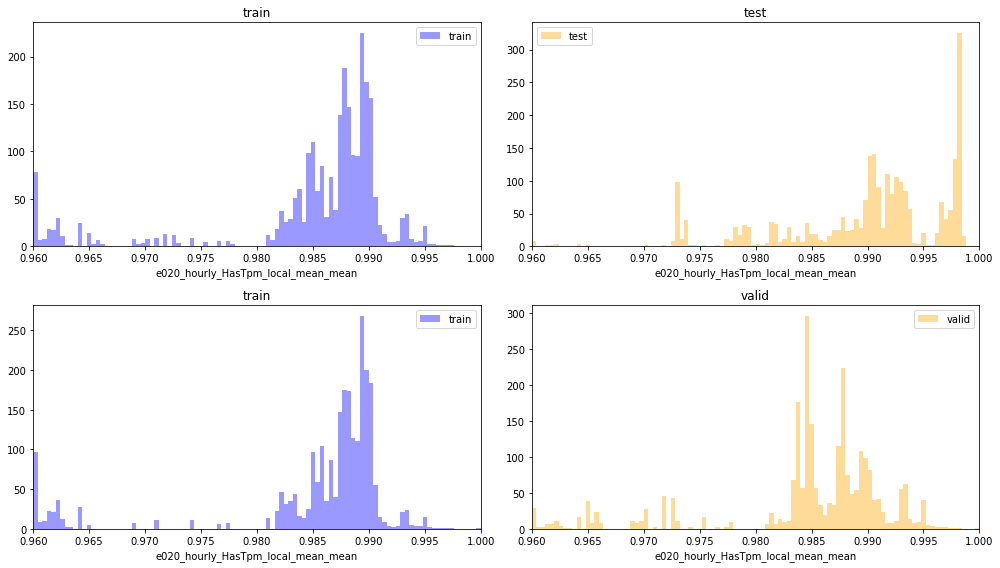

========== e020_daily_SMode_local_mean_mean ===========
(8918336, 180), (1250116, 180)


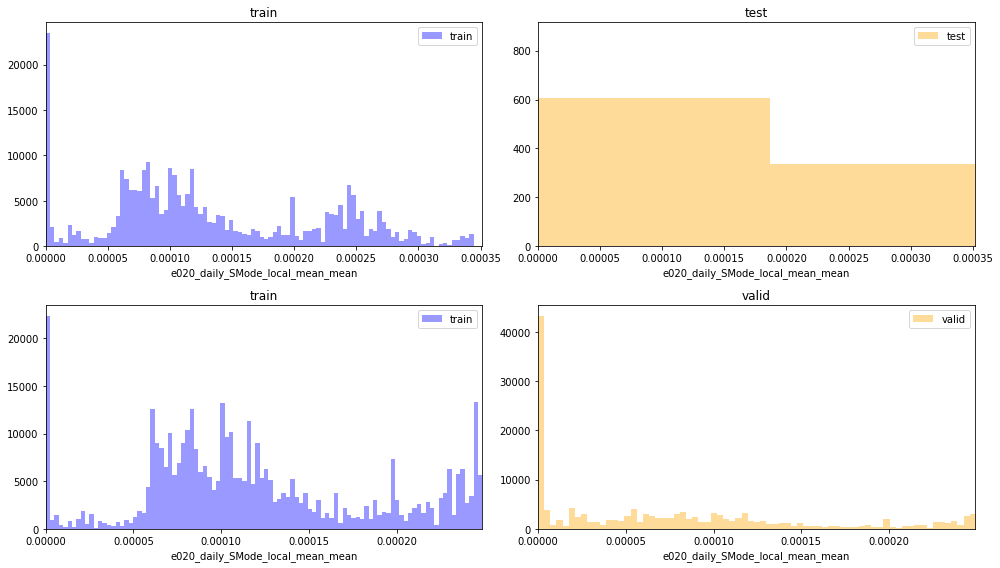

========== e020_hourly_Census_IsFlightsDisabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


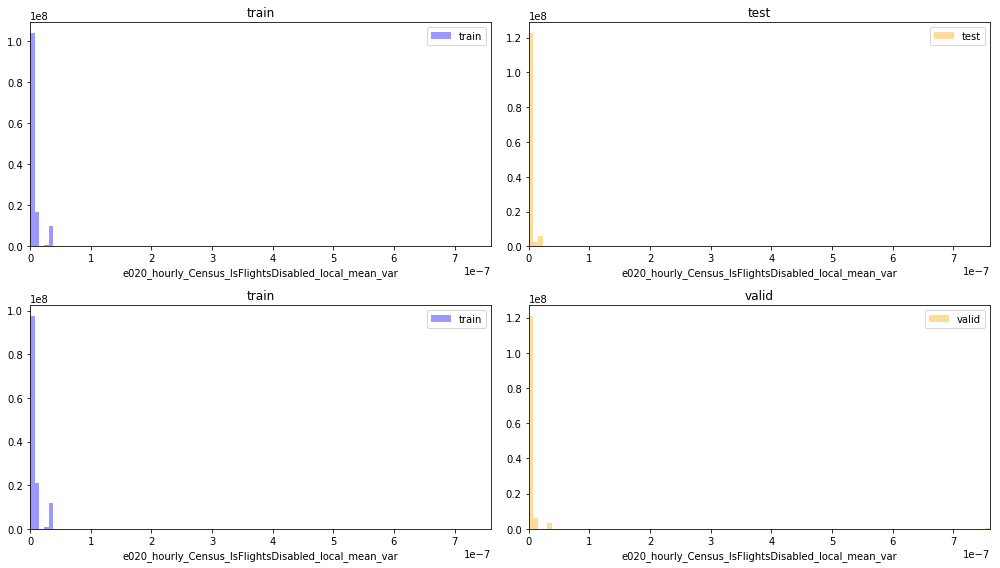

========== e020_hourly_AutoSampleOptIn_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


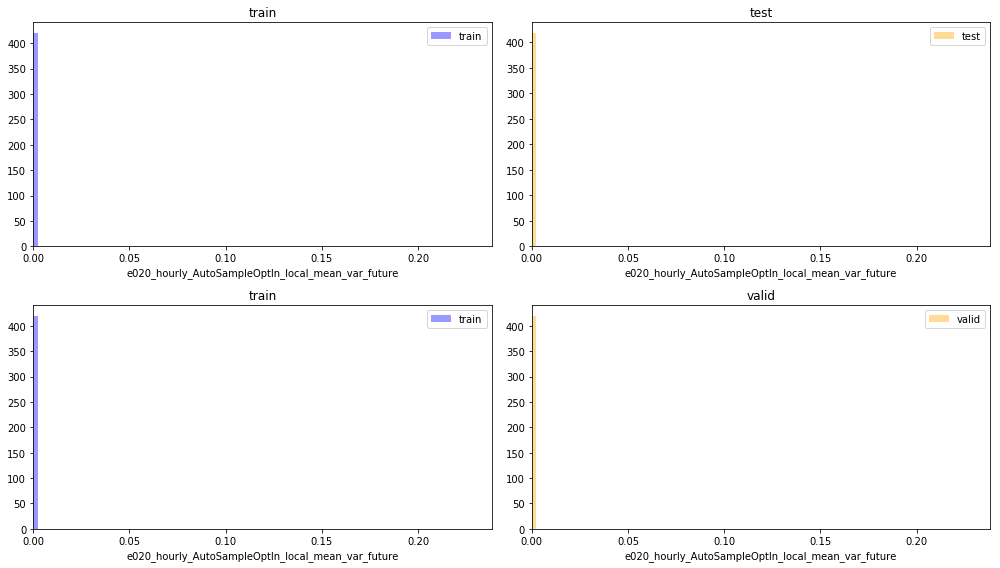

========== e020_daily_Census_IsVirtualDevice_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


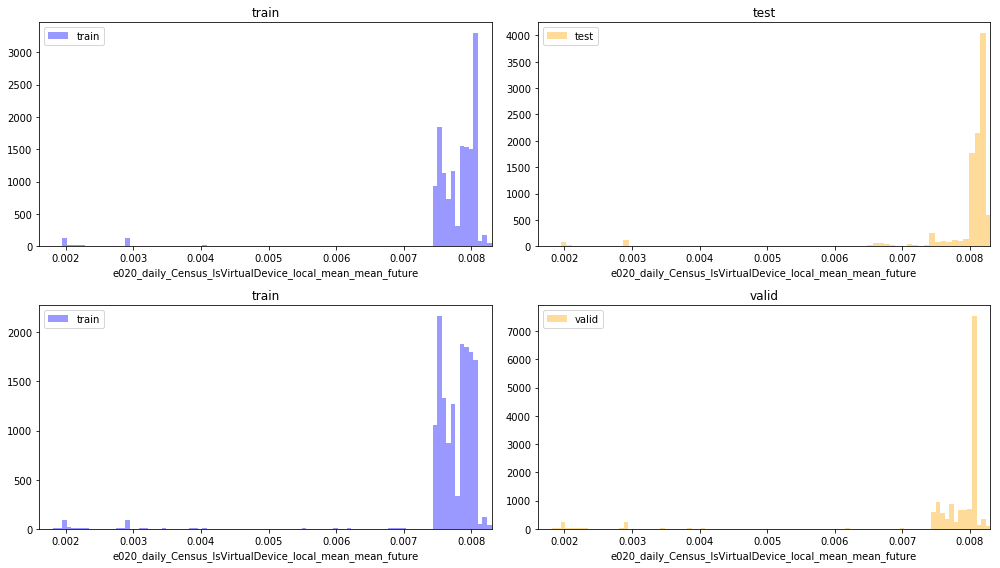

========== e020_hourly_Census_IsPortableOperatingSystem_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


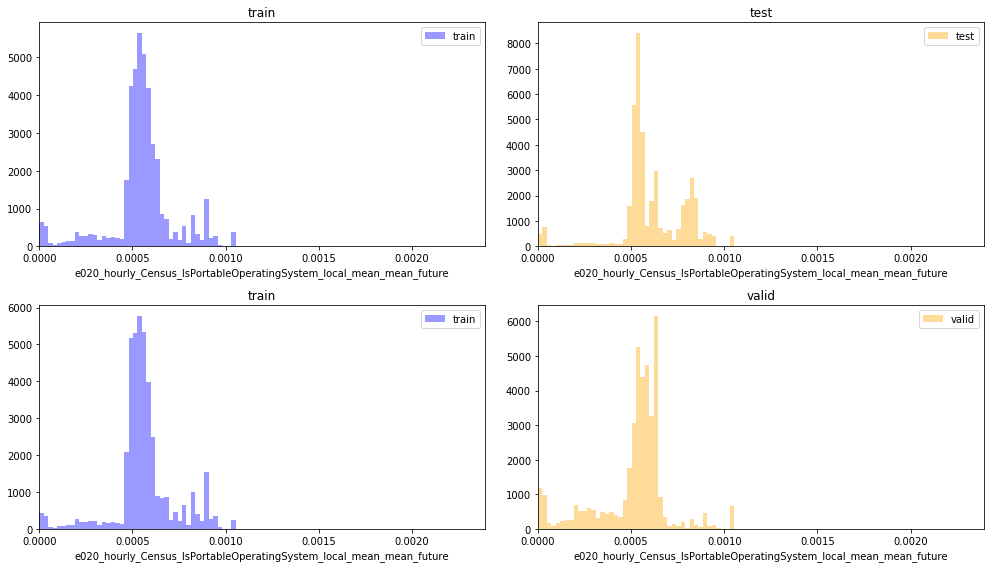

========== e020_daily_Wdft_IsGamer_local_mean_var ===========
(8918336, 180), (1250116, 180)


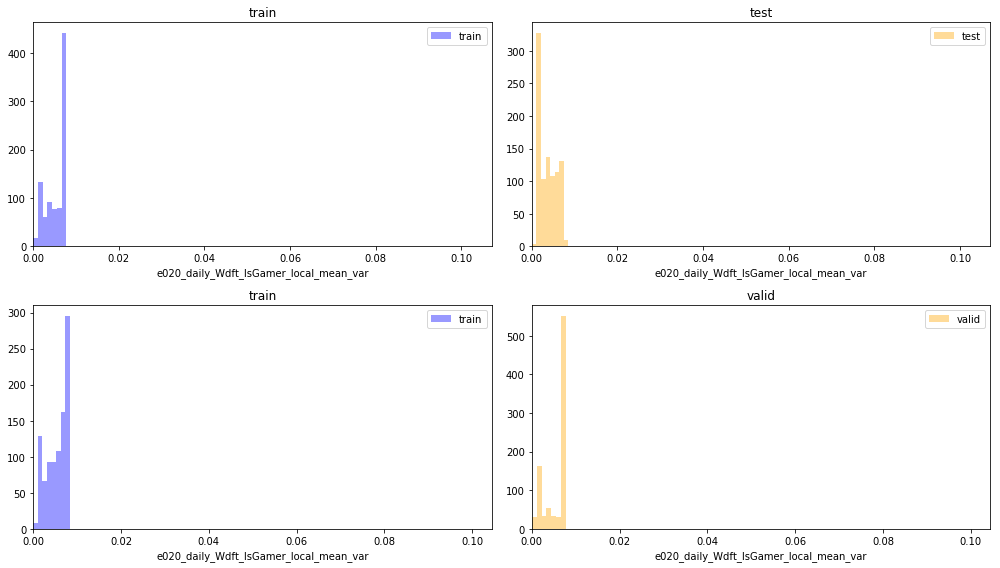

========== e020_hourly_Census_ThresholdOptIn_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


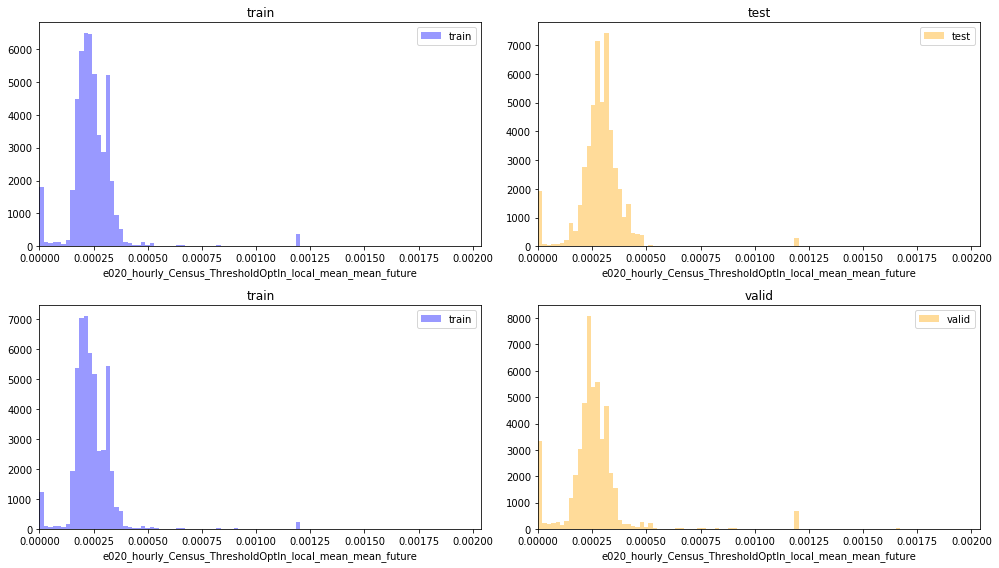

========== e020_hourly_SMode_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


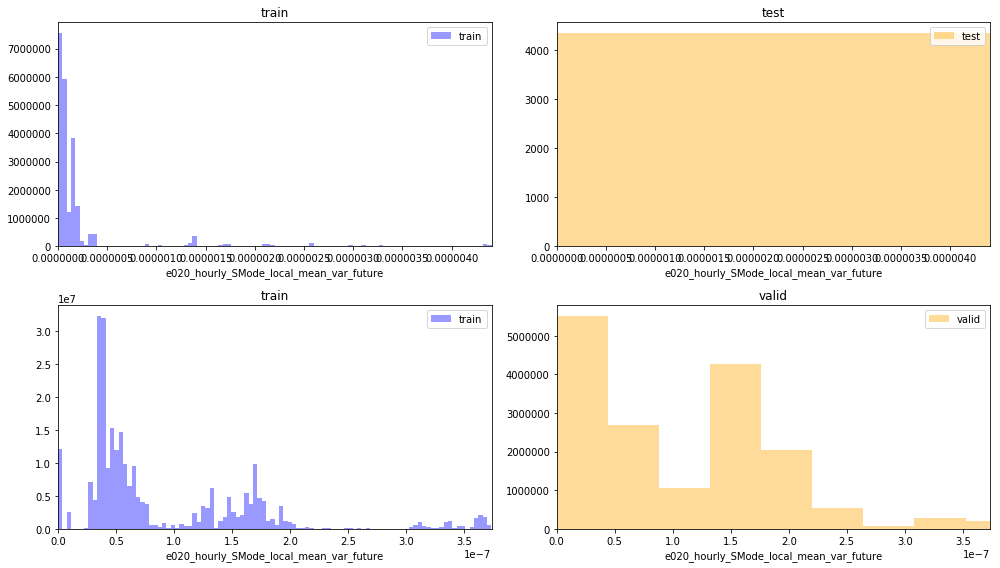

========== e020_hourly_Census_IsTouchEnabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


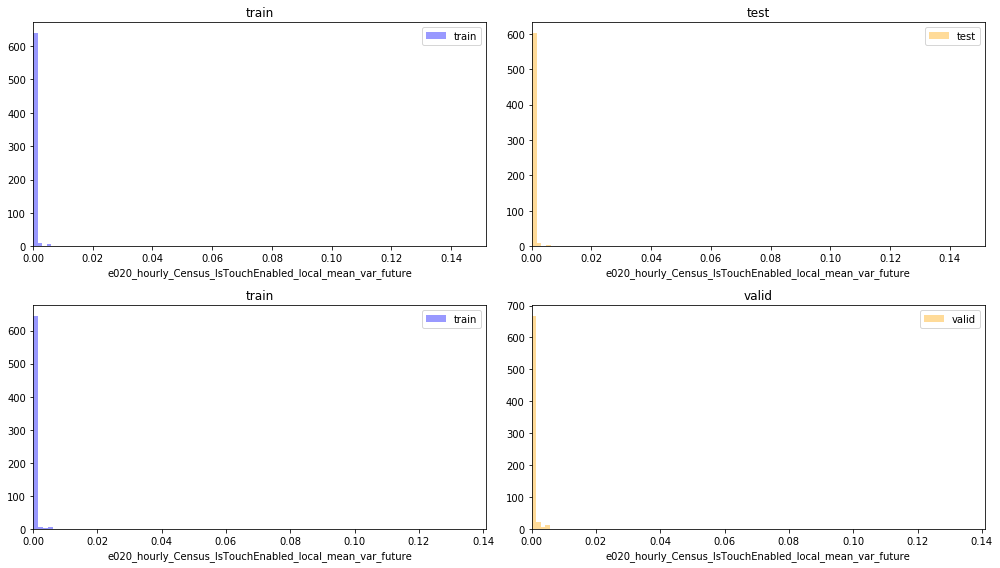

========== e020_daily_Census_IsPenCapable_local_mean_mean ===========
(8918336, 180), (1250116, 180)


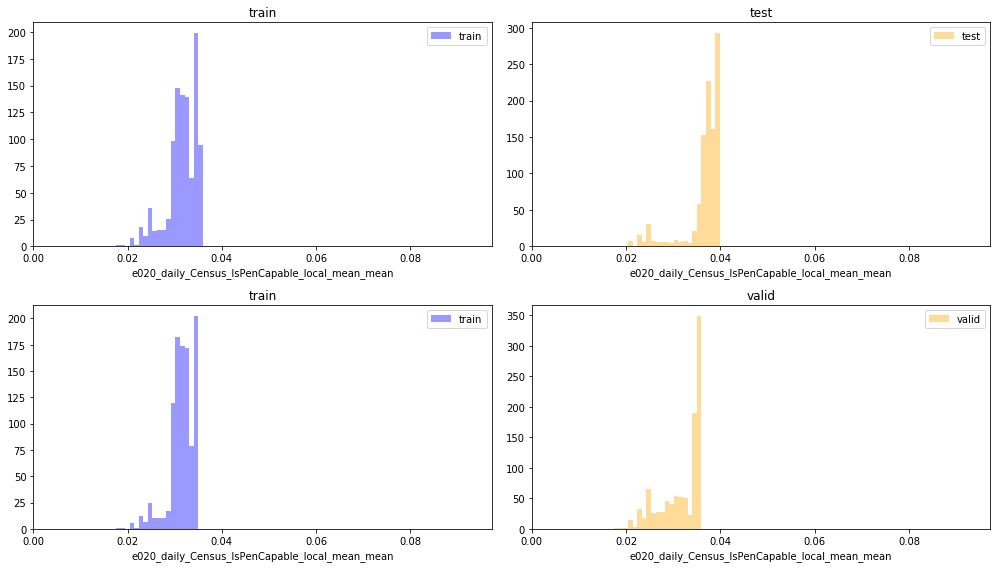

========== e020_hourly_Census_IsVirtualDevice_local_mean_var ===========
(8918336, 180), (1250116, 180)


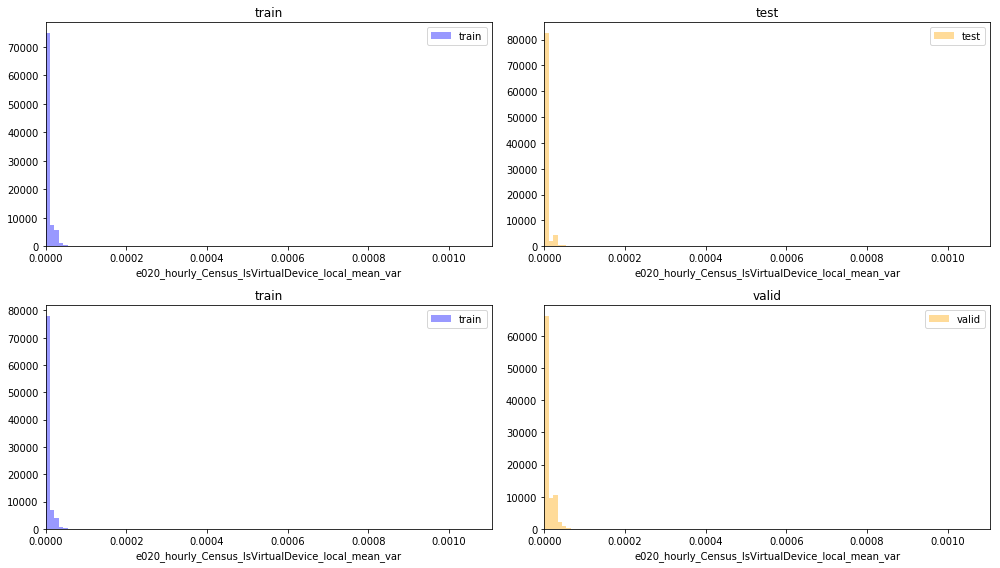

========== e020_hourly_SMode_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


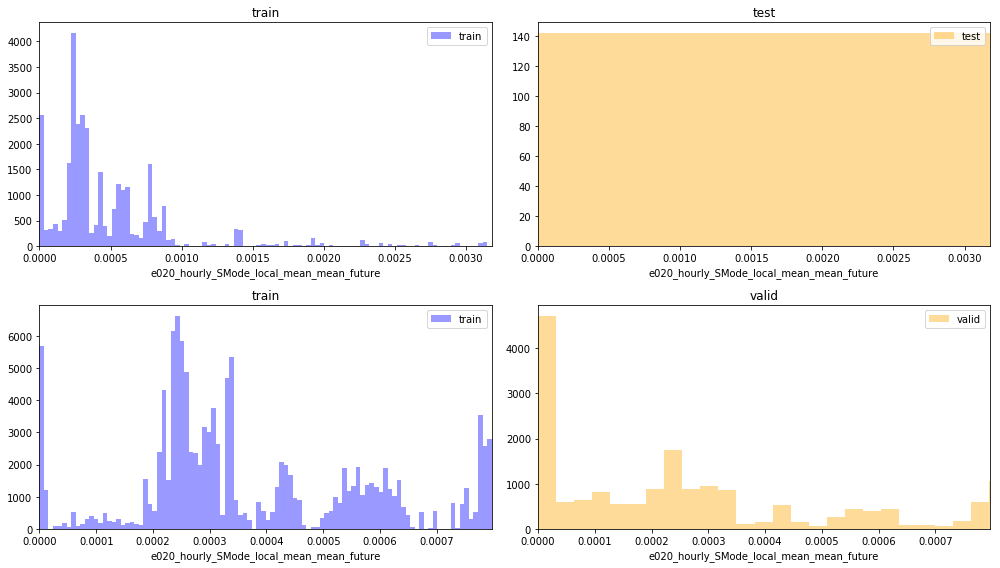

========== e020_hourly_Wdft_IsGamer_local_mean_mean ===========
(8918336, 180), (1250116, 180)


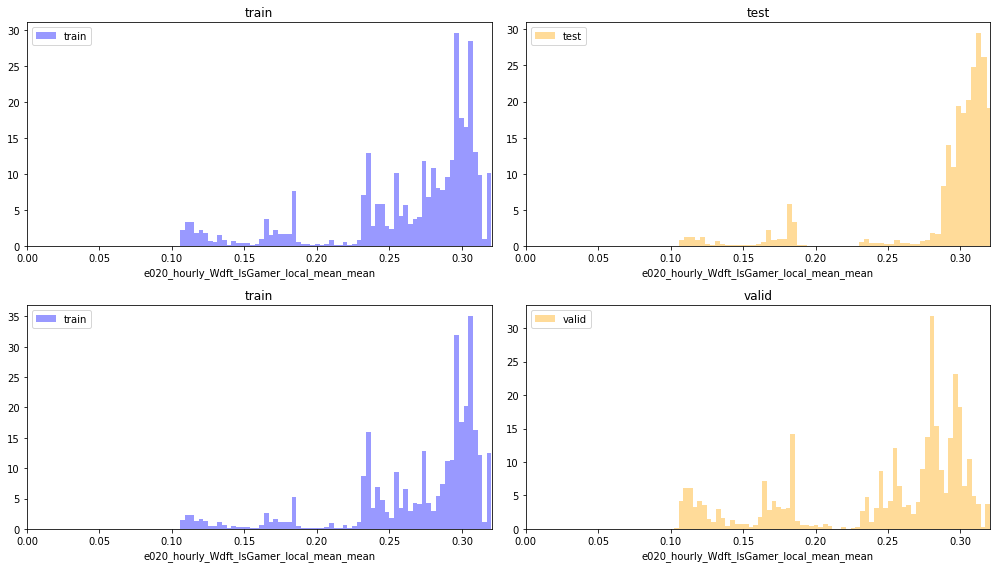

========== e020_daily_Wdft_IsGamer_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


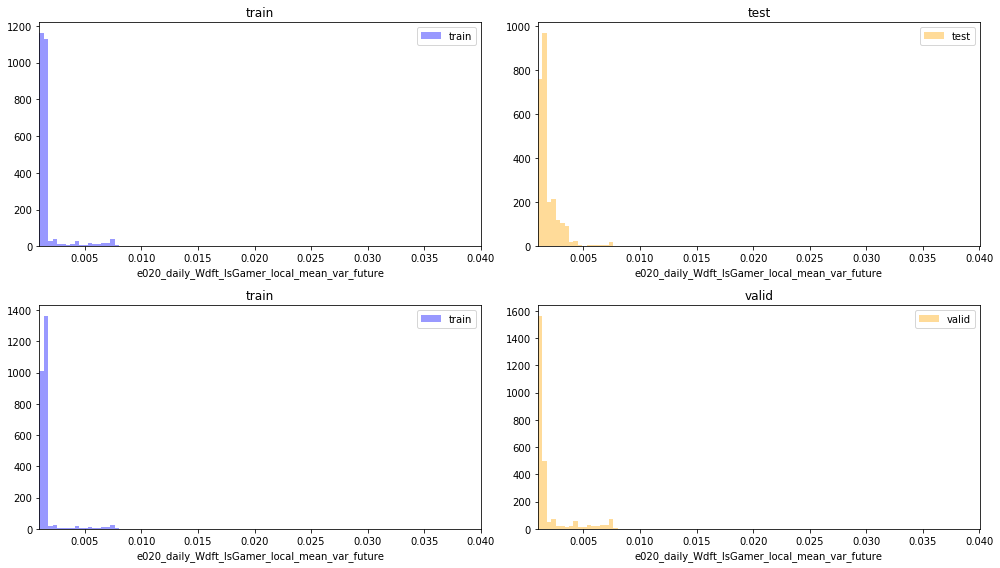

========== e020_hourly_Wdft_IsGamer_local_mean_var ===========
(8918336, 180), (1250116, 180)


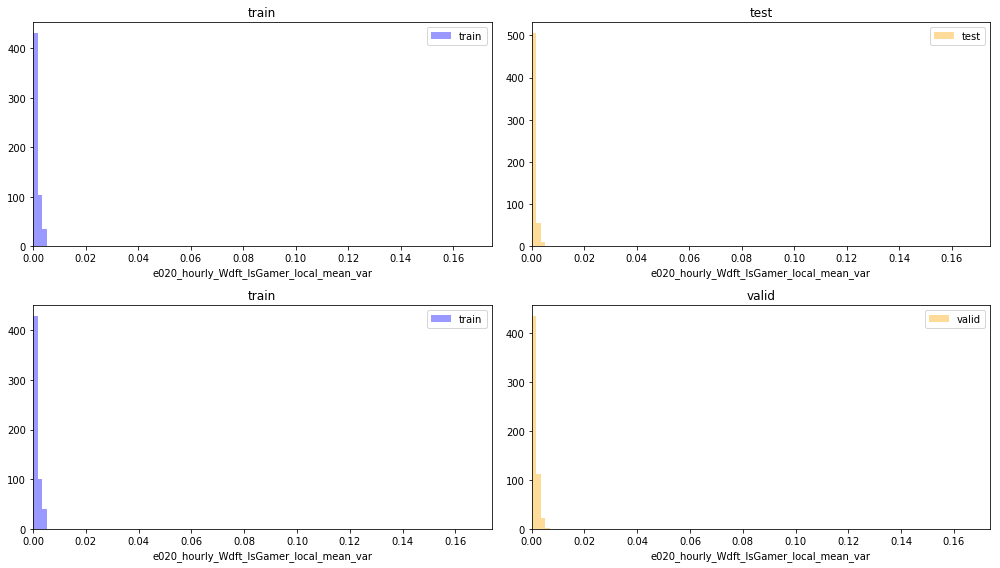

========== e020_daily_Wdft_IsGamer_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


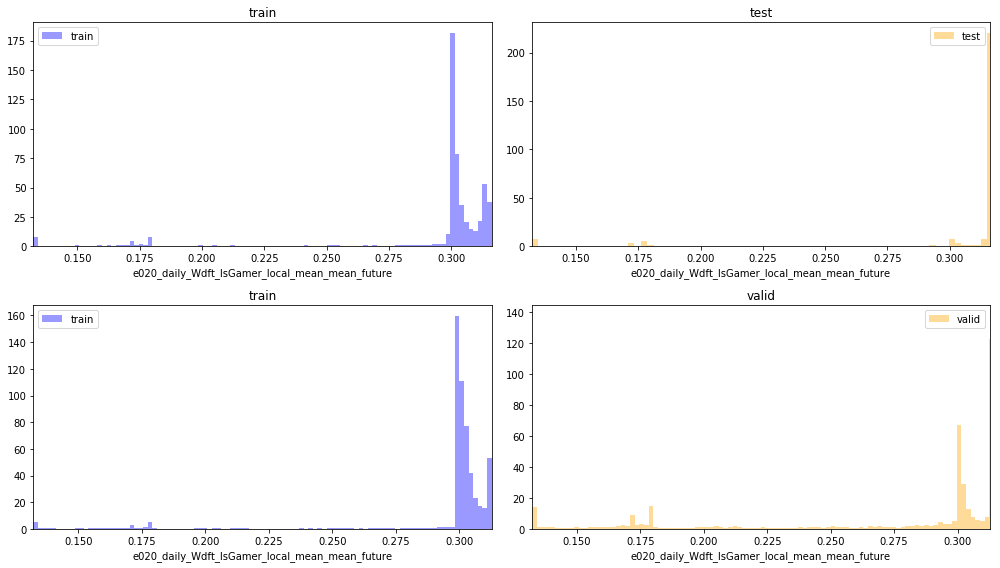

========== e020_Firewall_local_mean ===========
(8918336, 180), (1250116, 180)


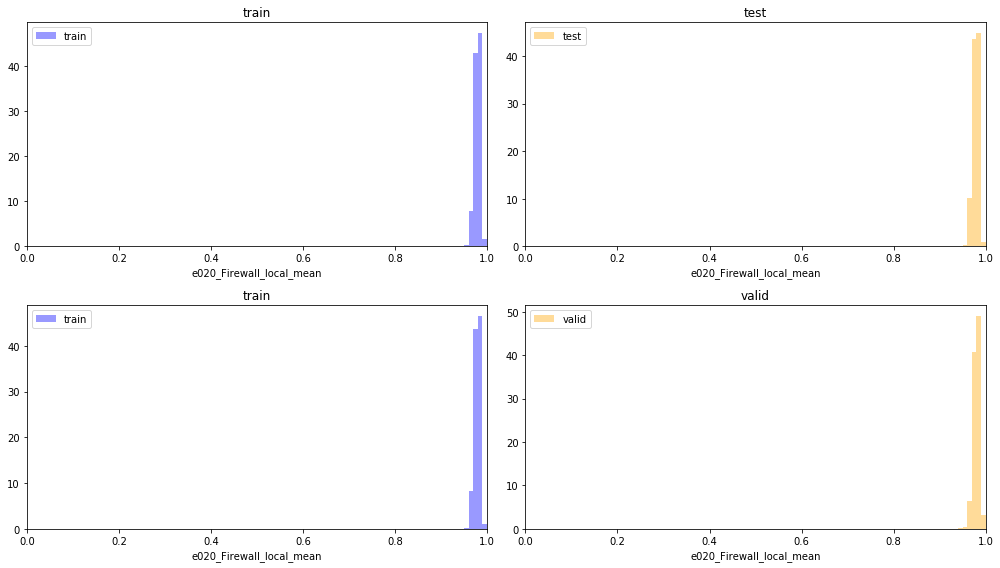

========== e020_Census_IsTouchEnabled_local_mean ===========
(8918336, 180), (1250116, 180)


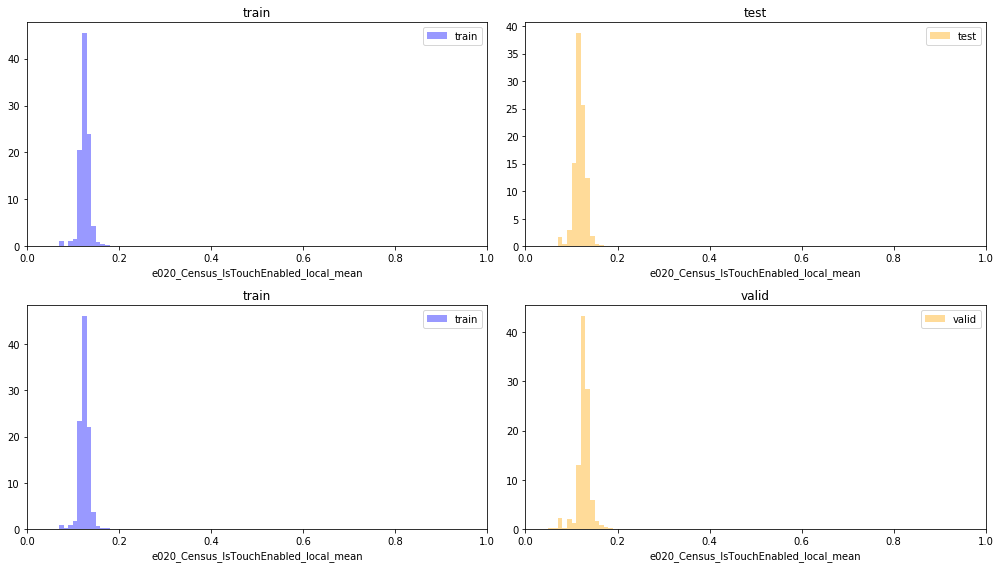

========== e020_daily_Census_ThresholdOptIn_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


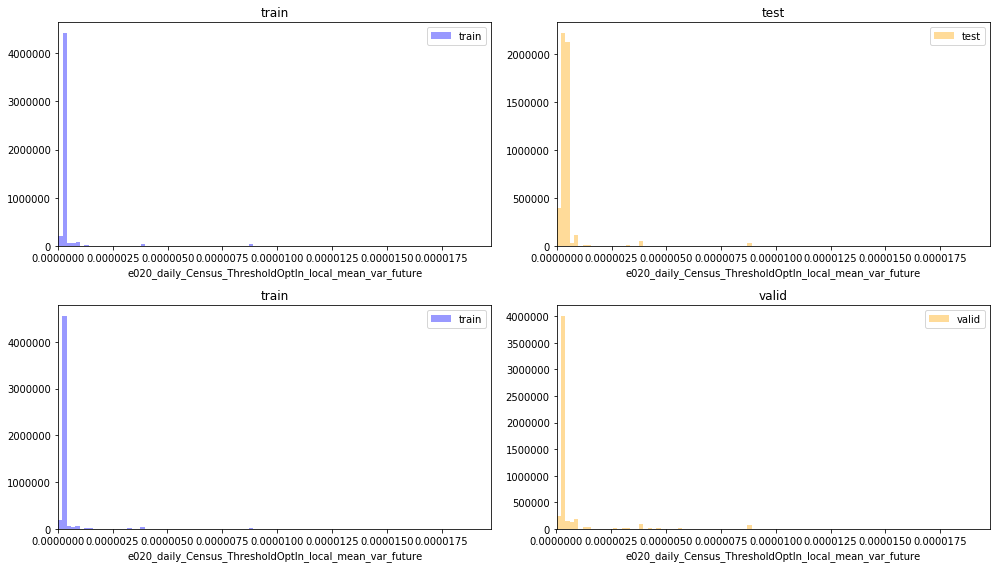

========== e020_daily_HasTpm_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


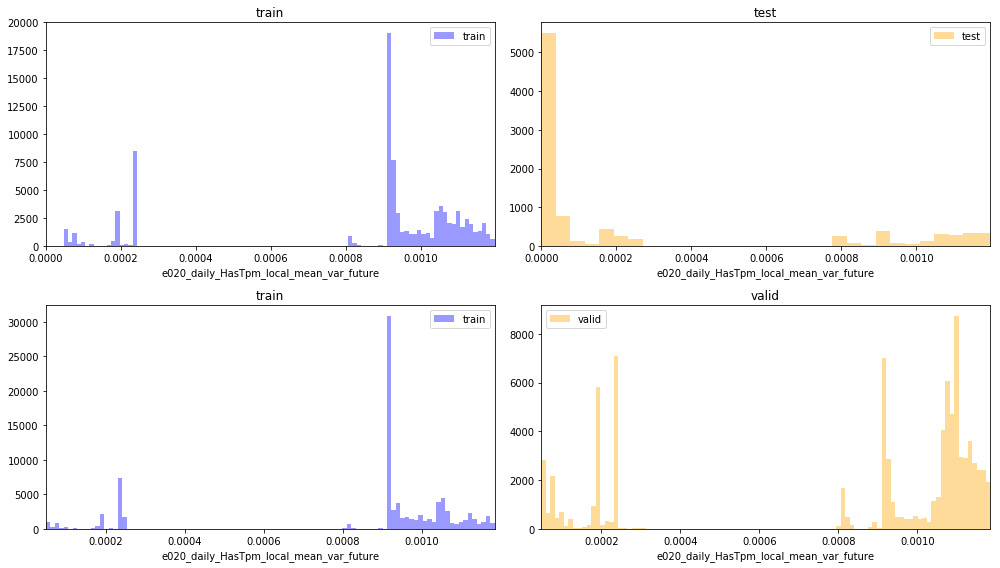

========== e020_daily_Firewall_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


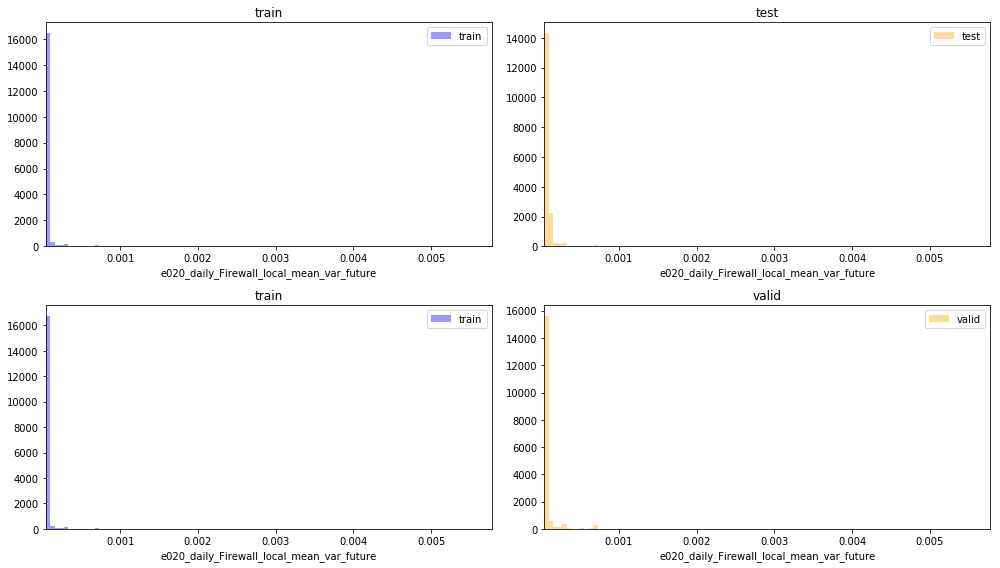

========== e020_hourly_Census_IsTouchEnabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


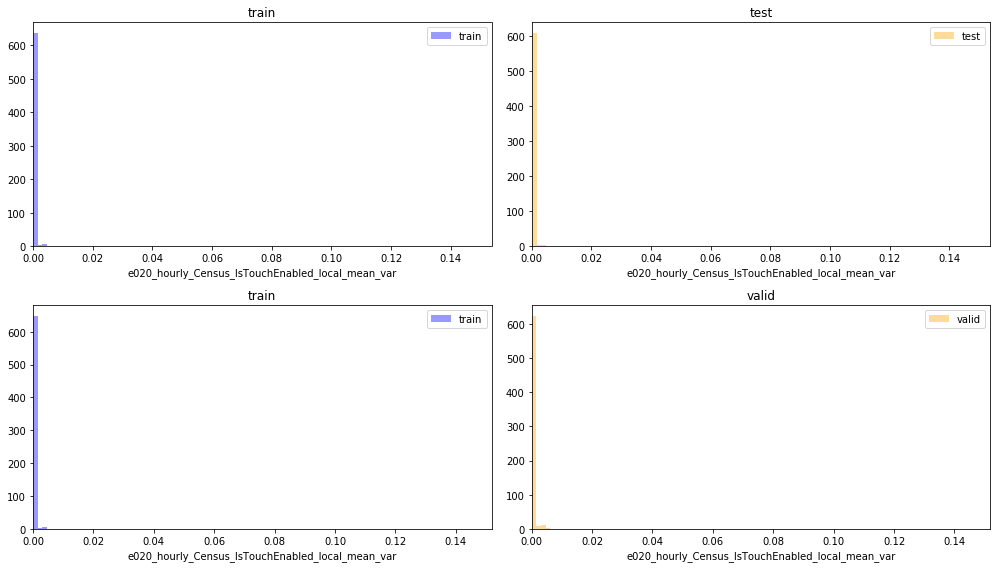

========== e020_daily_SMode_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


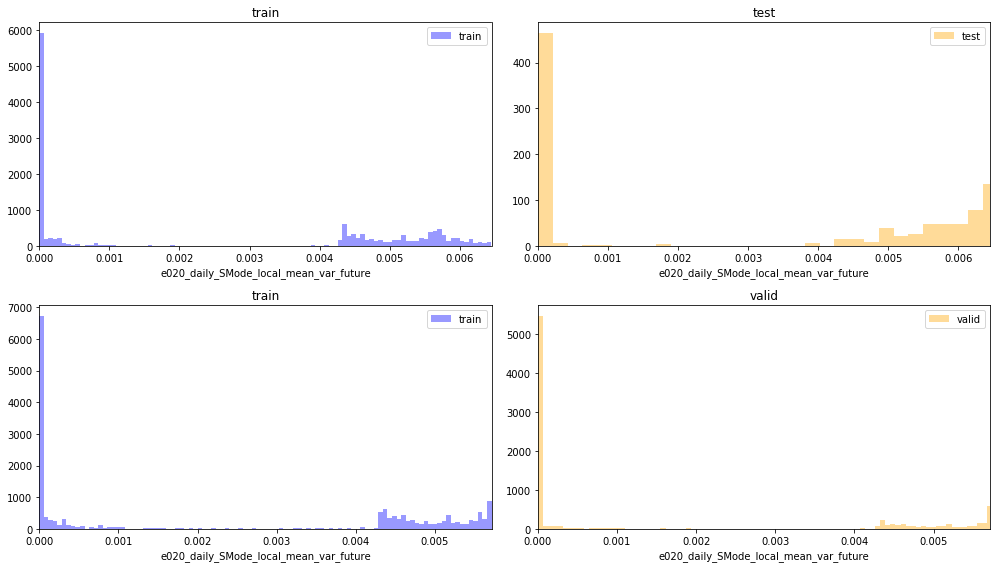

========== e020_hourly_Firewall_local_mean_var ===========
(8918336, 180), (1250116, 180)


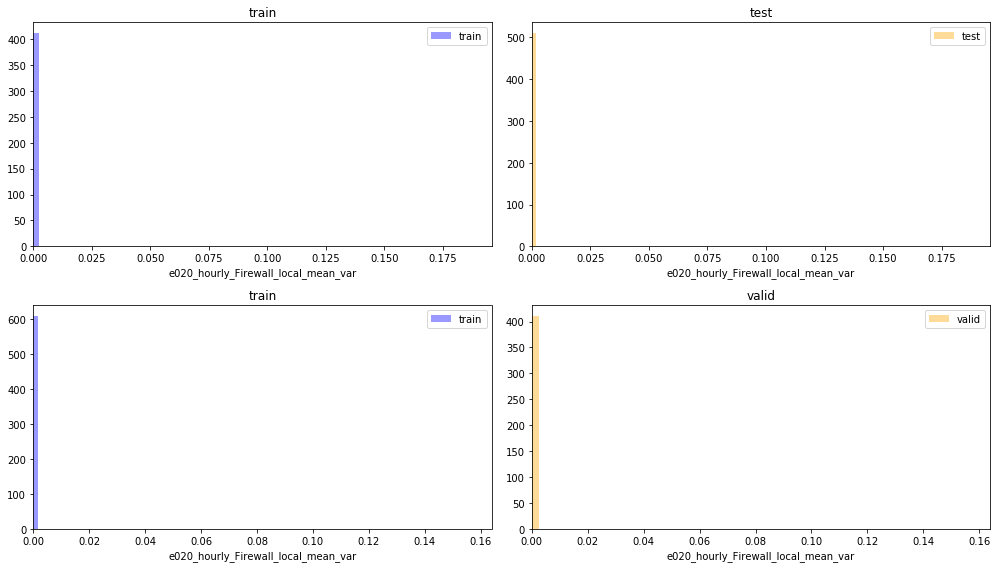

========== e020_daily_Census_IsSecureBootEnabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


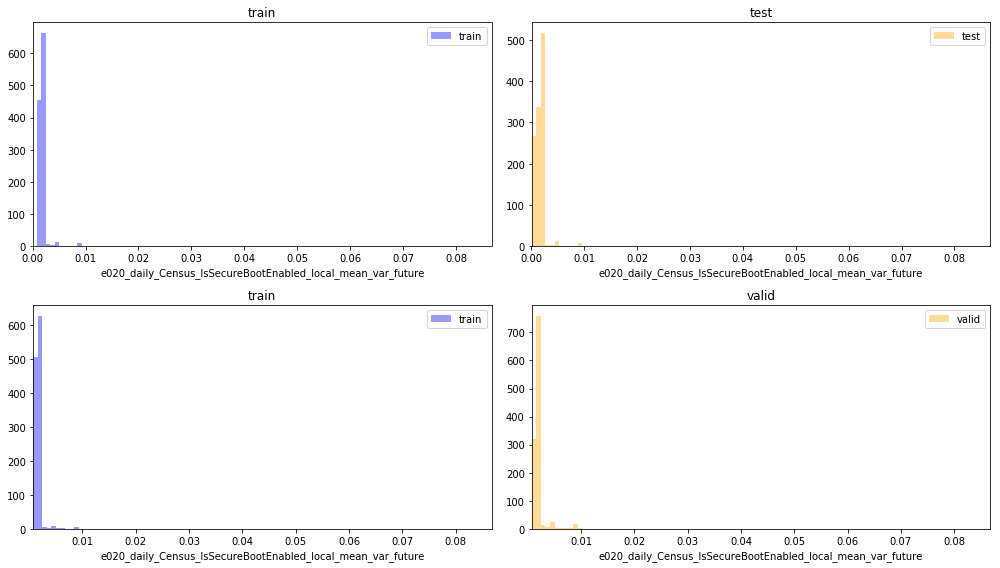

========== e020_daily_Census_IsPortableOperatingSystem_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


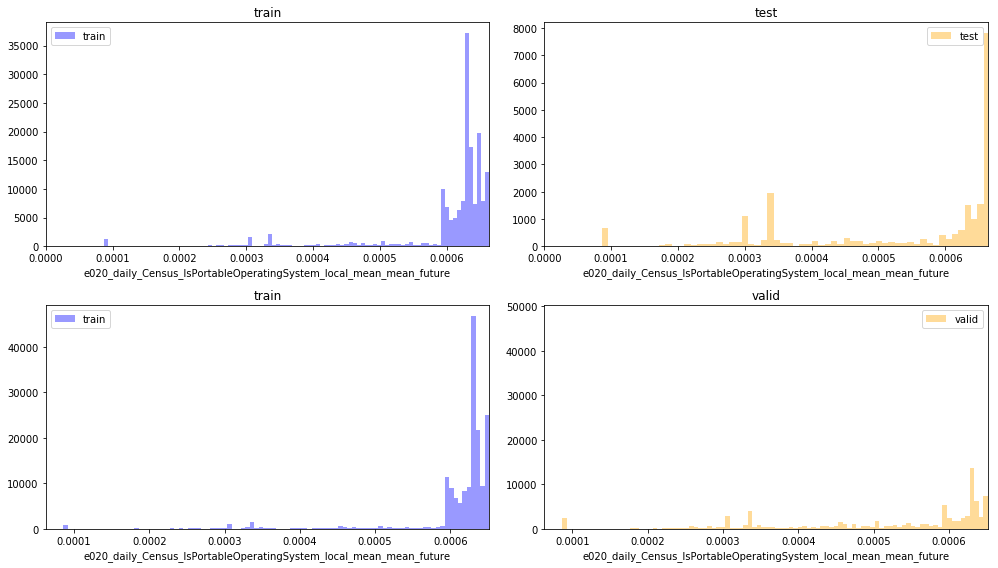

========== e020_hourly_Firewall_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


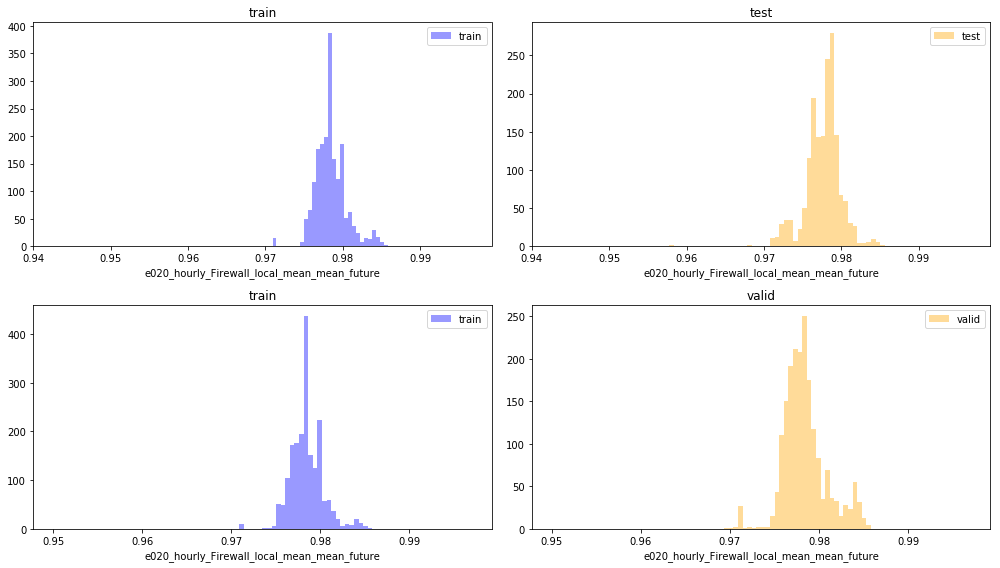

========== e020_daily_Census_IsTouchEnabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


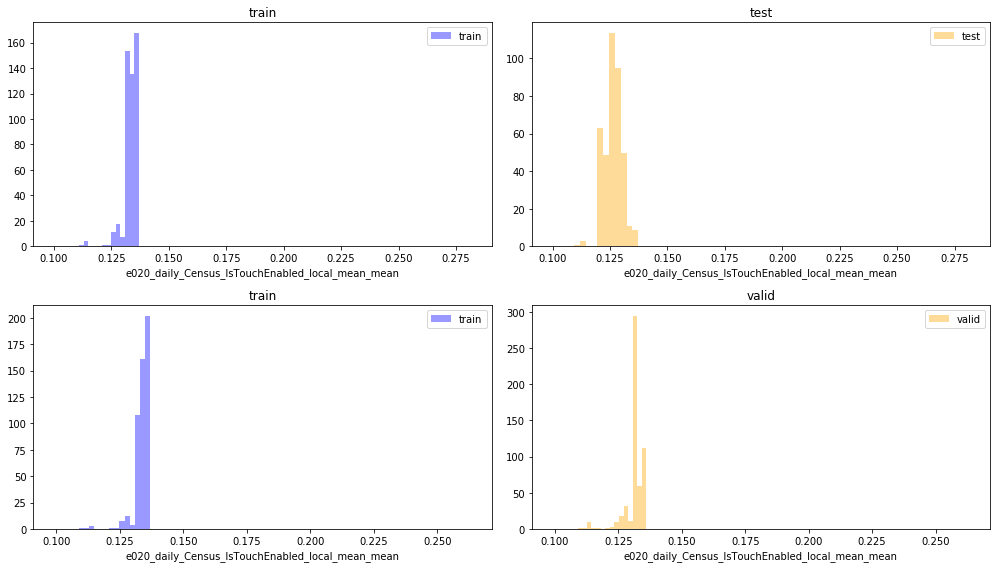

========== e020_daily_Census_IsWIMBootEnabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


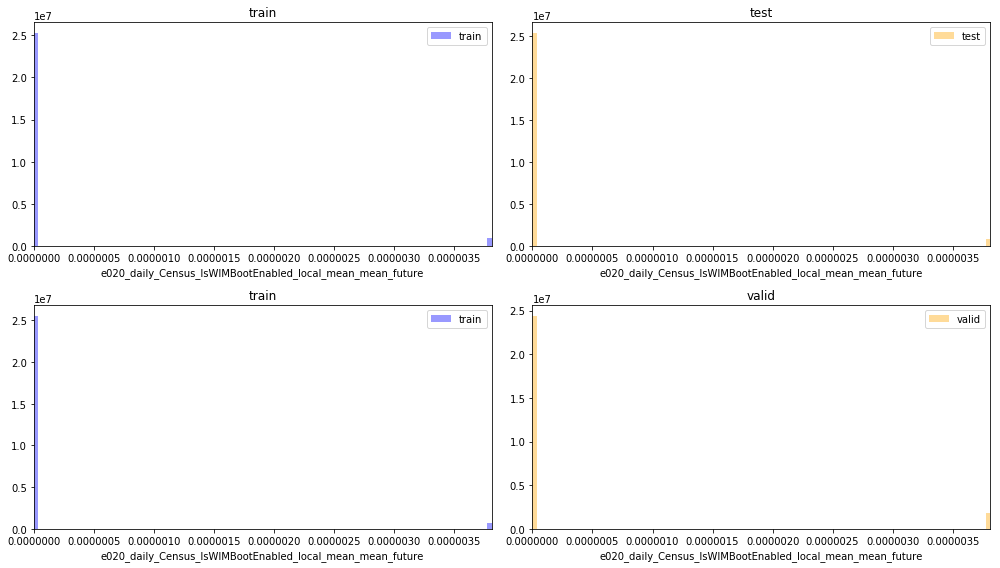

========== e020_daily_Census_IsWIMBootEnabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


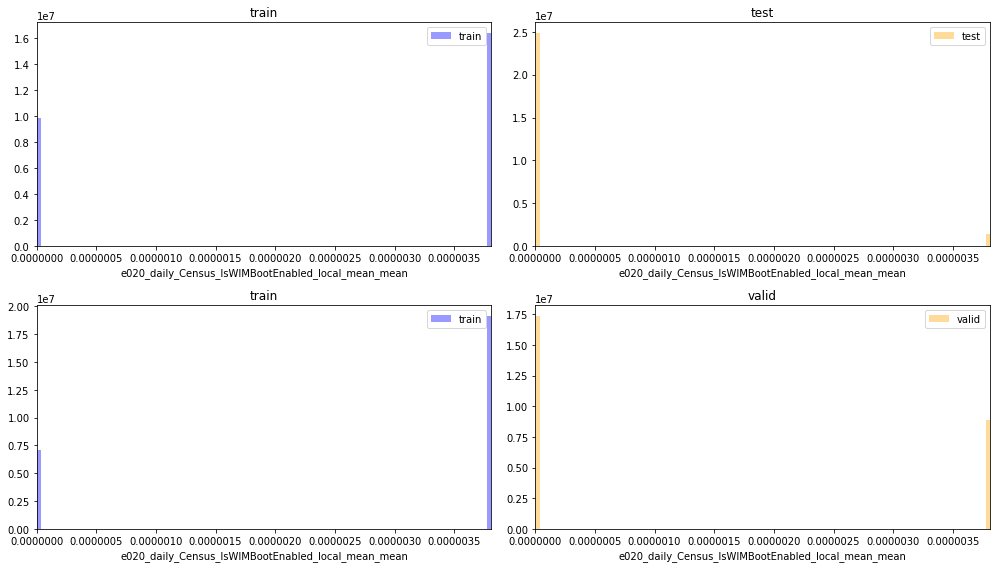

========== e020_daily_Census_IsPortableOperatingSystem_local_mean_mean ===========
(8918336, 180), (1250116, 180)


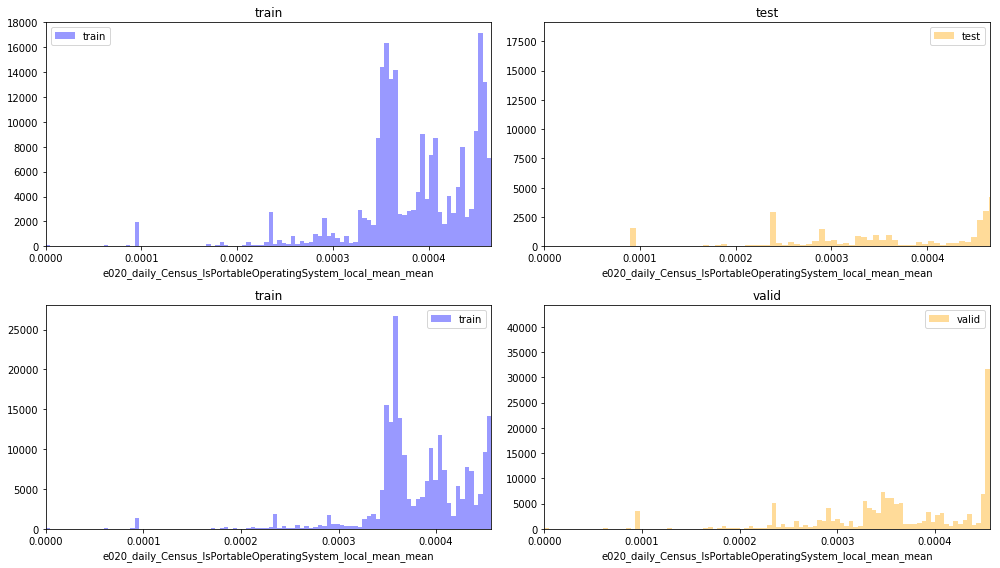

========== e020_hourly_Census_IsVirtualDevice_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


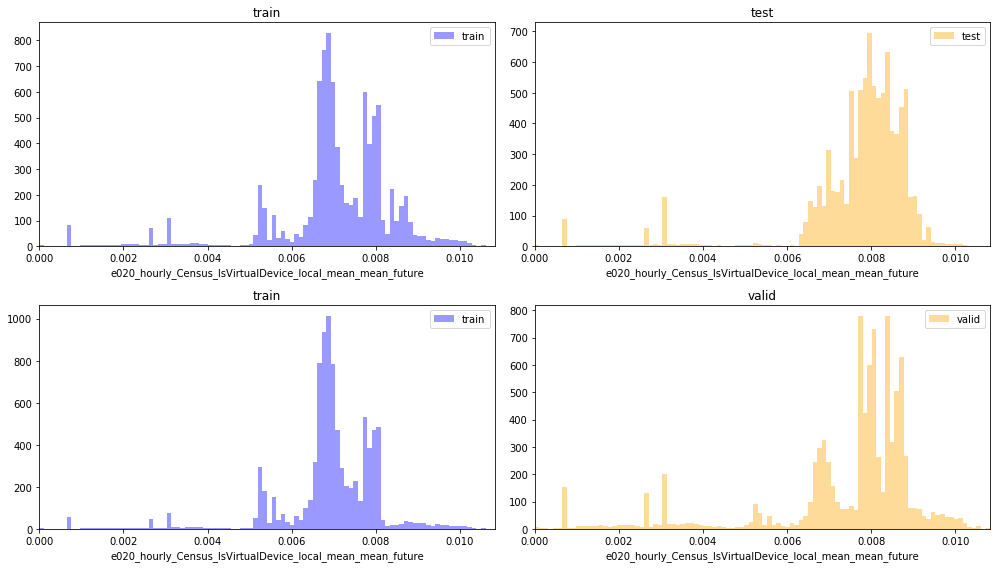

========== e020_IsBeta_local_mean ===========
(8918336, 180), (1250116, 180)


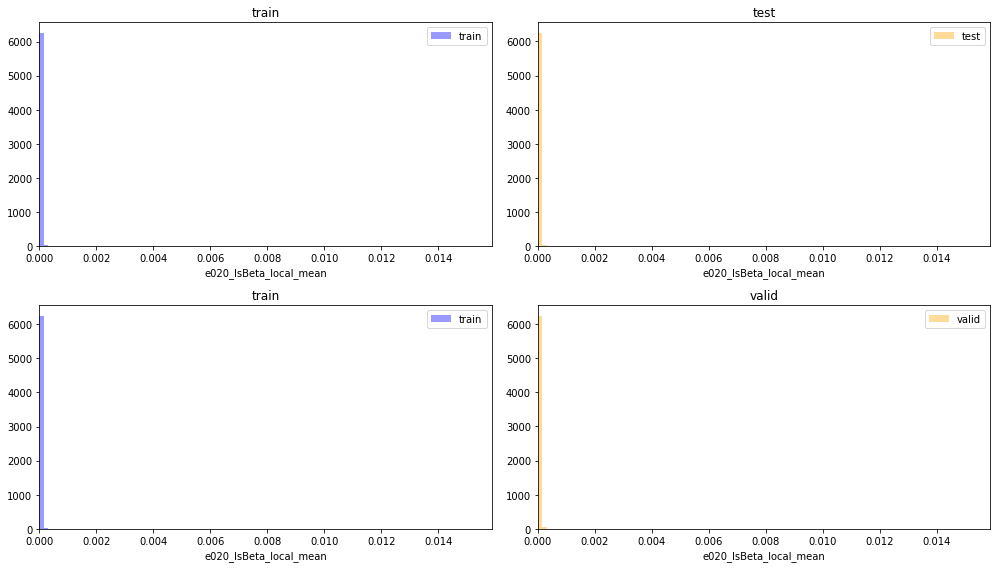

========== e020_daily_Census_IsTouchEnabled_local_mean_var ===========
(8918336, 180), (1250116, 180)


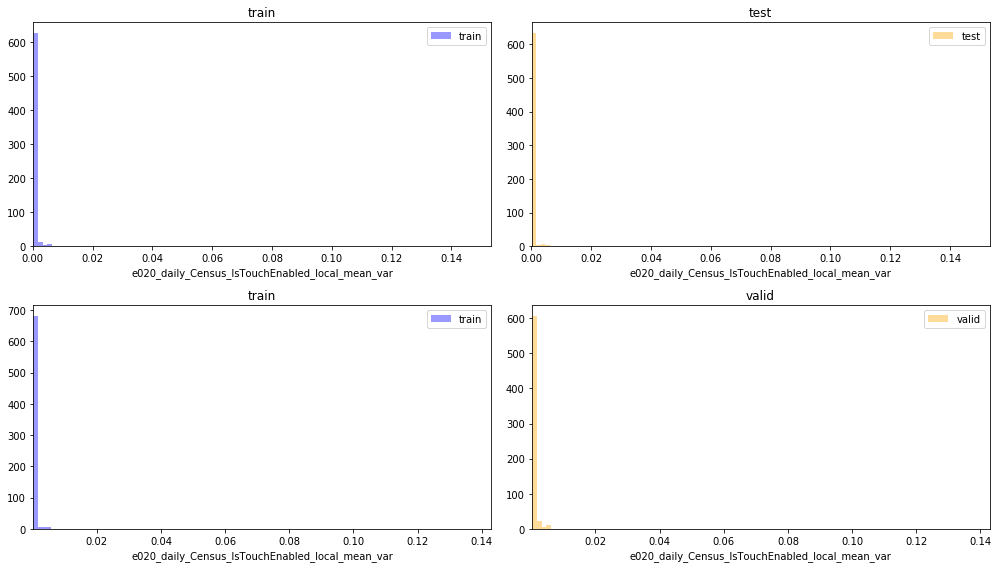

========== e020_daily_Census_IsFlightsDisabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


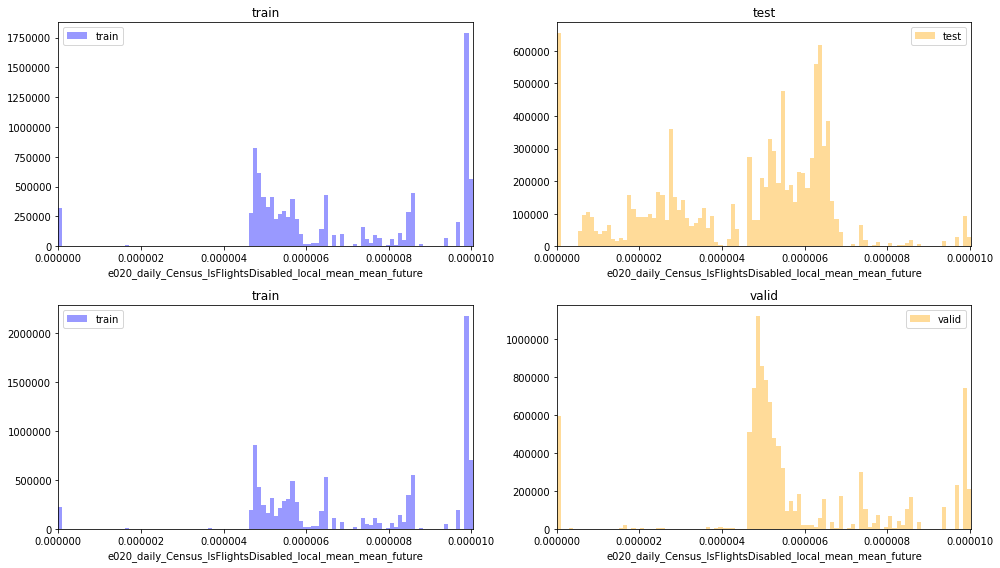

========== e020_IsSxsPassiveMode_local_mean ===========
(8918336, 180), (1250116, 180)


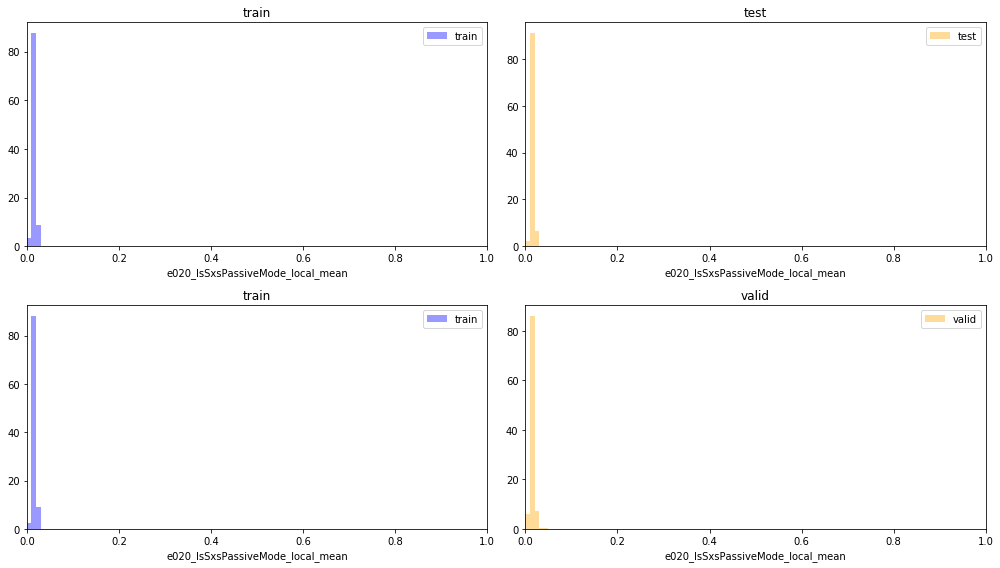

========== e020_hourly_Census_ThresholdOptIn_local_mean_var ===========
(8918336, 180), (1250116, 180)


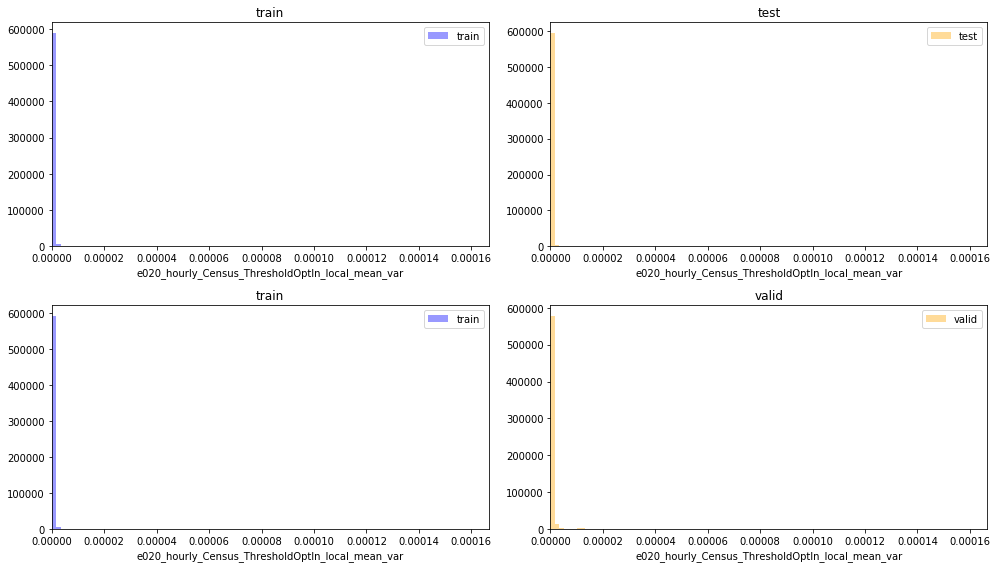

========== e020_hourly_Census_IsPenCapable_local_mean_mean ===========
(8918336, 180), (1250116, 180)


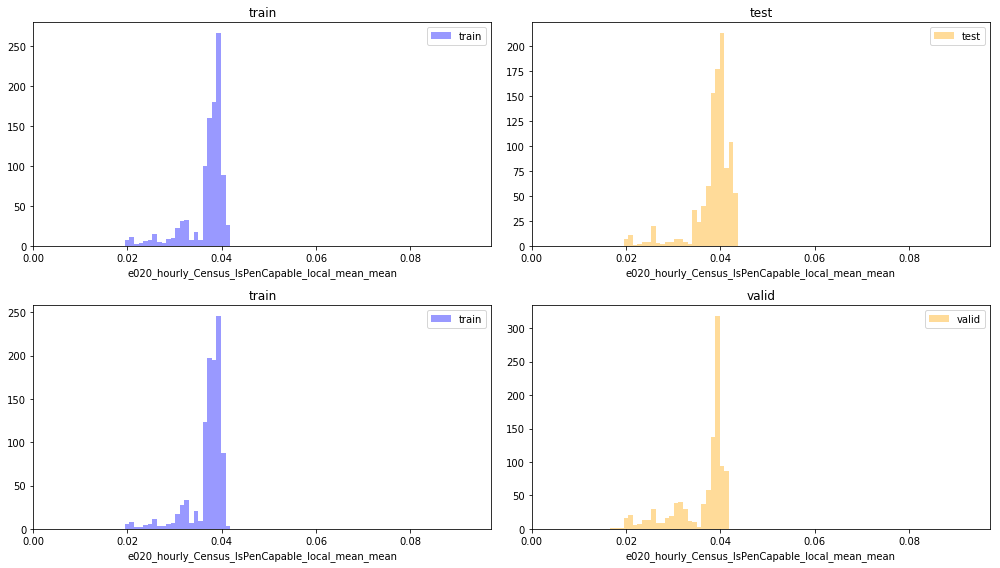

========== e020_daily_IsSxsPassiveMode_local_mean_var ===========
(8918336, 180), (1250116, 180)


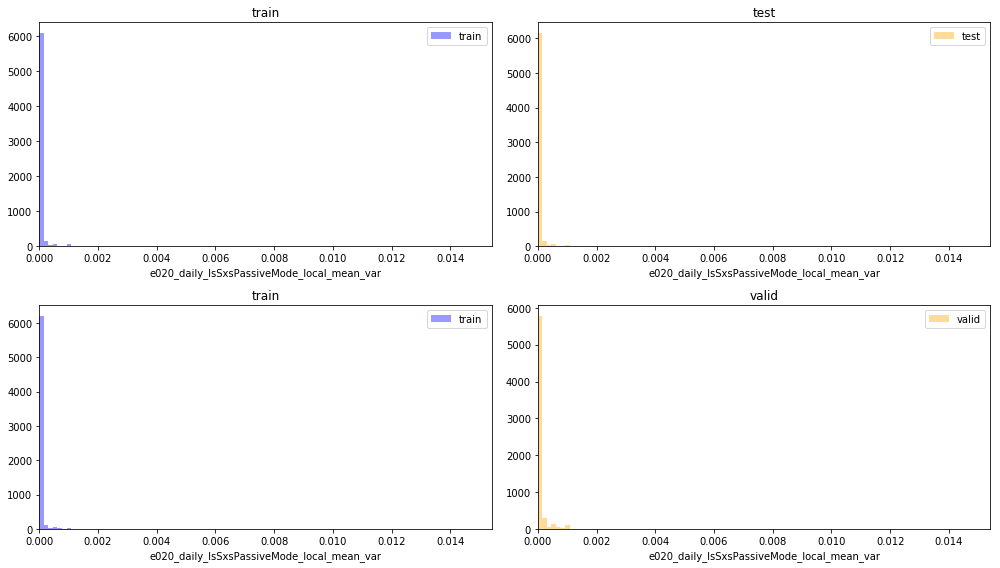

========== e020_daily_Census_IsSecureBootEnabled_local_mean_mean ===========
(8918336, 180), (1250116, 180)


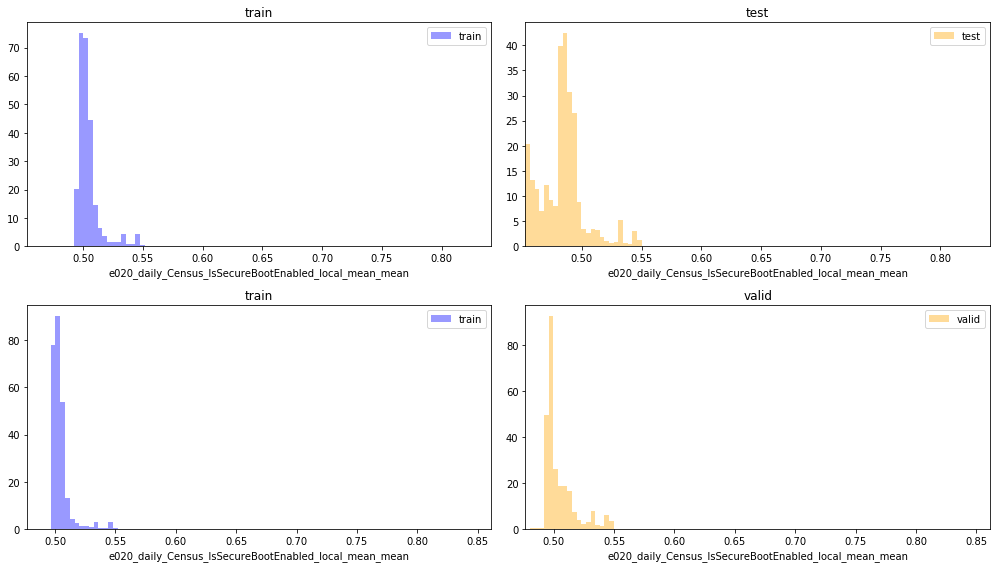

========== e020_daily_Census_HasOpticalDiskDrive_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


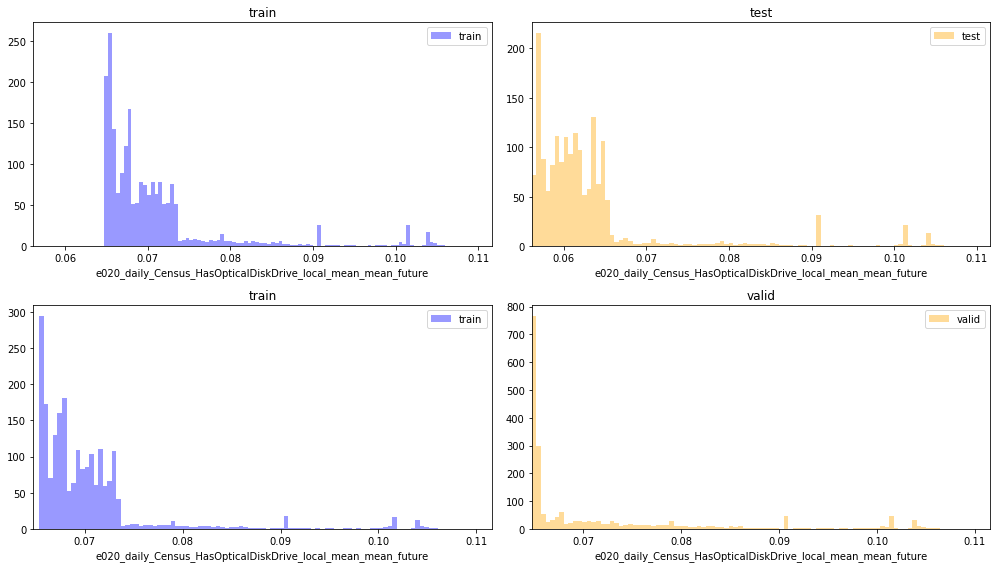

========== e020_hourly_Wdft_IsGamer_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


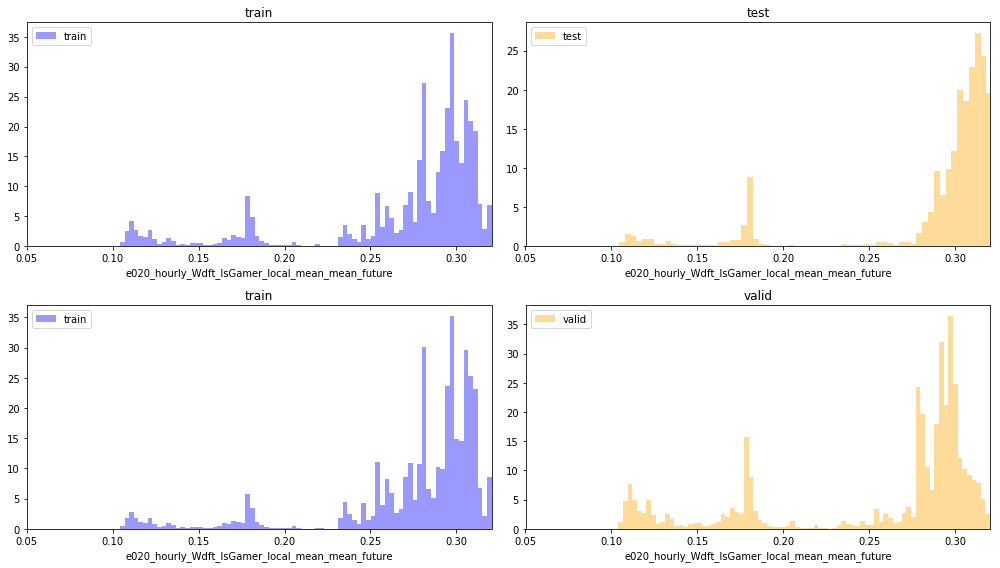

========== e020_hourly_Census_IsFlightsDisabled_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


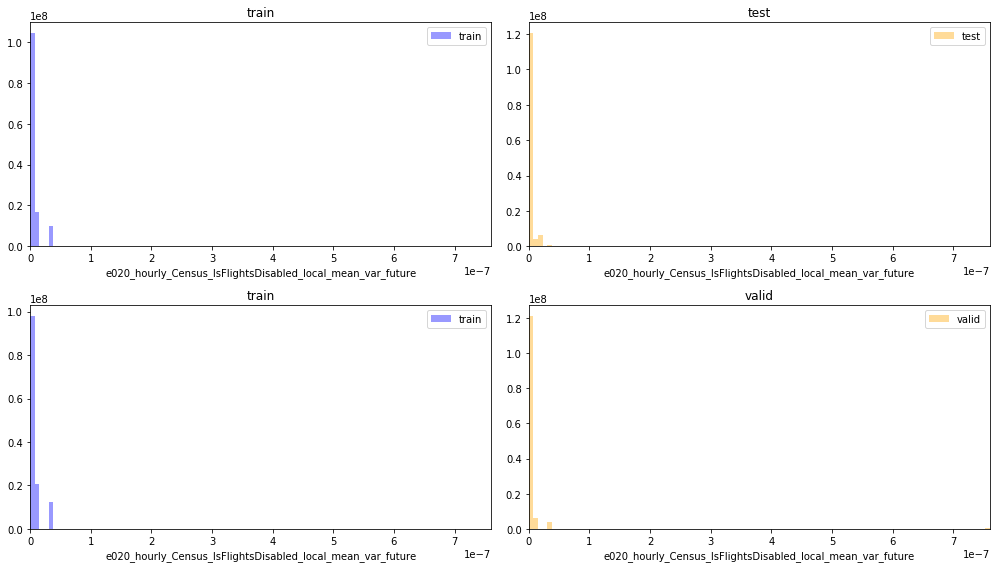

========== e020_Census_IsFlightingInternal_local_mean ===========
(8918336, 180), (1250116, 180)


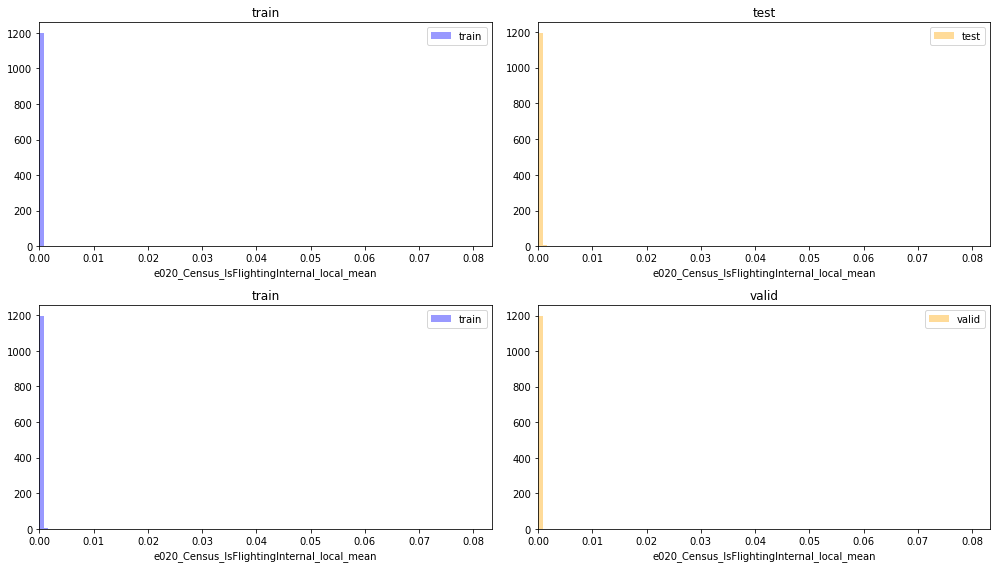

========== e020_hourly_SMode_local_mean_mean ===========
(8918336, 180), (1250116, 180)


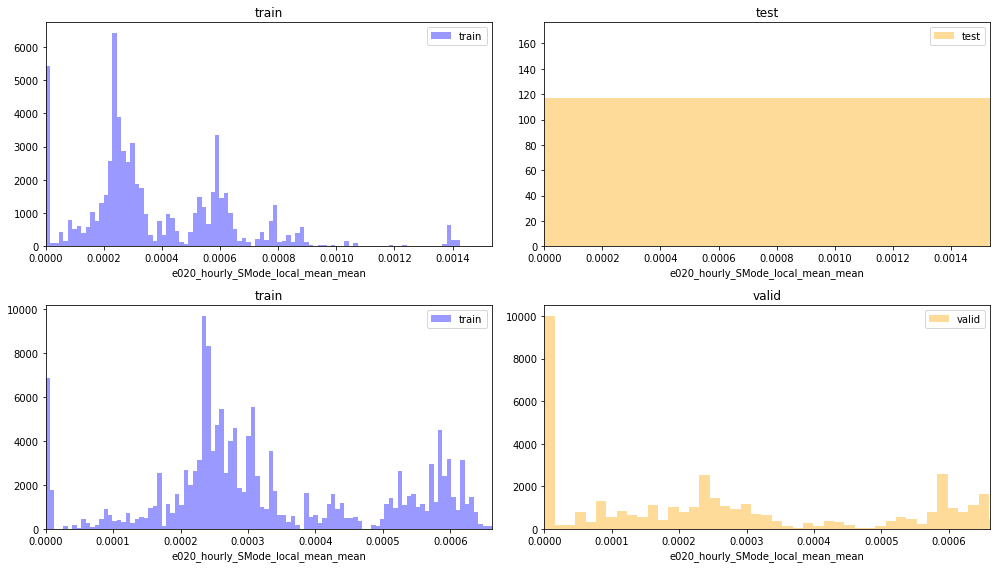

========== e020_hourly_Census_IsPortableOperatingSystem_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


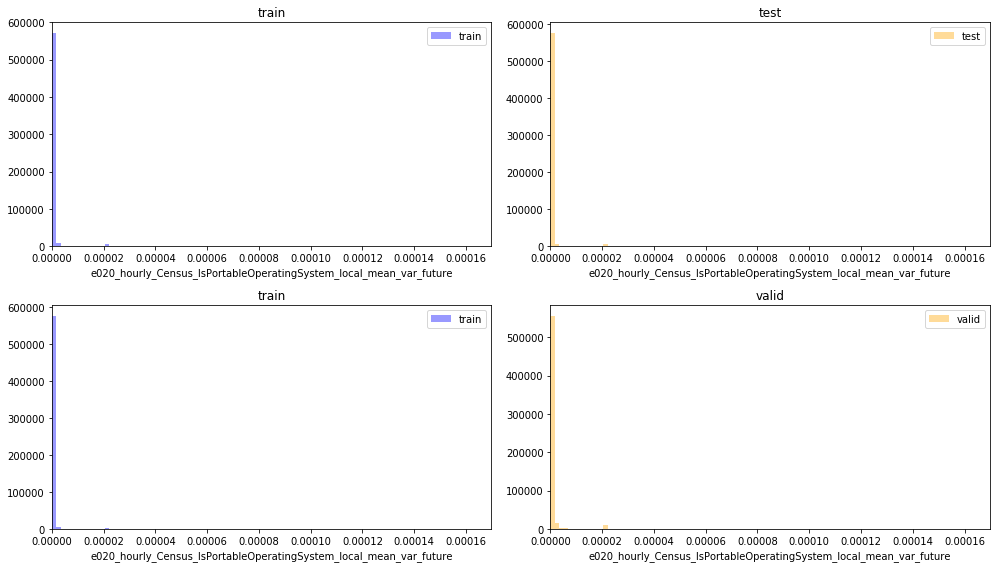

========== e020_hourly_HasDetections_local_mean_mean ===========
(8918336, 180), (1250116, 180)


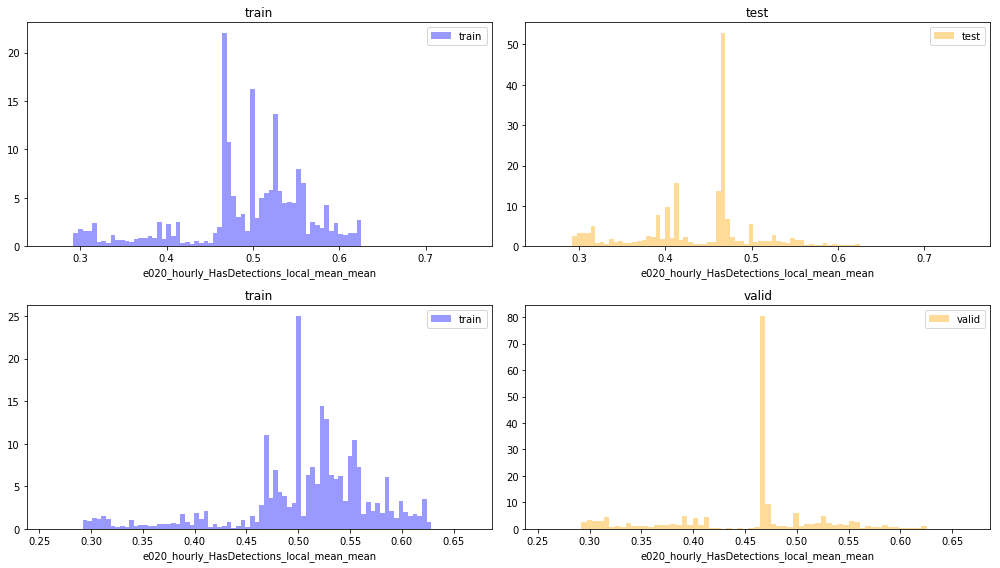

========== e020_hourly_HasDetections_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


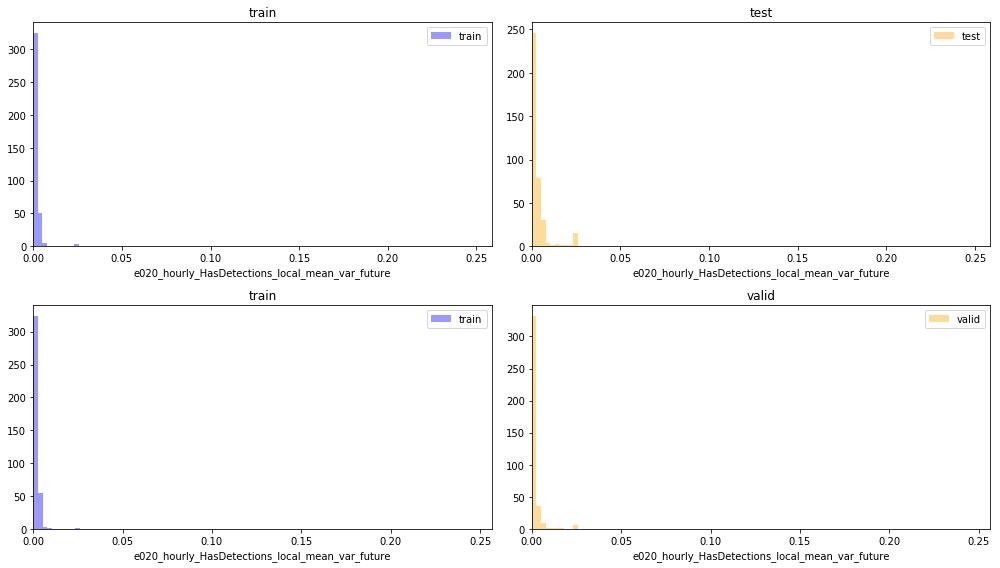

========== e020_hourly_Census_IsVirtualDevice_local_mean_mean ===========
(8918336, 180), (1250116, 180)


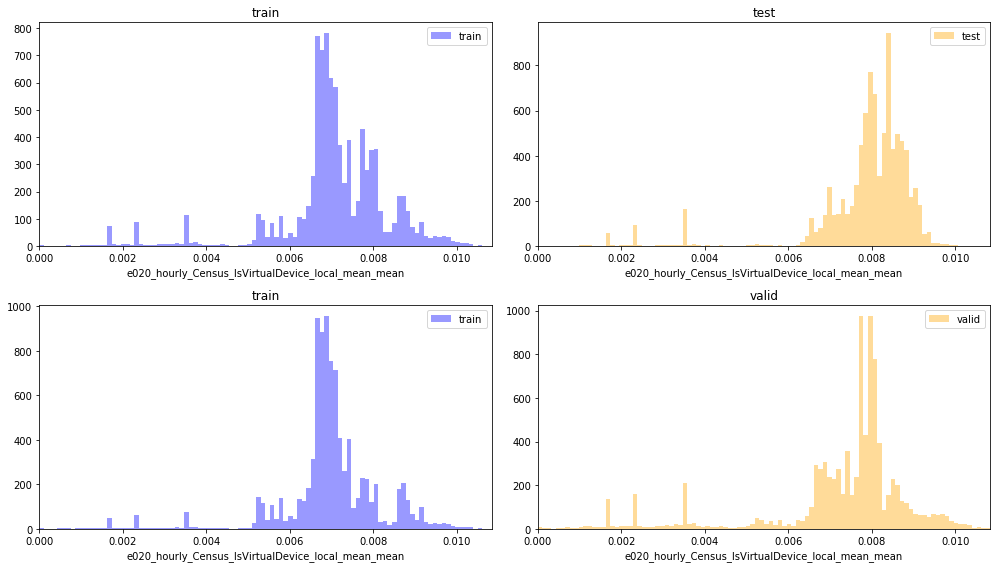

========== e020_hourly_IsProtected_local_mean_var ===========
(8918336, 180), (1250116, 180)


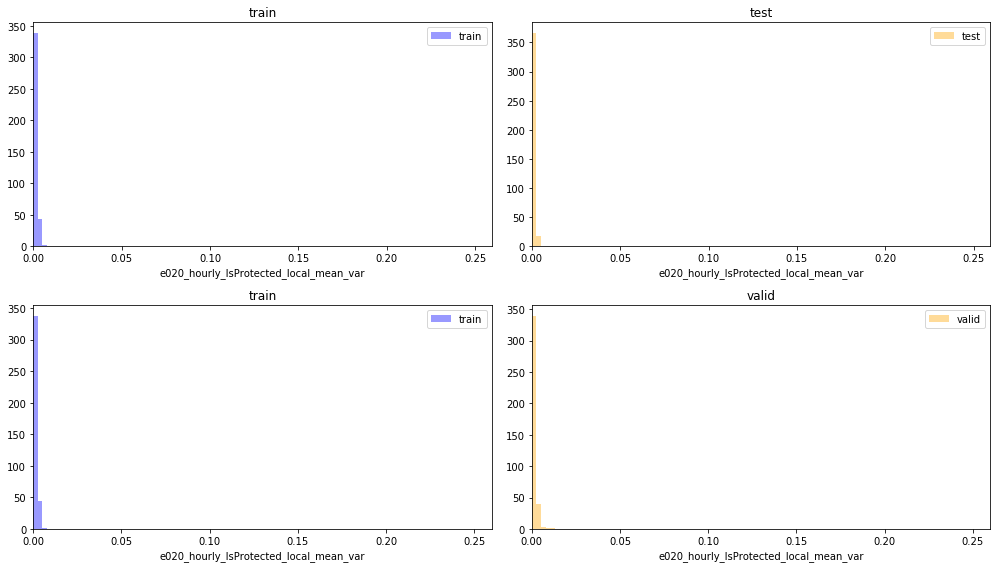

========== e020_daily_Firewall_local_mean_var ===========
(8918336, 180), (1250116, 180)


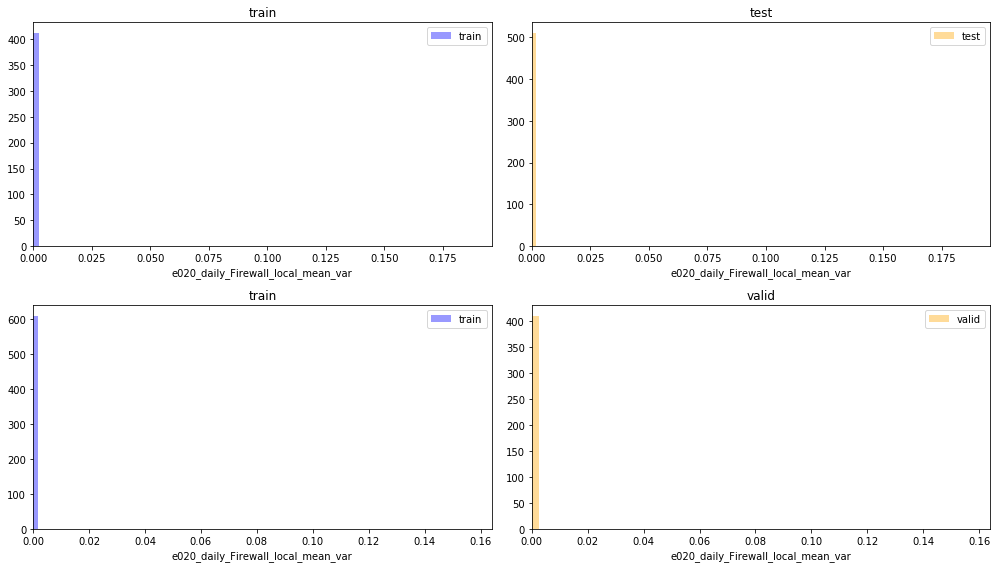

========== e020_Census_IsPenCapable_local_mean ===========
(8918336, 180), (1250116, 180)


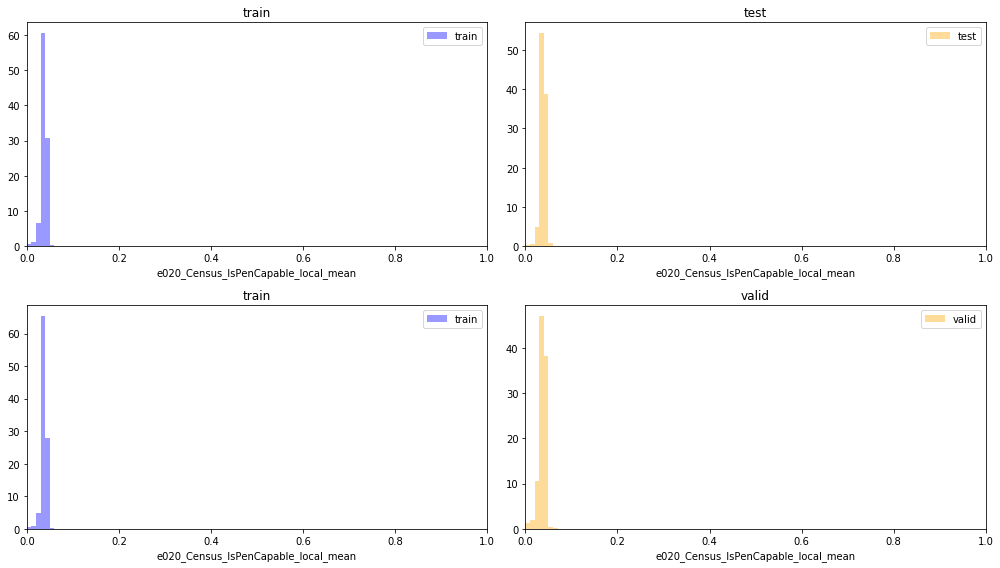

========== e020_hourly_Firewall_local_mean_mean ===========
(8918336, 180), (1250116, 180)


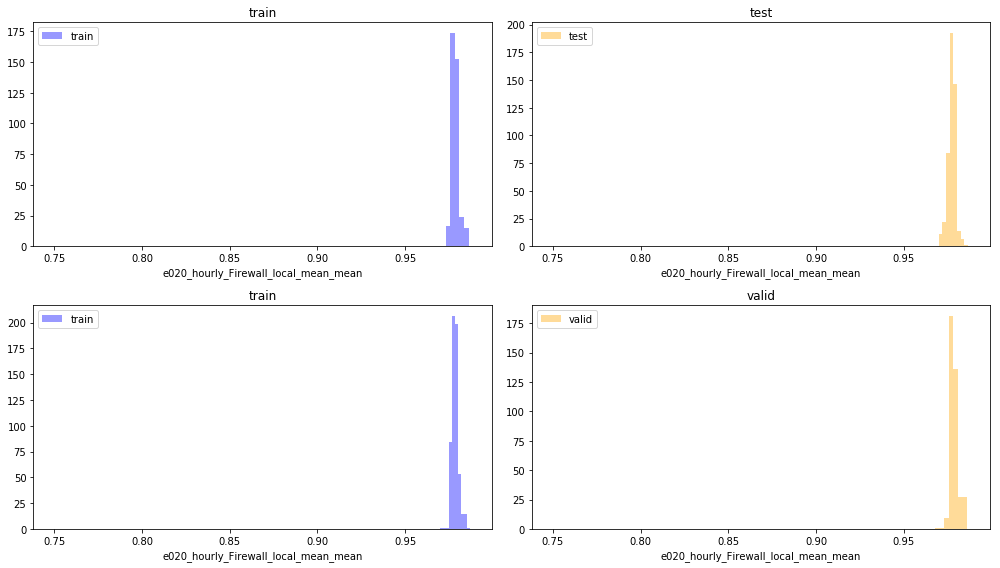

========== e020_hourly_Census_IsVirtualDevice_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


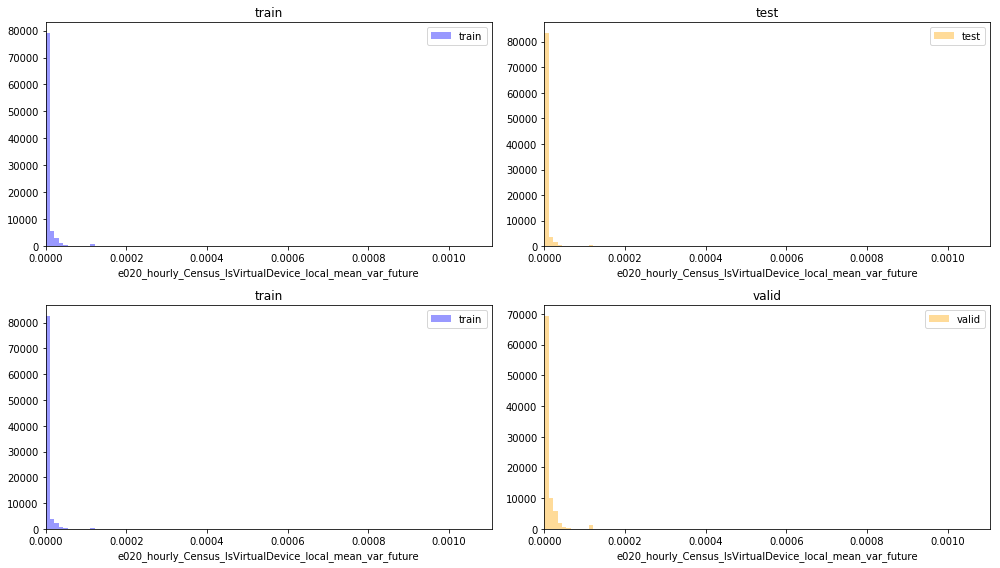

========== e020_daily_SMode_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


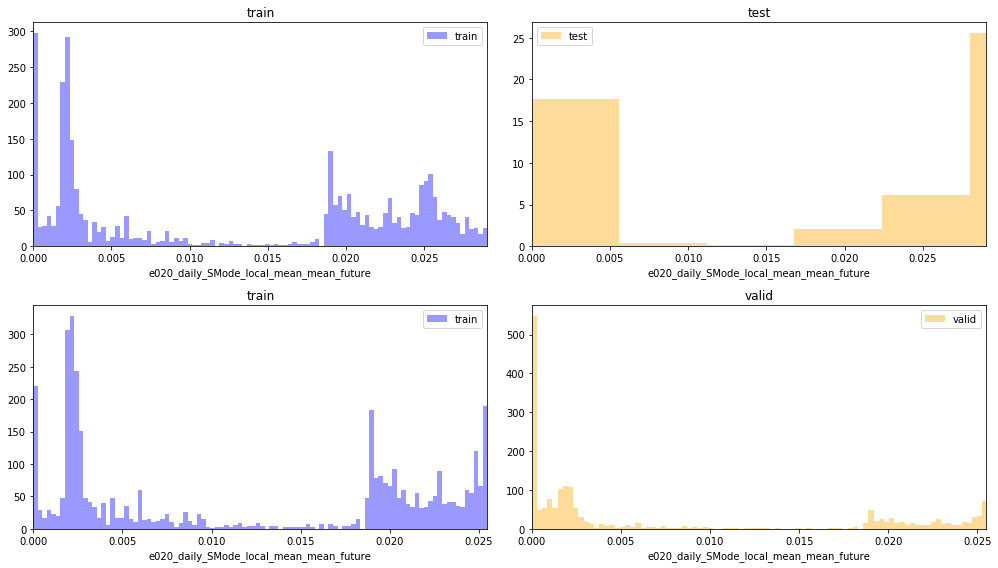

========== e020_hourly_Census_IsAlwaysOnAlwaysConnectedCapable_local_mean_var_future ===========
(8918336, 180), (1250116, 180)


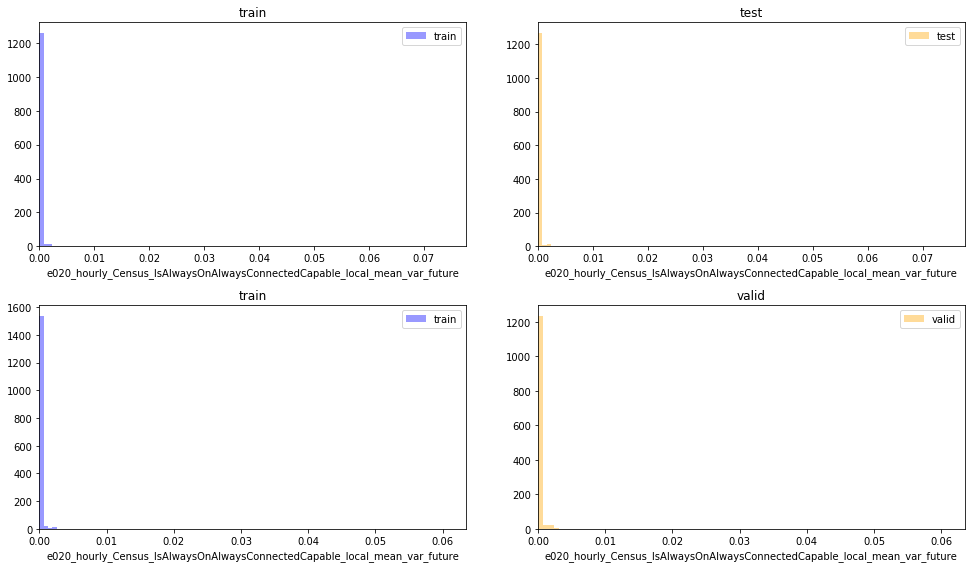

========== e020_daily_IsProtected_local_mean_mean ===========
(8918336, 180), (1250116, 180)


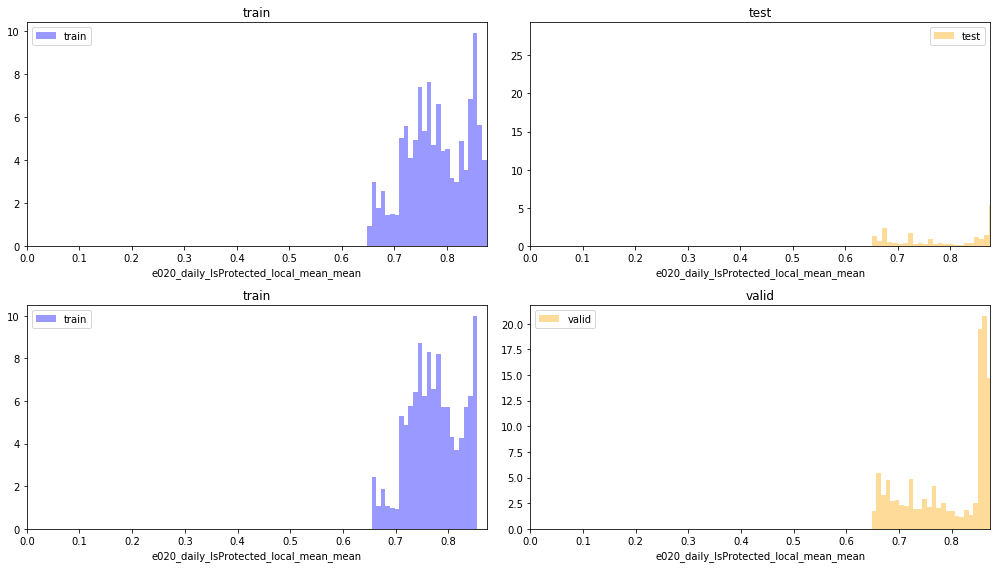

========== e020_hourly_Census_IsWIMBootEnabled_local_mean_mean_future ===========
(8918336, 180), (1250116, 180)


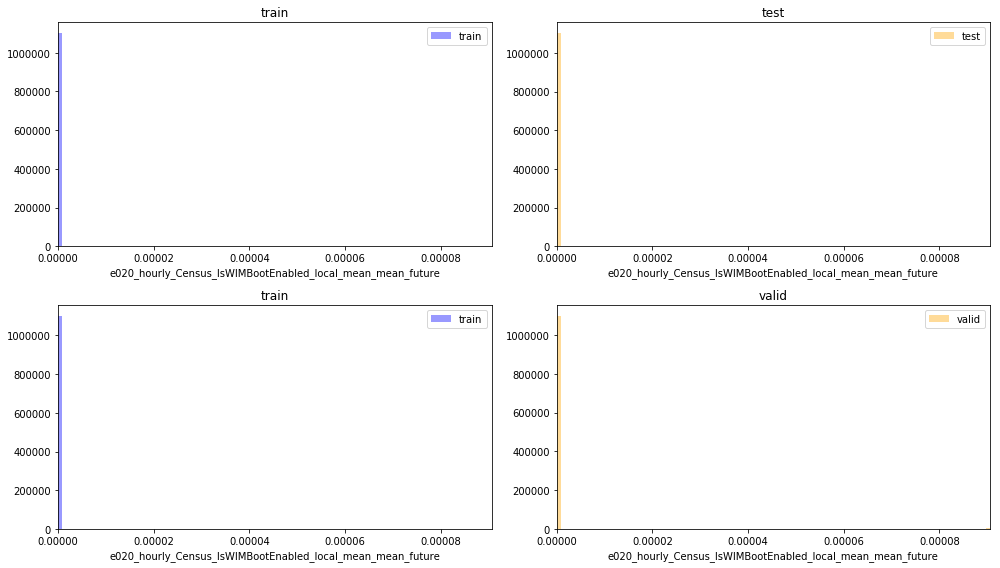

In [9]:
for col in trn_df.columns:
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    plot_train_and_test_hist(trn_df[col], tst_df[col], col, axs[0], 'train vs test', 'test')
    plot_train_and_test_hist(val_trn_df[col], val_val_df[col], col, axs[1], 'train vs valid', 'valid')
    print(f'========== {col} ===========')
    print(f'{trn_df.dropna().shape}, {tst_df.dropna().shape}')
    plt.tight_layout()
    plt.show()